In [1]:
'''!pip3 install imbalanced-learn
!pip install category_encoders
!pip3 install xgboost==1.7.2
!pip install scikit-learn
!pip install eli5
!pip install pdpbox
!pip install --upgrade category_encoders'''

'!pip3 install imbalanced-learn\n!pip install category_encoders\n!pip3 install xgboost==1.7.2\n!pip install scikit-learn\n!pip install eli5\n!pip install pdpbox\n!pip install --upgrade category_encoders'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from datetime import datetime, timedelta

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/project2/final_2.csv', index_col=None, header=0)

<ipython-input-3-b2524d9ea3ca>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/project2/final_2.csv', index_col=None, header=0)


In [4]:
df

접수년도  자치구명   법정동명     본번    부번    층         계약일 전월세구분   임대면적  \
0        2022  영등포구  양평동2가    1.0   3.0  3.0  2022-01-01    전세   19.0   
1        2022   강남구    역삼동  825.0  20.0  3.0  2022-01-01    전세   25.0   
2        2022   강동구    고덕동  693.0   0.0  2.0  2022-01-01    전세   60.0   
3        2022   용산구    이촌동  402.0   0.0  3.0  2022-01-01    전세   59.0   
4        2022   관악구    봉천동  869.0  10.0  3.0  2022-01-01    전세   24.0   
...       ...   ...    ...    ...   ...  ...         ...   ...    ...   
1294063  2013   은평구    갈현동  327.0  15.0  2.0  2013-02-07    전세   69.0   
1294064  2013   은평구    갈현동  327.0  15.0  1.0  2013-03-02    전세   69.0   
1294065  2013   은평구    구산동    3.0  24.0  3.0  2013-03-26    전세   42.0   
1294066  2013   용산구    후암동  244.0  91.0  3.0  2013-09-13    전세   82.0   
1294067  2013   서초구    양재동  378.0   1.0  1.0  2013-11-04    전세  164.0   

         보증금(만원)  ...    계약년월  계약년도 계약월 신축여부           면적구분  \
0        16000.0  ...  202201  2022   1  준신축         59㎡ 미만   
1        29500.0  ...  202201  2022   1  준신축         59㎡ 미만   
2        36000.0  ...  202201  2022   1   신축  59㎡ 이상 84㎡ 이하   
3        65000.0  ...  202201  2022   1   구축  59㎡ 이상 84㎡ 이하   
4        18000.0  ...  202201  2022   1   구축         59㎡ 미만   
...          ...  ...     ...   ...  ..  ...            ...   
1294063  16000.0  ...  201302  2013   2  준신축  59㎡ 이상 84㎡ 이하   
1294064  15000.0  ...  201303  2013   3  준신축  59㎡ 이상 84㎡ 이하   
1294065  12500.0  ...  201303  2013   3   신축         59㎡ 미만   
1294066  27000.0  ...  201309  2013   9   구축  59㎡ 이상 84㎡ 이하   
1294067  57000.0  ...  201311  2013  11   구축         84㎡ 초과   

         보증금변동률(2020.06기준)  보증금변동률(2년기준)    매매가(만원)    전세가율  역전세위험  
0                    -1.27         -6.67   15805.68  101.23      1  
1                   -18.00        -13.46   30333.33   97.25      1  
2                    44.62         28.00  140653.90   25.59      0  
3                   -20.37        -17.12  147044.81   44.20      0  
4                      NaN        -20.00   12608.83  142.76      1  
...                    ...           ...        ...     ...    ...  
1294063                NaN         -6.67   35218.33   45.43      0  
1294064                NaN          0.00   35020.96   42.83      0  
1294065                NaN         16.67   15590.91   80.17      0  
1294066                NaN         40.00   46155.91   58.50      0  
1294067                NaN         24.00  110151.97   51.75      0  

[1294068 rows x 27 columns]

In [5]:
df.T

0                1              2              3        \
접수년도                     2022             2022           2022           2022   
자치구명                     영등포구              강남구            강동구            용산구   
법정동명                    양평동2가              역삼동            고덕동            이촌동   
본번                        1.0            825.0          693.0          402.0   
부번                        3.0             20.0            0.0            0.0   
층                         3.0              3.0            2.0            3.0   
계약일                2022-01-01       2022-01-01     2022-01-01     2022-01-01   
전월세구분                      전세               전세             전세             전세   
임대면적                     19.0             25.0           60.0           59.0   
보증금(만원)               16000.0          29500.0        36000.0        65000.0   
건물명                      힘멜하임  강남역 센트럴 푸르지오 시티         고덕그라시움             강촌   
건축년도                   2014.0           2015.0         2019.0         1998.0   
건물용도                     오피스텔             오피스텔            아파트            아파트   
신규계약구분                     신규               신규            NaN             신규   
종전보증금                     0.0              0.0            NaN            0.0   
종전임대료                     NaN              NaN            NaN            NaN   
계약기간(개월)                 24.0             12.0           24.0           24.0   
계약년월                   202201           202201         202201         202201   
계약년도                     2022             2022           2022           2022   
계약월                         1                1              1              1   
신축여부                      준신축              준신축             신축             구축   
면적구분                   59㎡ 미만           59㎡ 미만  59㎡ 이상 84㎡ 이하  59㎡ 이상 84㎡ 이하   
보증금변동률(2020.06기준)       -1.27            -18.0          44.62         -20.37   
보증금변동률(2년기준)            -6.67           -13.46           28.0         -17.12   
매매가(만원)              15805.68         30333.33       140653.9      147044.81   
전세가율                   101.23            97.25          25.59           44.2   
역전세위험                       1                1              0              0   

                      4              5              6              7        \
접수년도                     2022           2022           2022           2022   
자치구명                      관악구            관악구            강동구            동작구   
법정동명                      봉천동            봉천동            고덕동            동작동   
본번                      869.0         1712.0          693.0          102.0   
부번                       10.0            0.0            0.0            0.0   
층                         3.0            3.0            3.0            3.0   
계약일                2022-01-01     2022-01-01     2022-01-01     2022-01-01   
전월세구분                      전세             전세             전세             전세   
임대면적                     24.0           60.0           74.0           60.0   
보증금(만원)               18000.0        37800.0        85000.0        94000.0   
건물명                   관악센츄리타워       관악드림(동아)         고덕그라시움      이수스위첸포레힐즈   
건축년도                   1995.0         2003.0         2019.0         2022.0   
건물용도                     오피스텔            아파트            아파트            아파트   
신규계약구분                     신규             신규             신규             신규   
종전보증금                     0.0            0.0            0.0            0.0   
종전임대료                     NaN            NaN            NaN            NaN   
계약기간(개월)                 24.0           24.0           24.0           24.0   
계약년월                   202201         202201         202201         202201   
계약년도                     2022           2022           2022           2022   
계약월                         1              1              1              1   
신축여부                       구축             구축             신축             신축   
면적구분                   59㎡ 미만  59㎡ 이상 84㎡ 이하  59㎡ 이상 84㎡ 이하  59㎡ 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294068 entries, 0 to 1294067
Data columns (total 27 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   접수년도               1294068 non-null  int64  
 1   자치구명               1294068 non-null  object 
 2   법정동명               1294068 non-null  object 
 3   본번                 1294068 non-null  float64
 4   부번                 1294068 non-null  float64
 5   층                  1294068 non-null  float64
 6   계약일                1294068 non-null  object 
 7   전월세구분              1294068 non-null  object 
 8   임대면적               1294068 non-null  float64
 9   보증금(만원)            1294068 non-null  float64
 10  건물명                1294068 non-null  object 
 11  건축년도               1294068 non-null  float64
 12  건물용도               1294068 non-null  object 
 13  신규계약구분             176992 non-null   object 
 14  종전보증금              150067 non-null   float64
 15  종전임대료              198 non-null 

#### column 생성 & 정리

##### 계약일 int -> datetime으로 변경

In [7]:
df['계약일'] = df['계약일'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d' ))
df['계약년월'] = df['계약일'].dt.strftime('%Y.%m')
df['계약년도'] = df['계약일'].dt.year
df['계약월'] = df['계약일'].dt.month
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294068 entries, 0 to 1294067
Data columns (total 27 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   접수년도               1294068 non-null  int64         
 1   자치구명               1294068 non-null  object        
 2   법정동명               1294068 non-null  object        
 3   본번                 1294068 non-null  float64       
 4   부번                 1294068 non-null  float64       
 5   층                  1294068 non-null  float64       
 6   계약일                1294068 non-null  datetime64[ns]
 7   전월세구분              1294068 non-null  object        
 8   임대면적               1294068 non-null  float64       
 9   보증금(만원)            1294068 non-null  float64       
 10  건물명                1294068 non-null  object        
 11  건축년도               1294068 non-null  float64       
 12  건물용도               1294068 non-null  object        
 13  신규계약구분             176992 n

- 계약일 기준으로 데이터 정렬
- 등락폭 그래프 그릴 시 날짜별 정렬이 필요

In [8]:
df = df.sort_values('계약일')
df = df.reset_index(drop=True)

In [9]:
df

접수년도  자치구명   법정동명      본번    부번    층        계약일 전월세구분   임대면적  \
0        2013   서초구    방배동   725.0   0.0  3.0 2013-01-01    전세  165.0   
1        2013   중랑구    면목동  1534.0   0.0  3.0 2013-01-01    전세   65.0   
2        2013  영등포구  당산동4가    29.0   0.0  3.0 2013-01-01    전세   85.0   
3        2013   동작구    동작동   333.0   0.0  3.0 2013-01-01    전세  108.0   
4        2013   관악구    신림동   534.0   1.0  3.0 2013-01-01    전세   18.0   
...       ...   ...    ...     ...   ...  ...        ...   ...    ...   
1294063  2022   은평구    불광동   484.0  64.0  3.0 2022-12-31    전세   17.0   
1294064  2022   마포구    용강동   508.0   0.0  3.0 2022-12-31    전세   85.0   
1294065  2022   강남구    역삼동   832.0  16.0  3.0 2022-12-31    전세   21.0   
1294066  2022   마포구    현석동   225.0   0.0  3.0 2022-12-31    전세   85.0   
1294067  2022   동작구    사당동  1157.0   0.0  3.0 2022-12-31    전세   85.0   

         보증금(만원)  ...     계약년월  계약년도 계약월 신축여부           면적구분  \
0        70000.0  ...  2013.01  2013   1   구축         84㎡ 초과   
1        20000.0  ...  2013.01  2013   1   신축  59㎡ 이상 84㎡ 이하   
2        26500.0  ...  2013.01  2013   1   구축         84㎡ 초과   
3        52000.0  ...  2013.01  2013   1   신축         84㎡ 초과   
4         8000.0  ...  2013.01  2013   1   신축         59㎡ 미만   
...          ...  ...      ...   ...  ..  ...            ...   
1294063  18000.0  ...  2022.12  2022  12   신축         59㎡ 미만   
1294064  98000.0  ...  2022.12  2022  12  준신축         84㎡ 초과   
1294065  24000.0  ...  2022.12  2022  12   신축         59㎡ 미만   
1294066  80000.0  ...  2022.12  2022  12  준신축         84㎡ 초과   
1294067  65000.0  ...  2022.12  2022  12  준신축         84㎡ 초과   

         보증금변동률(2020.06기준)  보증금변동률(2년기준)    매매가(만원)    전세가율  역전세위험  
0                    30.00         44.00  114481.22   61.15      0  
1                      NaN         28.57   35983.53   55.58      0  
2                    43.62         65.58   38850.00   68.21      0  
3                      NaN         51.85   63750.97   81.57      0  
4                    50.00         33.33   12145.09   65.87      0  
...                    ...           ...        ...     ...    ...  
1294063                NaN          0.00   12739.04  141.30      1  
1294064             -11.36          0.00  138874.55   70.57      0  
1294065              -4.35          0.00   22726.29  105.60      1  
1294066              -9.59          0.00  141671.69   56.47      0  
1294067               4.41          0.00  119529.92   54.38      0  

[1294068 rows x 27 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294068 entries, 0 to 1294067
Data columns (total 27 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   접수년도               1294068 non-null  int64         
 1   자치구명               1294068 non-null  object        
 2   법정동명               1294068 non-null  object        
 3   본번                 1294068 non-null  float64       
 4   부번                 1294068 non-null  float64       
 5   층                  1294068 non-null  float64       
 6   계약일                1294068 non-null  datetime64[ns]
 7   전월세구분              1294068 non-null  object        
 8   임대면적               1294068 non-null  float64       
 9   보증금(만원)            1294068 non-null  float64       
 10  건물명                1294068 non-null  object        
 11  건축년도               1294068 non-null  float64       
 12  건물용도               1294068 non-null  object        
 13  신규계약구분             176992 n

In [11]:
df.신축여부.value_counts()

구축     858506
신축     256760
준신축    178802
Name: 신축여부, dtype: int64

In [12]:
df.역전세위험.value_counts()

0    1217824
1      76244
Name: 역전세위험, dtype: int64

In [13]:
df.층.value_counts()

 3.0    1133201
 2.0      93179
 1.0      67546
-1.0        142
Name: 층, dtype: int64

In [14]:
df_clean = df[~((df['신축여부'] == ' ') | (df['층'] == -1.0))]

In [15]:
df_clean

접수년도  자치구명   법정동명      본번    부번    층        계약일 전월세구분   임대면적  \
0        2013   서초구    방배동   725.0   0.0  3.0 2013-01-01    전세  165.0   
1        2013   중랑구    면목동  1534.0   0.0  3.0 2013-01-01    전세   65.0   
2        2013  영등포구  당산동4가    29.0   0.0  3.0 2013-01-01    전세   85.0   
3        2013   동작구    동작동   333.0   0.0  3.0 2013-01-01    전세  108.0   
4        2013   관악구    신림동   534.0   1.0  3.0 2013-01-01    전세   18.0   
...       ...   ...    ...     ...   ...  ...        ...   ...    ...   
1294063  2022   은평구    불광동   484.0  64.0  3.0 2022-12-31    전세   17.0   
1294064  2022   마포구    용강동   508.0   0.0  3.0 2022-12-31    전세   85.0   
1294065  2022   강남구    역삼동   832.0  16.0  3.0 2022-12-31    전세   21.0   
1294066  2022   마포구    현석동   225.0   0.0  3.0 2022-12-31    전세   85.0   
1294067  2022   동작구    사당동  1157.0   0.0  3.0 2022-12-31    전세   85.0   

         보증금(만원)  ...     계약년월  계약년도 계약월 신축여부           면적구분  \
0        70000.0  ...  2013.01  2013   1   구축         84㎡ 초과   
1        20000.0  ...  2013.01  2013   1   신축  59㎡ 이상 84㎡ 이하   
2        26500.0  ...  2013.01  2013   1   구축         84㎡ 초과   
3        52000.0  ...  2013.01  2013   1   신축         84㎡ 초과   
4         8000.0  ...  2013.01  2013   1   신축         59㎡ 미만   
...          ...  ...      ...   ...  ..  ...            ...   
1294063  18000.0  ...  2022.12  2022  12   신축         59㎡ 미만   
1294064  98000.0  ...  2022.12  2022  12  준신축         84㎡ 초과   
1294065  24000.0  ...  2022.12  2022  12   신축         59㎡ 미만   
1294066  80000.0  ...  2022.12  2022  12  준신축         84㎡ 초과   
1294067  65000.0  ...  2022.12  2022  12  준신축         84㎡ 초과   

         보증금변동률(2020.06기준)  보증금변동률(2년기준)    매매가(만원)    전세가율  역전세위험  
0                    30.00         44.00  114481.22   61.15      0  
1                      NaN         28.57   35983.53   55.58      0  
2                    43.62         65.58   38850.00   68.21      0  
3                      NaN         51.85   63750.97   81.57      0  
4                    50.00         33.33   12145.09   65.87      0  
...                    ...           ...        ...     ...    ...  
1294063                NaN          0.00   12739.04  141.30      1  
1294064             -11.36          0.00  138874.55   70.57      0  
1294065              -4.35          0.00   22726.29  105.60      1  
1294066              -9.59          0.00  141671.69   56.47      0  
1294067               4.41          0.00  119529.92   54.38      0  

[1293926 rows x 27 columns]

In [16]:
df_clean1 = df_clean.copy()

In [17]:
df_clean1['계약년월'] = df_clean['계약년월'].astype('object')

In [18]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1293926 entries, 0 to 1294067
Data columns (total 27 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   접수년도               1293926 non-null  int64         
 1   자치구명               1293926 non-null  object        
 2   법정동명               1293926 non-null  object        
 3   본번                 1293926 non-null  float64       
 4   부번                 1293926 non-null  float64       
 5   층                  1293926 non-null  float64       
 6   계약일                1293926 non-null  datetime64[ns]
 7   전월세구분              1293926 non-null  object        
 8   임대면적               1293926 non-null  float64       
 9   보증금(만원)            1293926 non-null  float64       
 10  건물명                1293926 non-null  object        
 11  건축년도               1293926 non-null  float64       
 12  건물용도               1293926 non-null  object        
 13  신규계약구분             176971 n

In [19]:
df_clean2 = df_clean1[['자치구명', '층', '계약년월', '건물용도', '건물명', '보증금변동률(2년기준)', '건축년도', '신축여부', '임대면적', '면적구분', '전세가율', '역전세위험']]

In [20]:
df_clean2

자치구명    층     계약년월  건물용도          건물명  보증금변동률(2년기준)    건축년도 신축여부  \
0         서초구  3.0  2013.01   아파트        방배신삼호         44.00  1983.0   구축   
1         중랑구  3.0  2013.01   아파트        IS아파트         28.57  2012.0   신축   
2        영등포구  3.0  2013.01   아파트        한강아파트         65.58  1999.0   구축   
3         동작구  3.0  2013.01   아파트      이수힐스테이트         51.85  2013.0   신축   
4         관악구  3.0  2013.01   아파트          아데나         33.33  2010.0   신축   
...       ...  ...      ...   ...          ...           ...     ...  ...   
1294063   은평구  3.0  2022.12  오피스텔       효민아크로뷰          0.00  2021.0   신축   
1294064   마포구  3.0  2022.12   아파트  e편한세상마포리버파크          0.00  2016.0  준신축   
1294065   강남구  3.0  2022.12  오피스텔     BIEL 106          0.00  2018.0   신축   
1294066   마포구  3.0  2022.12   아파트      래미안웰스트림          0.00  2016.0  준신축   
1294067   동작구  3.0  2022.12   아파트        이수역리가          0.00  2013.0  준신축   

          임대면적           면적구분    전세가율  역전세위험  
0        165.0         84㎡ 초과   61.15      0  
1         65.0  59㎡ 이상 84㎡ 이하   55.58      0  
2         85.0         84㎡ 초과   68.21      0  
3        108.0         84㎡ 초과   81.57      0  
4         18.0         59㎡ 미만   65.87      0  
...        ...            ...     ...    ...  
1294063   17.0         59㎡ 미만  141.30      1  
1294064   85.0         84㎡ 초과   70.57      0  
1294065   21.0         59㎡ 미만  105.60      1  
1294066   85.0         84㎡ 초과   56.47      0  
1294067   85.0         84㎡ 초과   54.38      0  

[1293926 rows x 12 columns]

In [21]:
df_clean2 = df_clean2.rename(columns={'자치구명':'borough', '층':'floor', '계약년월':'yearmonth', '건물용도':'buildinguse',
                            '건물명':'buildingname', '보증금변동률(2년기준)':'DCR', '건축년도':'YOC', '신축여부':'NC',
                            '임대면적':'rentalarea', '면적구분':'areadivision', '전세가율':'jeonserate', '역전세위험':'reversejeonserisk',
                            }).reset_index(drop=True)

In [22]:
df_clean2

borough  floor yearmonth buildinguse buildingname    DCR     YOC   NC  \
0           서초구    3.0   2013.01         아파트        방배신삼호  44.00  1983.0   구축   
1           중랑구    3.0   2013.01         아파트        IS아파트  28.57  2012.0   신축   
2          영등포구    3.0   2013.01         아파트        한강아파트  65.58  1999.0   구축   
3           동작구    3.0   2013.01         아파트      이수힐스테이트  51.85  2013.0   신축   
4           관악구    3.0   2013.01         아파트          아데나  33.33  2010.0   신축   
...         ...    ...       ...         ...          ...    ...     ...  ...   
1293921     은평구    3.0   2022.12        오피스텔       효민아크로뷰   0.00  2021.0   신축   
1293922     마포구    3.0   2022.12         아파트  e편한세상마포리버파크   0.00  2016.0  준신축   
1293923     강남구    3.0   2022.12        오피스텔     BIEL 106   0.00  2018.0   신축   
1293924     마포구    3.0   2022.12         아파트      래미안웰스트림   0.00  2016.0  준신축   
1293925     동작구    3.0   2022.12         아파트        이수역리가   0.00  2013.0  준신축   

         rentalarea   areadivision  jeonserate  reversejeonserisk  
0             165.0         84㎡ 초과       61.15                  0  
1              65.0  59㎡ 이상 84㎡ 이하       55.58                  0  
2              85.0         84㎡ 초과       68.21                  0  
3             108.0         84㎡ 초과       81.57                  0  
4              18.0         59㎡ 미만       65.87                  0  
...             ...            ...         ...                ...  
1293921        17.0         59㎡ 미만      141.30                  1  
1293922        85.0         84㎡ 초과       70.57                  0  
1293923        21.0         59㎡ 미만      105.60                  1  
1293924        85.0         84㎡ 초과       56.47                  0  
1293925        85.0         84㎡ 초과       54.38                  0  

[1293926 rows x 12 columns]

In [23]:
name_mapping1 = {'송파구': 'songpa', '강남구': 'gangnam',
                    '강서구': 'gangseo', '노원구': 'nowon', '서초구': 'seocho', '강동구': 'gangdong','영등포구':
                    'yeongdengpo','양천구': 'yangcheon', '마포구': 'mapo', '구로구': 'guro', '성동구': 'seongdong', '성북구': 'seongbuk',
                    '은평구': 'eunpyeong', '동작구': 'dongjak', '동대문구': 'dongdaemungu', '도봉구': 'dobong',
                    '관악구': 'gwanak', '서대문구': 'seodaemun', '용산구': 'yongsan', '중랑구': 'jungrang',
                    '광진구': 'gwangjin', '금천구': 'geumcheon', '중구': 'jung', '강북구': 'gangbuk', '종로구':'jongro'}
func1 = lambda x: name_mapping1.get(x, x)
df_clean2['borough'] = df_clean2.borough.map(func1)

name_mapping2 = {'아파트': 'apartment', '오피스텔': 'Officetels'}
func2 = lambda x: name_mapping2.get(x, x)
df_clean2['buildinguse'] = df_clean2.buildinguse.map(func2)

name_mapping3 = {'신축': 'new construction', '준신축': 'semi-new construction', '구축': 'ancient building '}
func3 = lambda x: name_mapping3.get(x, x)
df_clean2['NC'] = df_clean2.NC.map(func3)

name_mapping4 = {'84㎡ 초과': 'Over 84㎡', '59㎡ 이상 84㎡ 이하': '59㎡ more and 84㎡ less', '59㎡ 미만': 'Under than 59㎡'}
func4 = lambda x: name_mapping4.get(x, x)
df_clean2['areadivision'] = df_clean2.areadivision.map(func4)

In [24]:
df_clean2

borough  floor yearmonth buildinguse buildingname    DCR     YOC  \
0             seocho    3.0   2013.01   apartment        방배신삼호  44.00  1983.0   
1           jungrang    3.0   2013.01   apartment        IS아파트  28.57  2012.0   
2        yeongdengpo    3.0   2013.01   apartment        한강아파트  65.58  1999.0   
3            dongjak    3.0   2013.01   apartment      이수힐스테이트  51.85  2013.0   
4             gwanak    3.0   2013.01   apartment          아데나  33.33  2010.0   
...              ...    ...       ...         ...          ...    ...     ...   
1293921    eunpyeong    3.0   2022.12  Officetels       효민아크로뷰   0.00  2021.0   
1293922         mapo    3.0   2022.12   apartment  e편한세상마포리버파크   0.00  2016.0   
1293923      gangnam    3.0   2022.12  Officetels     BIEL 106   0.00  2018.0   
1293924         mapo    3.0   2022.12   apartment      래미안웰스트림   0.00  2016.0   
1293925      dongjak    3.0   2022.12   apartment        이수역리가   0.00  2013.0   

                            NC  rentalarea           areadivision  jeonserate  \
0            ancient building        165.0               Over 84㎡       61.15   
1             new construction        65.0  59㎡ more and 84㎡ less       55.58   
2            ancient building         85.0               Over 84㎡       68.21   
3             new construction       108.0               Over 84㎡       81.57   
4             new construction        18.0         Under than 59㎡       65.87   
...                        ...         ...                    ...         ...   
1293921       new construction        17.0         Under than 59㎡      141.30   
1293922  semi-new construction        85.0               Over 84㎡       70.57   
1293923       new construction        21.0         Under than 59㎡      105.60   
1293924  semi-new construction        85.0               Over 84㎡       56.47   
1293925  semi-new construction        85.0               Over 84㎡       54.38   

         reversejeonserisk  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
1293921                  1  
1293922                  0  
1293923                  1  
1293924                  0  
1293925                  0  

[1293926 rows x 12 columns]

In [25]:
df_clean2['floor'] = df_clean2['floor'].astype('object')
df_clean2['YOC'] = df_clean2['YOC'].astype('object')

In [26]:
df_clean2

borough floor yearmonth buildinguse buildingname    DCR     YOC  \
0             seocho   3.0   2013.01   apartment        방배신삼호  44.00  1983.0   
1           jungrang   3.0   2013.01   apartment        IS아파트  28.57  2012.0   
2        yeongdengpo   3.0   2013.01   apartment        한강아파트  65.58  1999.0   
3            dongjak   3.0   2013.01   apartment      이수힐스테이트  51.85  2013.0   
4             gwanak   3.0   2013.01   apartment          아데나  33.33  2010.0   
...              ...   ...       ...         ...          ...    ...     ...   
1293921    eunpyeong   3.0   2022.12  Officetels       효민아크로뷰   0.00  2021.0   
1293922         mapo   3.0   2022.12   apartment  e편한세상마포리버파크   0.00  2016.0   
1293923      gangnam   3.0   2022.12  Officetels     BIEL 106   0.00  2018.0   
1293924         mapo   3.0   2022.12   apartment      래미안웰스트림   0.00  2016.0   
1293925      dongjak   3.0   2022.12   apartment        이수역리가   0.00  2013.0   

                            NC  rentalarea           areadivision  jeonserate  \
0            ancient building        165.0               Over 84㎡       61.15   
1             new construction        65.0  59㎡ more and 84㎡ less       55.58   
2            ancient building         85.0               Over 84㎡       68.21   
3             new construction       108.0               Over 84㎡       81.57   
4             new construction        18.0         Under than 59㎡       65.87   
...                        ...         ...                    ...         ...   
1293921       new construction        17.0         Under than 59㎡      141.30   
1293922  semi-new construction        85.0               Over 84㎡       70.57   
1293923       new construction        21.0         Under than 59㎡      105.60   
1293924  semi-new construction        85.0               Over 84㎡       56.47   
1293925  semi-new construction        85.0               Over 84㎡       54.38   

         reversejeonserisk  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
1293921                  1  
1293922                  0  
1293923                  1  
1293924                  0  
1293925                  0  

[1293926 rows x 12 columns]

In [27]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293926 entries, 0 to 1293925
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   borough            1293926 non-null  object 
 1   floor              1293926 non-null  object 
 2   yearmonth          1293926 non-null  object 
 3   buildinguse        1293926 non-null  object 
 4   buildingname       1293926 non-null  object 
 5   DCR                1293926 non-null  float64
 6   YOC                1293926 non-null  object 
 7   NC                 1293926 non-null  object 
 8   rentalarea         1293926 non-null  float64
 9   areadivision       1293926 non-null  object 
 10  jeonserate         1293926 non-null  float64
 11  reversejeonserisk  1293926 non-null  int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 118.5+ MB


### 모델링 (랜덤포레스트, XGBoost)

랜덤포레스트 / XGBoost / 순열 중요도

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from category_encoders import OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

# 모델을 만들기 전 데이터셋 나누기 (train, val, test)
# hold-out 검증 방법 사용
# Target 비율을 일정하게 유지하기 위해 stratify=df[target] 사용

target = 'reversejeonserisk'
#features = ['borough', 'floor', 'yearmonth', 'buildinguse', 'YOC', 'NC', 'rentalarea', 'areadivision']
features = ['borough', 'floor', 'yearmonth', 'buildinguse', 'YOC', 'rentalarea']

train, test = train_test_split(df_clean2, test_size = 0.2, stratify=df_clean2[target], random_state = 42)
train, val = train_test_split(train, test_size = 0.2, stratify=train[target], random_state = 42)

X_train, y_train = train[features], train[target]
X_val, y_val = val[features], val[target]
X_test, y_test = test[features], test[target]

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((828112, 6), (207028, 6), (258786, 6), (828112,), (207028,), (258786,))

In [29]:
base = y_val.mode()[0]
baseline = len(y_val) * [base]

accuracyBASE = accuracy_score(y_val, baseline).round(4)
recallBASE = recall_score(y_val, baseline).round(4)
precisionBASE = precision_score(y_val, baseline).round(4)
f1BASE = f1_score(y_val, baseline).round(4)
rasBASE = roc_auc_score(y_val, baseline).round(4)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
print("Val accuracy(BASE): ", accuracyBASE)
print("Val recall(BASE):", recallBASE)
print("Val precision(BASE):", precisionBASE)
print("Val f1(BASE):", f1BASE)
print("Val AUC SCORE(BASE):", rasBASE)

Val accuracy(BASE):  0.9411
Val recall(BASE): 0.0
Val precision(BASE): 0.0
Val f1(BASE): 0.0
Val AUC SCORE(BASE): 0.5


In [31]:
scaler = StandardScaler()

numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index
numeric_feats1 = X_val.dtypes[X_val.dtypes != "object"].index
numeric_feats2 = X_test.dtypes[X_test.dtypes != "object"].index

X_train[numeric_feats] = scaler.fit_transform(X_train[numeric_feats])
X_val[numeric_feats1] = scaler.transform(X_val[numeric_feats1])
X_test[numeric_feats2] = scaler.transform(X_test[numeric_feats2])

<ipython-input-31-2b2e0e352c0b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numeric_feats] = scaler.fit_transform(X_train[numeric_feats])
<ipython-input-31-2b2e0e352c0b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val[numeric_feats1] = scaler.transform(X_val[numeric_feats1])
<ipython-input-31-2b2e0e352c0b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [32]:
encoder = OrdinalEncoder()

X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

In [33]:
import sklearn
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats.distributions import uniform
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint

In [34]:
df_clean2.reversejeonserisk.value_counts()

0    1217688
1      76238
Name: reversejeonserisk, dtype: int64

In [35]:
#pp1과 ps1에 scale_pos_weight파라미터 추가  (default=1)
#scale_pos_weight = (음성 클래스 샘플의 총 개수 / 양성 클래스 샘플의 총 개수) = 1.610

pp1 = make_pipeline(
    SimpleImputer(),
    XGBClassifier(
        objective = "binary:logistic",
        eval_metric = "error",
        random_state = 42,
        n_jobs = -1,
        use_label_encoder = False,
        scale_pos_weight= (y_train == 0).sum() / (y_train == 1).sum(),
    ),
)

ps1 = {
    "simpleimputer__strategy": ["median", "mean"],
    "xgbclassifier__learning_rate" : [0.1, 0.2, 0.3, 0.4, 0.5],
    "xgbclassifier__max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "xgbclassifier__min_child_weight": [1, 2, 3, 4, 5],
    "xgbclassifier__n_estimators" : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200],
    "xgbclassifier__colsample_bytree": uniform(
        loc = 0.5, scale = 0.5
    ),
    "xgbclassifier__scale_pos_weight": [(1219134/75720)],
}

def fit_trees(X_train_encoded, y_train):

    pipe = None
    clf = None
    params = None

    pipe = pp1
    params = ps1

    clf = RandomizedSearchCV(
    pipe,
    param_distributions=params,
    scoring = 'roc_auc',
    n_iter = 10,
    cv = 5,
    verbose = 1,
    random_state = 42,
    )

    clf.fit(X_train_encoded, y_train)

    return clf

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [36]:
clf = fit_trees(X_train_encoded, y_train);

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1421: UserWarnin

In [37]:
print("Best CV roc_auc score", clf.best_score_)
print("Best CV params", clf.best_params_)

Best CV roc_auc score 0.9234472935832632
Best CV params {'simpleimputer__strategy': 'median', 'xgbclassifier__colsample_bytree': 0.645614570099021, 'xgbclassifier__learning_rate': 0.3, 'xgbclassifier__max_depth': 10, 'xgbclassifier__min_child_weight': 4, 'xgbclassifier__n_estimators': 160, 'xgbclassifier__scale_pos_weight': 16.100554675118858}


In [38]:
def calculate_score(pipe, X, y):
    val_accuracy_xg = accuracy_score(y, pipe.predict(X)).round(4)
    val_recall_xg = recall_score(y, pipe.predict(X)).round(4)
    val_precision_xg = precision_score(y, pipe.predict(X)).round(4)
    val_f1_xg = f1_score(y, pipe.predict(X)).round(4)

    pred_proba = pipe.predict_proba(X)[:, 1]
    val_auc_score_xg = roc_auc_score(y, pred_proba).round(4)

    return val_accuracy_xg, val_recall_xg, val_precision_xg, val_f1_xg, val_auc_score_xg

In [39]:
val_accuracy_xg, val_recall_xg, val_precision_xg, val_f1_xg, val_auc_score_xg = calculate_score(clf.best_estimator_, X_val_encoded, y_val)

print("Val accuracy(XGB-RAN): ", val_accuracy_xg)
print("Val recall(XGB-RAN): ", val_recall_xg)
print("Val precision(XGB-RAN):", val_precision_xg)
print("Val f1(XGB-RAN):", val_f1_xg)
print("Val auc score(XGB-RAN): ", val_auc_score_xg)

Val accuracy(XGB-RAN):  0.8623
Val recall(XGB-RAN):  0.8346
Val precision(XGB-RAN): 0.2776
Val f1(XGB-RAN): 0.4166
Val auc score(XGB-RAN):  0.9271


In [40]:
# RandomForestClassifier + RandomizedSearchCV 모델 구현
# class_weight 파라미터 추가
pp2 = make_pipeline(
    SimpleImputer(),
    RandomForestClassifier(random_state = 42, class_weight='balanced')
)

ps2 = {
    "simpleimputer__strategy": ["median", "mean"],
    "randomforestclassifier__max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "randomforestclassifier__n_estimators" : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200],
    "randomforestclassifier__max_samples" : [0.2, 0.4, 0.6, 0.8, 1.0],
    "randomforestclassifier__max_features" : [0.2, 0.4, 0.6, 0.8, 1.0]
}

def fit_trees1(X_train_encoded, y_train):

    pipe1 = None
    clf1 = None
    params1 = None

    pipe1 = pp2
    params1 = ps2

    clf1 = RandomizedSearchCV(
    pipe1,
    param_distributions=params1,
    scoring = 'roc_auc',
    n_iter = 10,
    cv = 5,
    verbose = 1,
    random_state = 42,
    )

    clf1.fit(X_train_encoded, y_train)

    return clf1

In [41]:
clf1 = fit_trees1(X_train_encoded, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [42]:
print("Best CV roc_auc score", clf1.best_score_)
print("Best CV params", clf1.best_params_)

Best CV roc_auc score 0.8233160264893409
Best CV params {'simpleimputer__strategy': 'median', 'randomforestclassifier__n_estimators': 20, 'randomforestclassifier__max_samples': 0.8, 'randomforestclassifier__max_features': 0.4, 'randomforestclassifier__max_depth': 9}


In [43]:
val_accuracy_rf, val_recall_rf, val_precision_rf, val_f1_rf, val_auc_score_rf = calculate_score(clf1.best_estimator_, X_val_encoded, y_val)

print("Val accuracy(rf-RAN): ", val_accuracy_rf)
print("Val recall(rf-RAN): ", val_recall_rf)
print("Val precision(rf-RAN):", val_precision_rf)
print("Val f1(rf-RAN):", val_f1_rf)
print("Val auc score(rf-RAN): ", val_auc_score_rf)

Val accuracy(rf-RAN):  0.8668
Val recall(rf-RAN):  0.6085
Val precision(rf-RAN): 0.2455
Val f1(rf-RAN): 0.3499
Val auc score(rf-RAN):  0.8229


In [44]:
from sklearn import tree

# 의사결정나무 모델 생성과 학습
# class_weight 파라미터 추가

modeltree = tree.DecisionTreeClassifier(class_weight='balanced')
modeltree.fit(X_train_encoded, y_train)

y_pred_tree = modeltree.predict(X_val_encoded)

In [45]:
val_accuracy_tr = accuracy_score(y_pred_tree, y_val).round(4)
val_recall_tr = recall_score(y_pred_tree, y_val).round(4)
val_precision_tr = precision_score(y_pred_tree, y_val).round(4)
val_f1_tr = f1_score(y_pred_tree, y_val).round(4)

pred_proba_tr = modeltree.predict_proba(X_val_encoded)[:, 1]
val_auc_tr = roc_auc_score(y_val, pred_proba_tr).round(4)

print("Val accuracy(tr): ", val_accuracy_tr)
print("Val recall(tr): ", val_recall_tr)
print("Val precision(tr):", val_precision_tr)
print("Val f1(tr):", val_f1_tr)
print("Val auc score(tr): ", val_auc_tr)

Val accuracy(tr):  0.9076
Val recall(tr):  0.3404
Val precision(tr): 0.6059
Val f1(tr): 0.4359
Val auc score(tr):  0.7764


In [46]:
Base = [accuracyBASE, recallBASE, precisionBASE, f1BASE, rasBASE]
XGB = [val_accuracy_xg, val_recall_xg, val_precision_xg, val_f1_xg, val_auc_score_xg]
TR = [val_accuracy_tr, val_recall_tr, val_precision_tr, val_precision_tr, val_f1_tr]
RF = [val_accuracy_rf, val_recall_rf, val_precision_rf, val_f1_rf, val_auc_score_rf]

In [47]:
evaluation = pd.DataFrame(zip(Base, XGB, TR, RF))
evaluation = evaluation.rename(columns = {0:'Base', 1:'XGB', 2:'TR', 3:'RF'}, index = {0:'accuracy', 1:'recall', 2:'precision', 3:'f1', 4: 'ROC-AUC'})

In [48]:
evaluation

Base     XGB      TR      RF
accuracy   0.9411  0.8623  0.9076  0.8668
recall     0.0000  0.8346  0.3404  0.6085
precision  0.0000  0.2776  0.6059  0.2455
f1         0.0000  0.4166  0.6059  0.3499
ROC-AUC    0.5000  0.9271  0.4359  0.8229

In [49]:
accuracy_xg_test, recall_xg_test, precision_xg_test, f1_xg_test, auc_score_xg_test = calculate_score(clf.best_estimator_, X_test_encoded, y_test)
XGB_test = [accuracy_xg_test, recall_xg_test, precision_xg_test, f1_xg_test, auc_score_xg_test]
test_evaluation = pd.DataFrame(zip(XGB_test))
test_evaluation = test_evaluation.rename(columns = {0:'Test-XGB'}, index = {0:'accuracy', 1:'recall', 2:'precision', 3:'f1', 4: 'ROC-AUC'})
test_evaluation

Test-XGB
accuracy     0.8629
recall       0.8389
precision    0.2791
f1           0.4189
ROC-AUC      0.9280

In [50]:
pipeline = clf.best_estimator_

preprocess_pipeline = None
model = None

model = pipeline[1]
preprocess_pipeline = pipeline

X_test_preprocessed = None

X_test_preprocessed = preprocess_pipeline[0].transform(X_test_encoded)

In [51]:
import eli5
from eli5.sklearn import PermutationImportance

def get_permutation_importance(X, y, model):
    permuter = None

    permuter = PermutationImportance(
    model,
    scoring="roc_auc",
    n_iter=5,
    random_state=42,
    )

    permuter.fit(X, y)

    return permuter

In [52]:
permuter = get_permutation_importance(X_test_preprocessed, y_test, model)

print("Important Features : ")
p_i = sorted(
    list(zip(X_test_encoded.columns.tolist(), permuter.feature_importances_)),
    key=lambda x: x[1],
    reverse=True,
)
print(p_i)

Important Features : 
[('rentalarea', 0.21788533177125827), ('yearmonth', 0.15422642802749942), ('borough', 0.0840121815755559), ('YOC', 0.08265677286307598), ('buildinguse', 0.05097028954036673), ('floor', 0.003142511800313508)]


In [53]:
eli5.show_weights(permuter, top=None, feature_names = X_test_encoded.columns.tolist())

### PDP

In [54]:
from pdpbox.pdp import PDPIsolate, PDPInteract

In [55]:
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)

In [56]:
X_test_preprocessed_df

borough  floor  yearmonth  buildinguse   YOC  rentalarea
0           1.0    1.0       28.0          1.0  43.0   -1.339446
1          21.0    1.0       87.0          2.0  39.0    0.987418
2          10.0    1.0       29.0          2.0  25.0    0.438019
3          24.0    1.0       28.0          2.0  22.0   -0.434554
4          18.0    1.0       89.0          2.0   9.0   -0.369919
...         ...    ...        ...          ...   ...         ...
258781      6.0    1.0       29.0          2.0  14.0    0.438019
258782     12.0    1.0       90.0          1.0  39.0   -1.727256
258783      5.0    1.0       65.0          2.0  38.0    0.017891
258784      9.0    1.0       61.0          2.0  11.0    0.438019
258785      6.0    1.0        2.0          1.0  41.0    0.373384

[258786 rows x 6 columns]

##### PDP isolate

In [57]:
feature1 = sorted(p_i, key=lambda x: x[1], reverse=True)[0][0]
feature2 = sorted(p_i, key=lambda x: x[1], reverse=True)[1][0]
feature3 = sorted(p_i, key=lambda x: x[1], reverse=True)[2][0]
feature4 = sorted(p_i, key=lambda x: x[1], reverse=True)[3][0]
feature5 = sorted(p_i, key=lambda x: x[1], reverse=True)[4][0]
feature6 = sorted(p_i, key=lambda x: x[1], reverse=True)[5][0]

In [58]:
print(feature1)
print(feature2)
print(feature3)
print(feature4)
print(feature5)
print(feature6)

rentalarea
yearmonth
borough
YOC
buildinguse
floor


obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

(<Figure size 4800x2700 with 3 Axes>,
 {'title_axes': <Axes: >,
  'line_axes': [<Axes: ylabel='centered'>],
  'dist_axes': [<Axes: title={'center': 'distribution of data points'}, xlabel='$\\bf{rentalarea}$ (value)'>]})

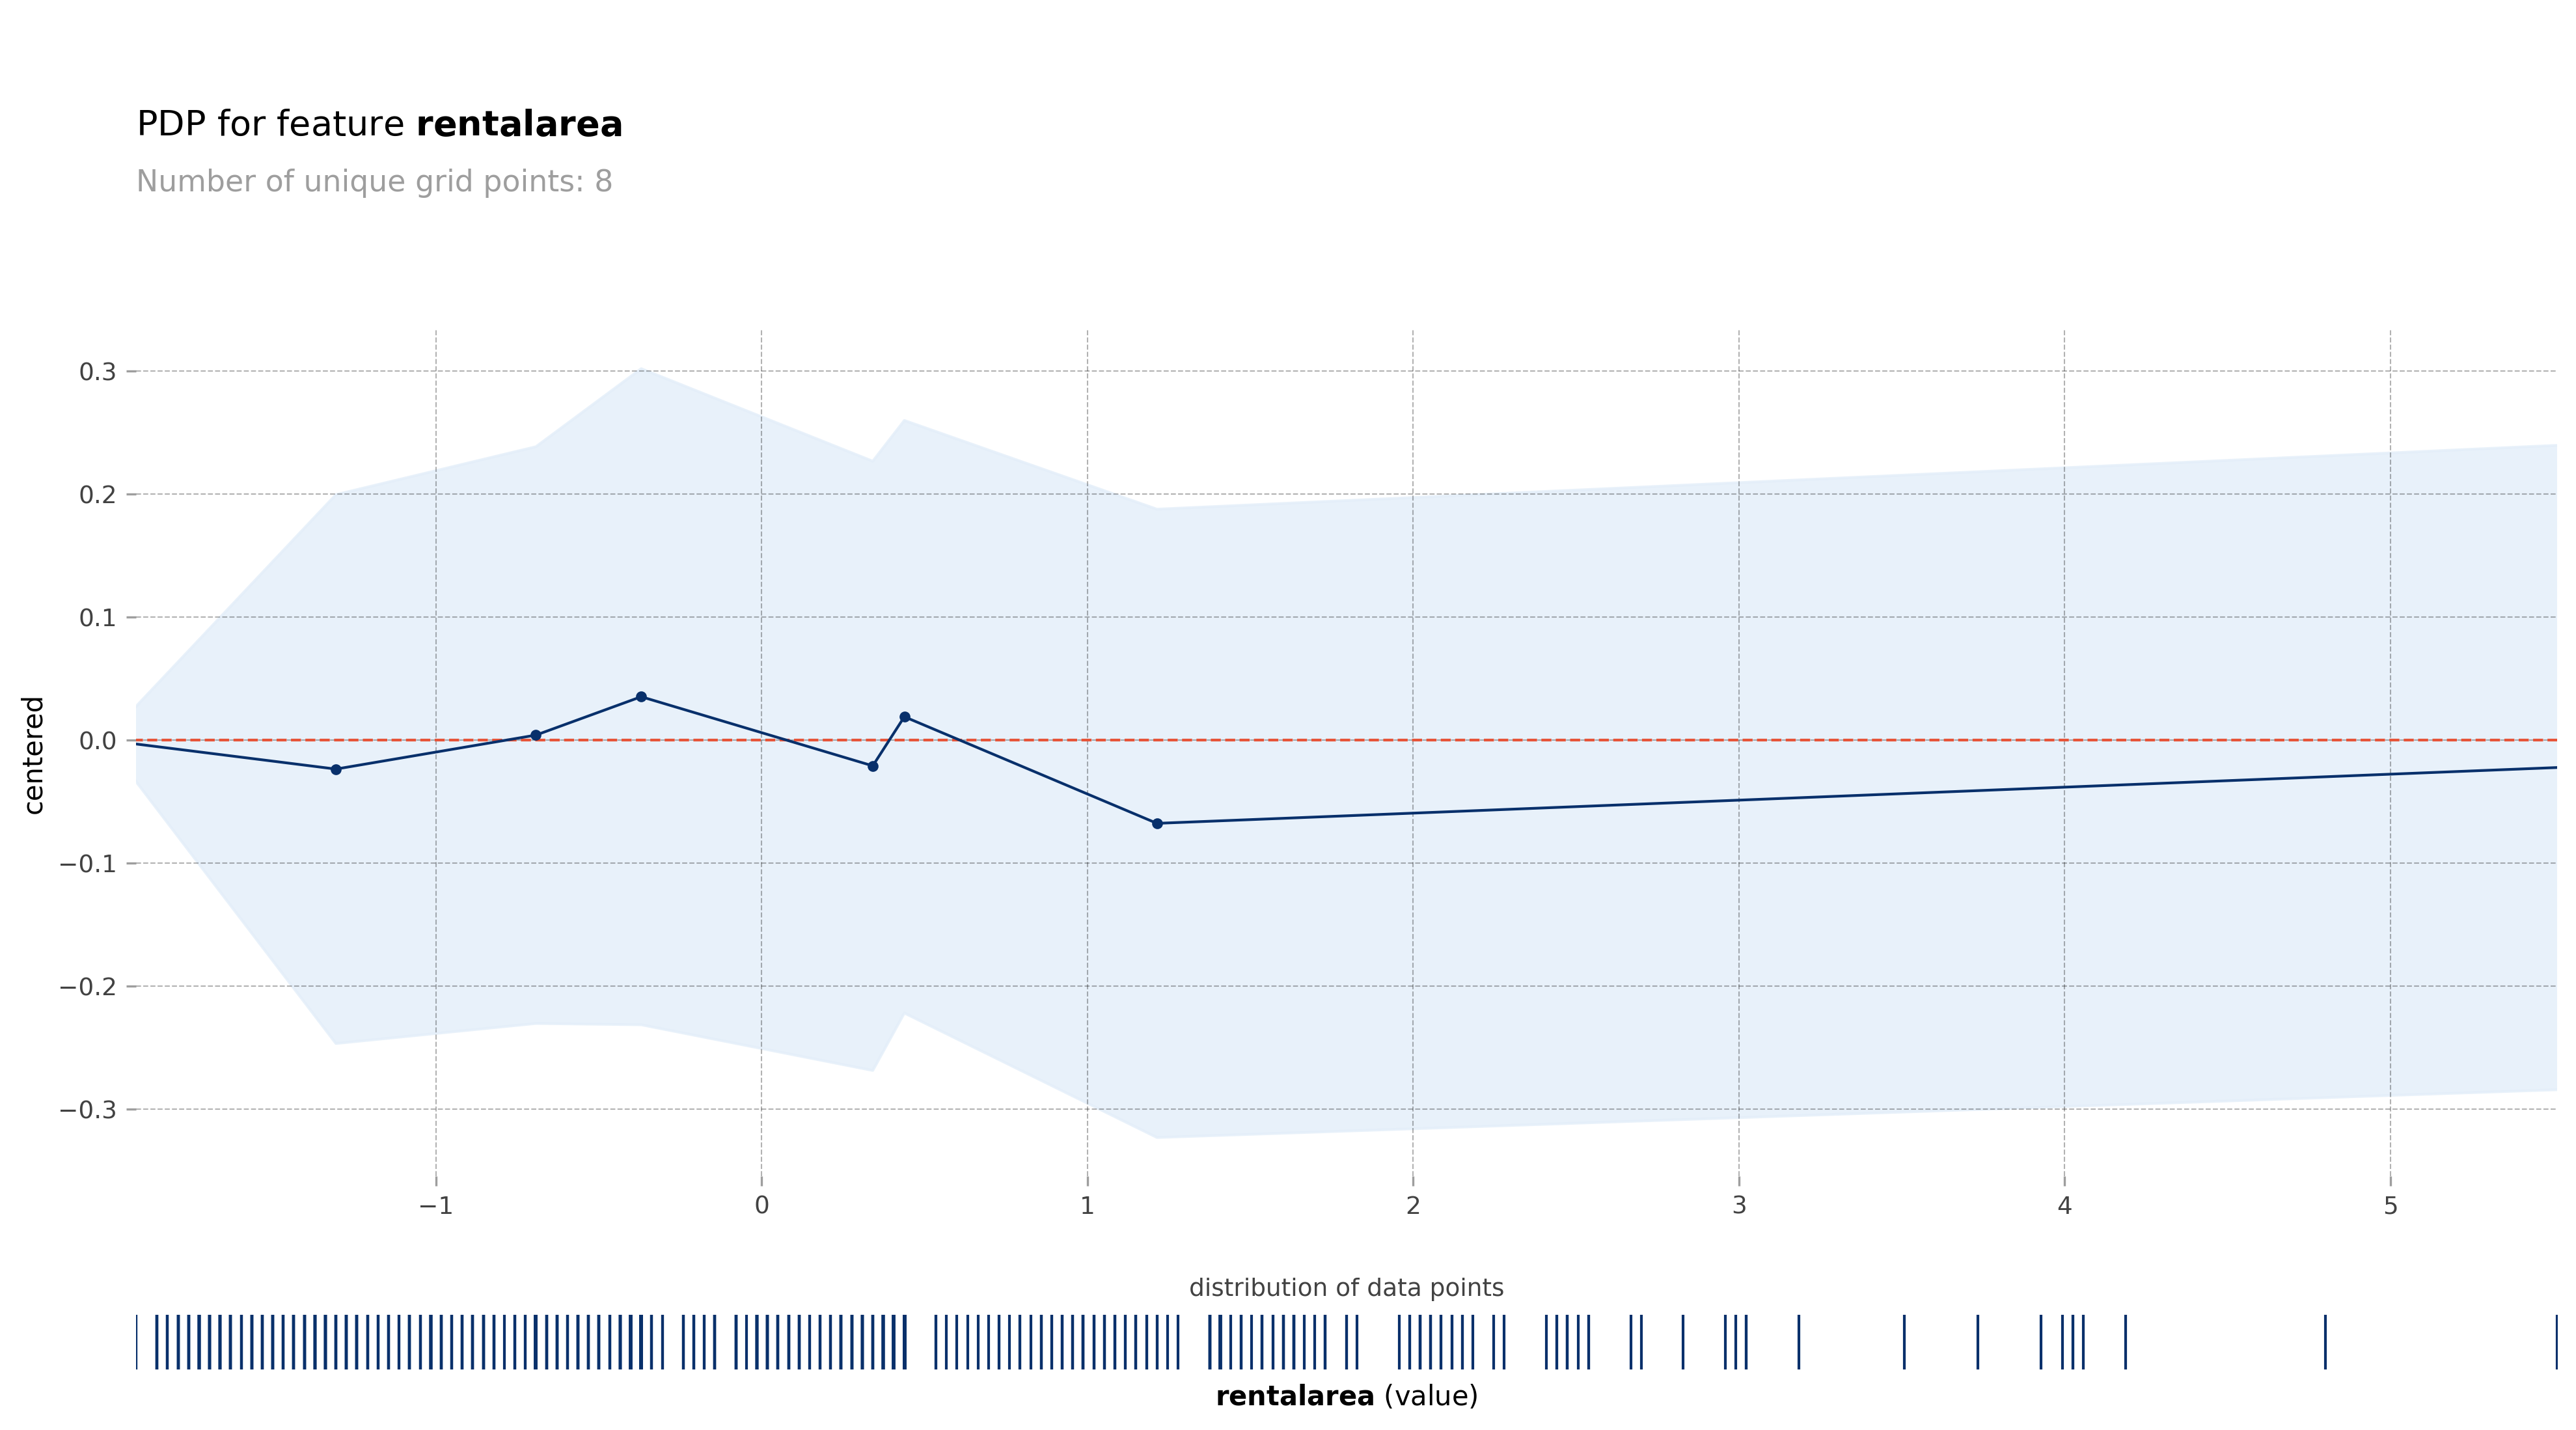

In [59]:
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_isolate = PDPIsolate(df=X_test_preprocessed_df, feature=feature1, feature_name=feature1, model=model, model_features=X_test_preprocessed_df.columns)
pdp_isolate.plot(engine='matplotlib', plot_pts_dist=True)

In [60]:
mappings = encoder.mapping

mapping_data2 = list(filter(lambda x: x["col"] == feature2, mappings))
mapping_data3 = list(filter(lambda x: x["col"] == feature3, mappings))
mapping_data4 = list(filter(lambda x: x["col"] == feature4, mappings))
mapping_data5 = list(filter(lambda x: x["col"] == feature5, mappings))
mapping_data6 = list(filter(lambda x: x["col"] == feature6, mappings))

print(mapping_data2)
print(mapping_data3)
print(mapping_data4)
print(mapping_data5)
print(mapping_data6)

[{'col': 'yearmonth', 'mapping': 2020.08      1
2014.12      2
2017.08      3
2014.03      4
2022.06      5
          ... 
2019.03    117
2020.07    118
2013.09    119
2019.09    120
NaN         -2
Length: 121, dtype: int64, 'data_type': dtype('O')}]
[{'col': 'borough', 'mapping': gangseo          1
seocho           2
yangcheon        3
dobong           4
songpa           5
guro             6
eunpyeong        7
dongdaemungu     8
gangnam          9
seongbuk        10
gangdong        11
jung            12
jungrang        13
yeongdengpo     14
mapo            15
yongsan         16
gwangjin        17
nowon           18
seongdong       19
geumcheon       20
dongjak         21
gwanak          22
jongro          23
seodaemun       24
gangbuk         25
NaN             -2
dtype: int64, 'data_type': dtype('O')}]
[{'col': 'YOC', 'mapping': 2015.0     1
1988.0     2
2002.0     3
1992.0     4
2016.0     5
1999.0     6
2010.0     7
2013.0     8
1997.0     9
1984.0    10
1994.0    11
2003.0    12
2

In [61]:
maps2 = mapping_data2[0]["mapping"]
maps3 = mapping_data3[0]["mapping"]
maps4 = mapping_data4[0]["mapping"]
maps5 = mapping_data5[0]["mapping"]
maps6 = mapping_data6[0]["mapping"]

encoded_features2 = maps2.values.tolist()
original_features2 = maps2.index.tolist()
encoded_features3 = maps3.values.tolist()
original_features3 = maps3.index.tolist()
encoded_features4 = maps4.values.tolist()
original_features4 = maps4.index.tolist()
encoded_features5 = maps5.values.tolist()
original_features5 = maps5.index.tolist()
encoded_features6 = maps6.values.tolist()
original_features6 = maps6.index.tolist()

In [62]:
target_feature2 = 'yearmonth'
target_feature3 = 'YOC'
target_feature4 = 'borough'
target_feature5 = 'buildinguse'
target_feature6 = 'floor'

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

([<matplotlib.axis.XTick at 0x7fa398307310>,
 [Text(1, 0, '2020.08'),
  Text(2, 0, '2014.12'),
  Text(3, 0, '2017.08'),
  Text(4, 0, '2014.03'),
  Text(5, 0, '2022.06'),
  Text(6, 0, '2017.02'),
  Text(7, 0, '2015.03'),
  Text(8, 0, '2020.01'),
  Text(9, 0, '2021.12'),
  Text(10, 0, '2020.09'),
  Text(11, 0, '2014.11'),
  Text(12, 0, '2019.04'),
  Text(13, 0, '2021.07'),
  Text(14, 0, '2014.06'),
  Text(15, 0, '2018.08'),
  Text(16, 0, '2020.12'),
  Text(17, 0, '2013.03'),
  Text(18, 0, '2016.04'),
  Text(19, 0, '2013.01'),
  Text(20, 0, '2016.10'),
  Text(21, 0, '2019.01'),
  Text(22, 0, '2022.05'),
  Text(23, 0, '2022.02'),
  Text(24, 0, '2019.07'),
  Text(25, 0, '2018.01'),
  Text(26, 0, '2021.03'),
  Text(27, 0, '2013.06'),
  Text(28, 0, '2022.07'),
  Text(29, 0, '2014.04'),
  Text(30, 0, '2019.12'),
  Text(31, 0, '2015.12'),
  Text(32, 0, '2021.01'),
  Text(33, 0, '2021.05'),
  Text(34, 0, '2018.02'),
  Text(35, 0, '2014.07'),
  Text(36, 0, '2017.01'),
  Text(37, 0, '2016.02'),
  

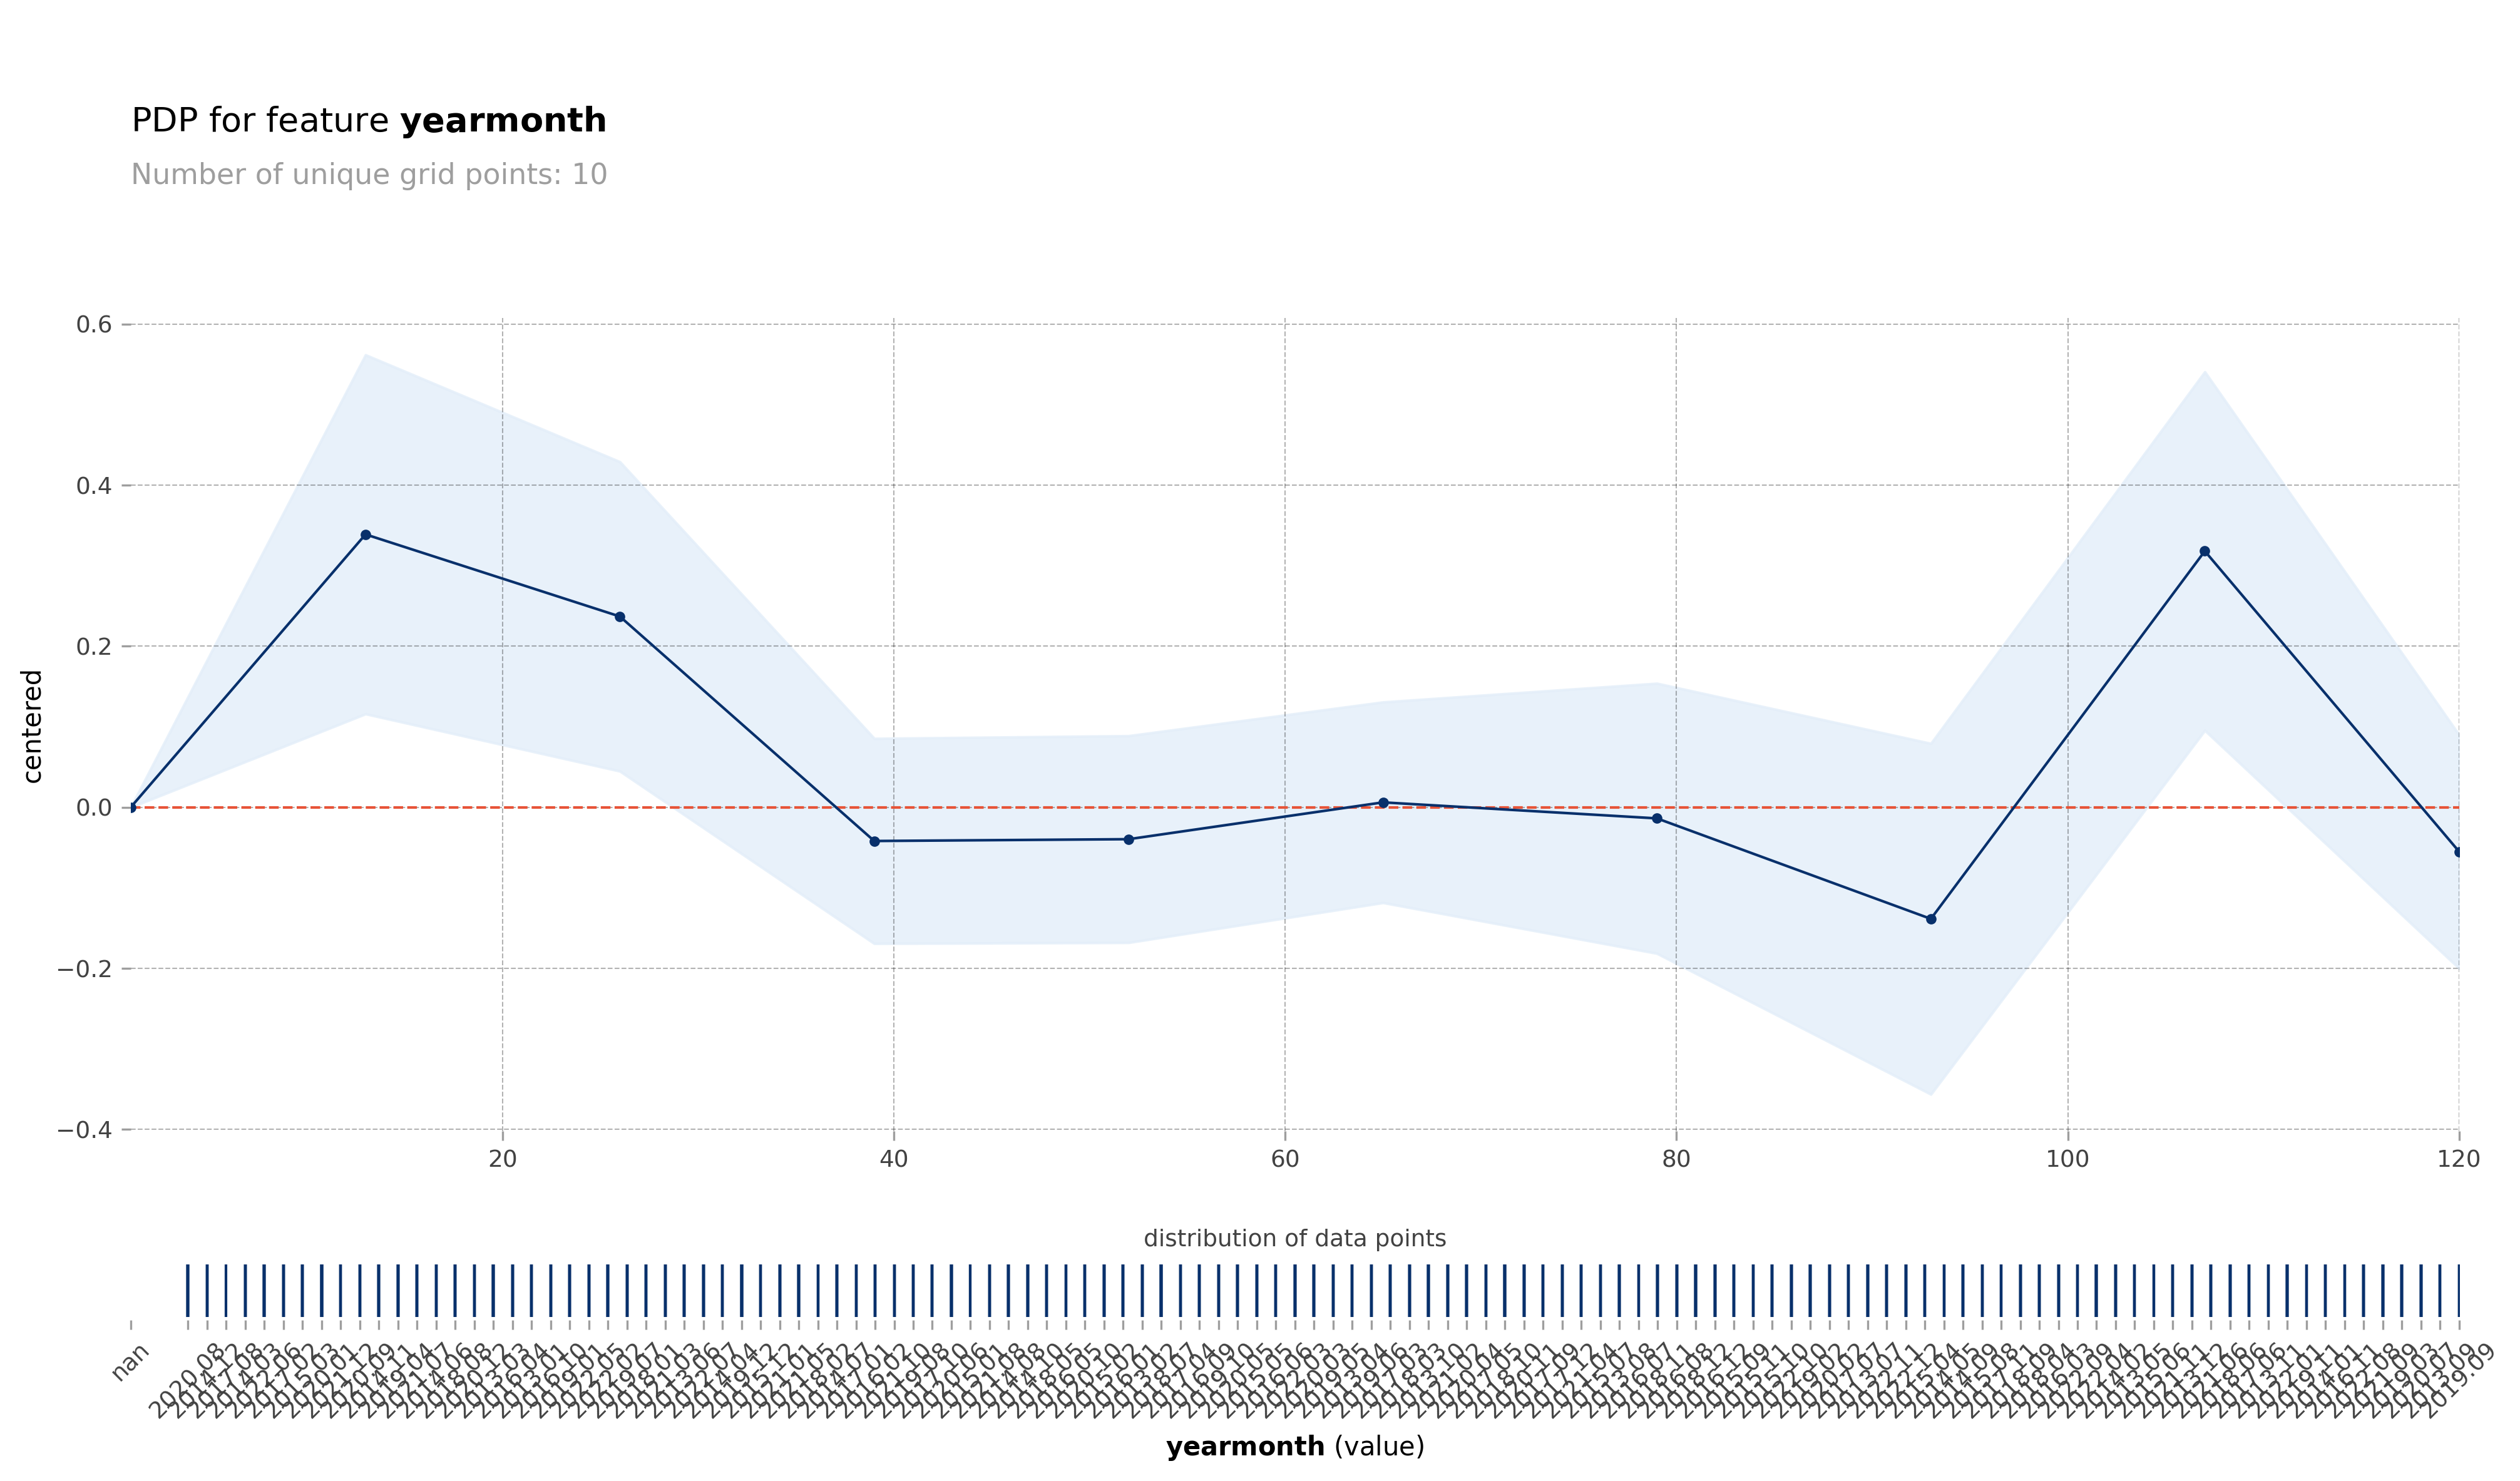

In [64]:
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_isolate22 = PDPIsolate(
    df=X_test_preprocessed_df,
    feature=target_feature2,
    feature_name=target_feature2,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_isolate22.plot(engine='matplotlib', plot_pts_dist=True)
plt.xticks(encoded_features2, original_features2, rotation=45)

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

([<matplotlib.axis.XTick at 0x7fa3932f6980>,
 [Text(1, 0, 'gangseo'),
  Text(2, 0, 'seocho'),
  Text(3, 0, 'yangcheon'),
  Text(4, 0, 'dobong'),
  Text(5, 0, 'songpa'),
  Text(6, 0, 'guro'),
  Text(7, 0, 'eunpyeong'),
  Text(8, 0, 'dongdaemungu'),
  Text(9, 0, 'gangnam'),
  Text(10, 0, 'seongbuk'),
  Text(11, 0, 'gangdong'),
  Text(12, 0, 'jung'),
  Text(13, 0, 'jungrang'),
  Text(14, 0, 'yeongdengpo'),
  Text(15, 0, 'mapo'),
  Text(16, 0, 'yongsan'),
  Text(17, 0, 'gwangjin'),
  Text(18, 0, 'nowon'),
  Text(19, 0, 'seongdong'),
  Text(20, 0, 'geumcheon'),
  Text(21, 0, 'dongjak'),
  Text(22, 0, 'gwanak'),
  Text(23, 0, 'jongro'),
  Text(24, 0, 'seodaemun'),
  Text(25, 0, 'gangbuk'),
  Text(-2, 0, 'nan')])

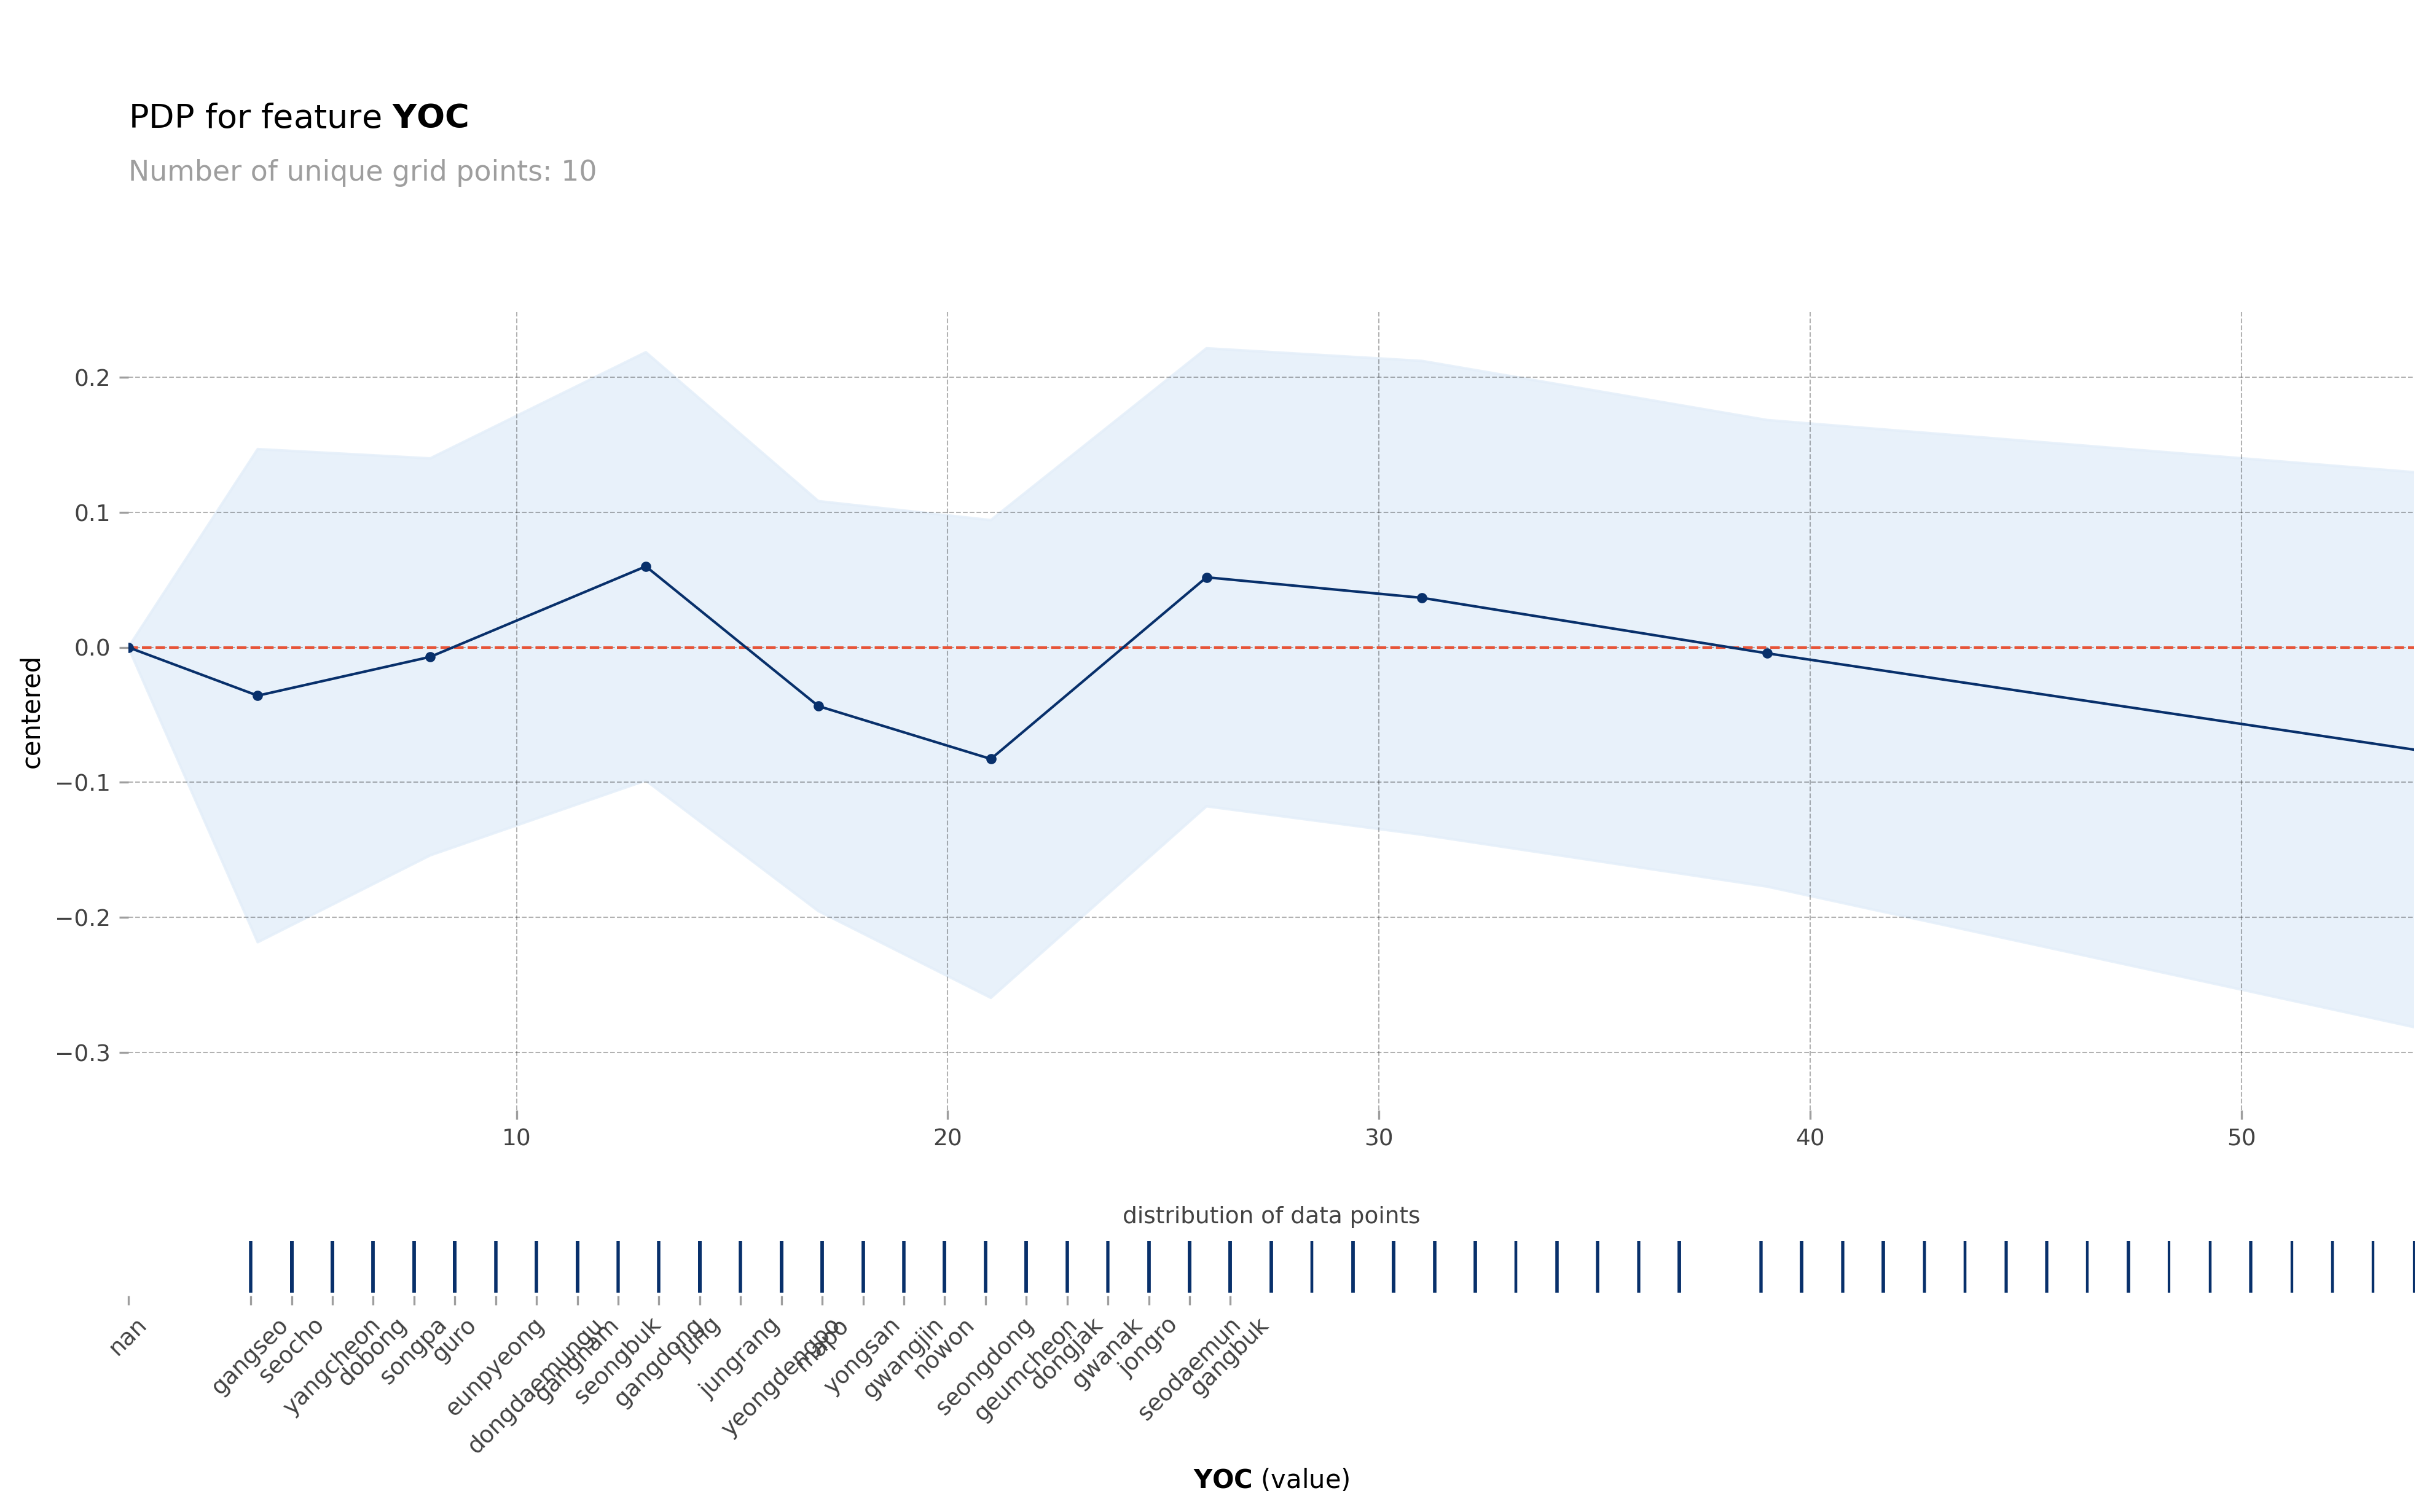

In [65]:
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_isolate33 = PDPIsolate(
    df=X_test_preprocessed_df,
    feature=target_feature3,
    feature_name=target_feature3,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_isolate33.plot(engine='matplotlib', plot_pts_dist=True)
plt.xticks(encoded_features3, original_features3, rotation=45)

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

([<matplotlib.axis.XTick at 0x7fa397f19030>,
 [Text(1, 0, '2015.0'),
  Text(2, 0, '1988.0'),
  Text(3, 0, '2002.0'),
  Text(4, 0, '1992.0'),
  Text(5, 0, '2016.0'),
  Text(6, 0, '1999.0'),
  Text(7, 0, '2010.0'),
  Text(8, 0, '2013.0'),
  Text(9, 0, '1997.0'),
  Text(10, 0, '1984.0'),
  Text(11, 0, '1994.0'),
  Text(12, 0, '2003.0'),
  Text(13, 0, '2020.0'),
  Text(14, 0, '2004.0'),
  Text(15, 0, '1993.0'),
  Text(16, 0, '2018.0'),
  Text(17, 0, '1995.0'),
  Text(18, 0, '2001.0'),
  Text(19, 0, '1996.0'),
  Text(20, 0, '1987.0'),
  Text(21, 0, '1986.0'),
  Text(22, 0, '1990.0'),
  Text(23, 0, '1998.0'),
  Text(24, 0, '2000.0'),
  Text(25, 0, '2008.0'),
  Text(26, 0, '2019.0'),
  Text(27, 0, '1982.0'),
  Text(28, 0, '1989.0'),
  Text(29, 0, '2014.0'),
  Text(30, 0, '2011.0'),
  Text(31, 0, '2017.0'),
  Text(32, 0, '1977.0'),
  Text(33, 0, '2009.0'),
  Text(34, 0, '1983.0'),
  Text(35, 0, '1985.0'),
  Text(36, 0, '2005.0'),
  Text(37, 0, '1976.0'),
  Text(38, 0, '1991.0'),
  Text(39, 0, 

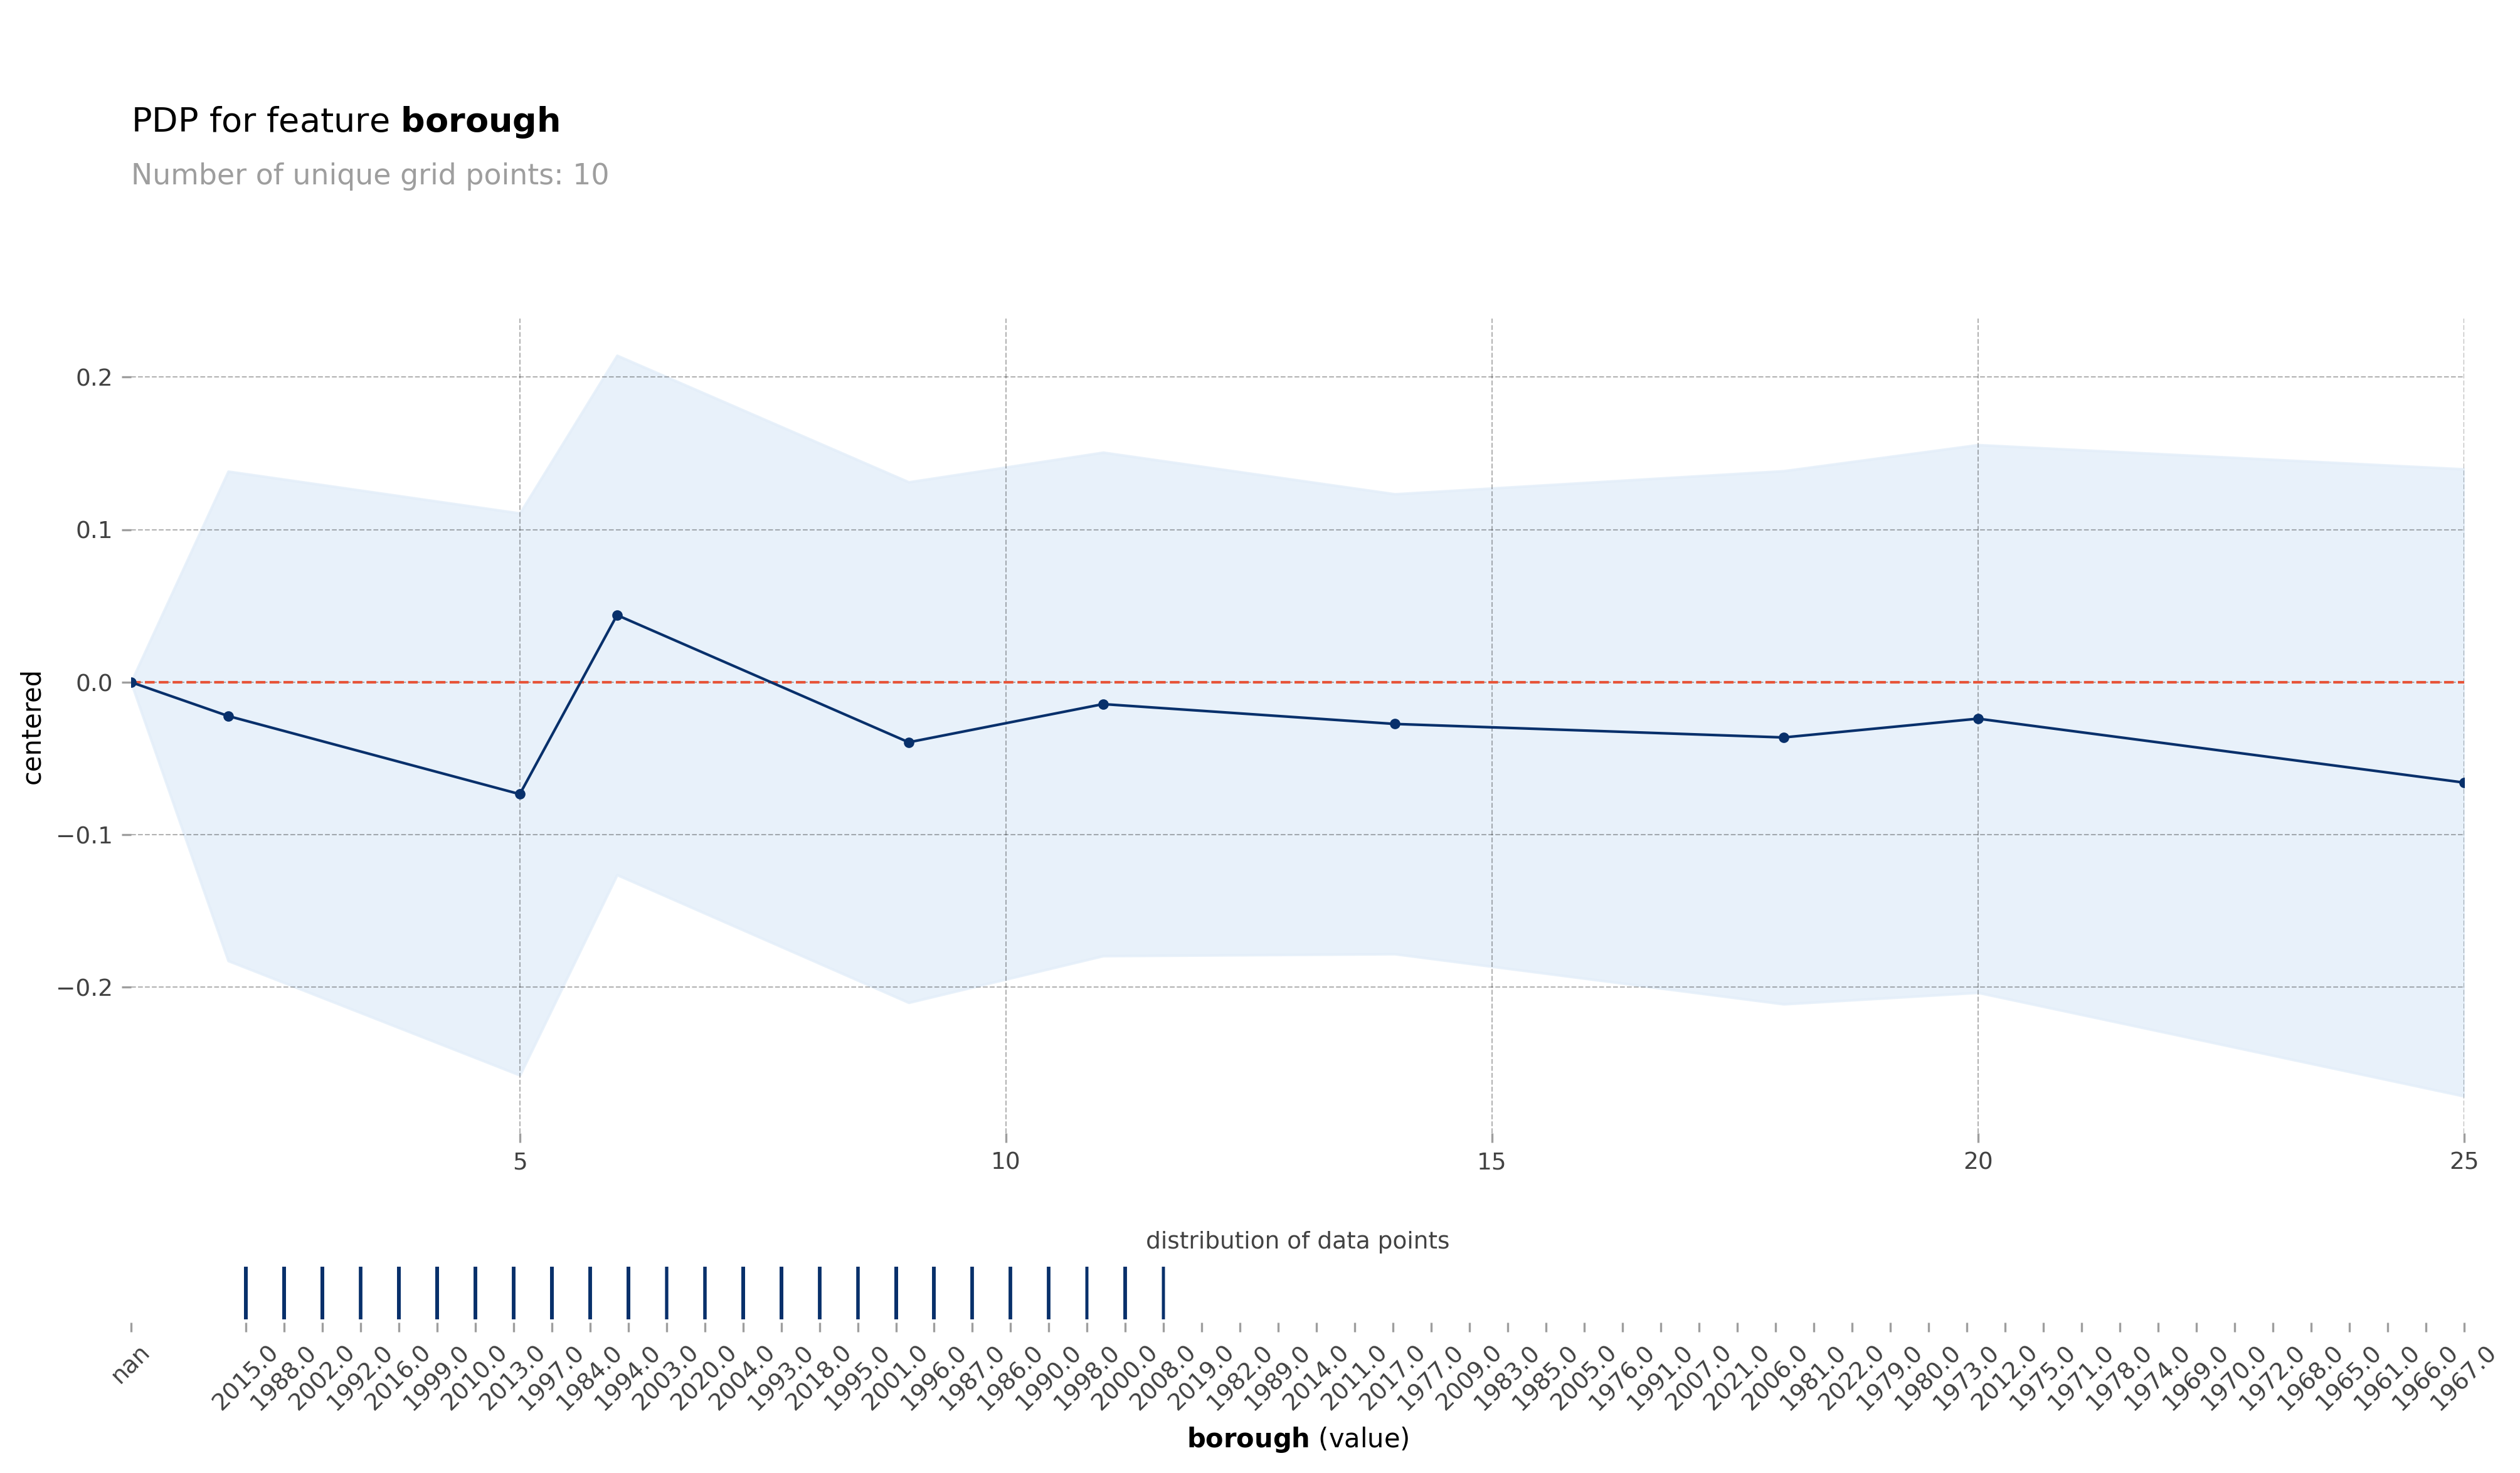

In [66]:
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_isolate44 = PDPIsolate(
    df=X_test_preprocessed_df,
    feature=target_feature4,
    feature_name=target_feature4,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_isolate44.plot(engine='matplotlib', plot_pts_dist=True)
plt.xticks(encoded_features4, original_features4, rotation=45)

obtain pred_func from the provided model.


  0%|          | 0/2 [00:00<?, ?it/s]

([<matplotlib.axis.XTick at 0x7fa38d99e110>,
 [Text(1, 0, 'Officetels'), Text(2, 0, 'apartment'), Text(-2, 0, 'nan')])

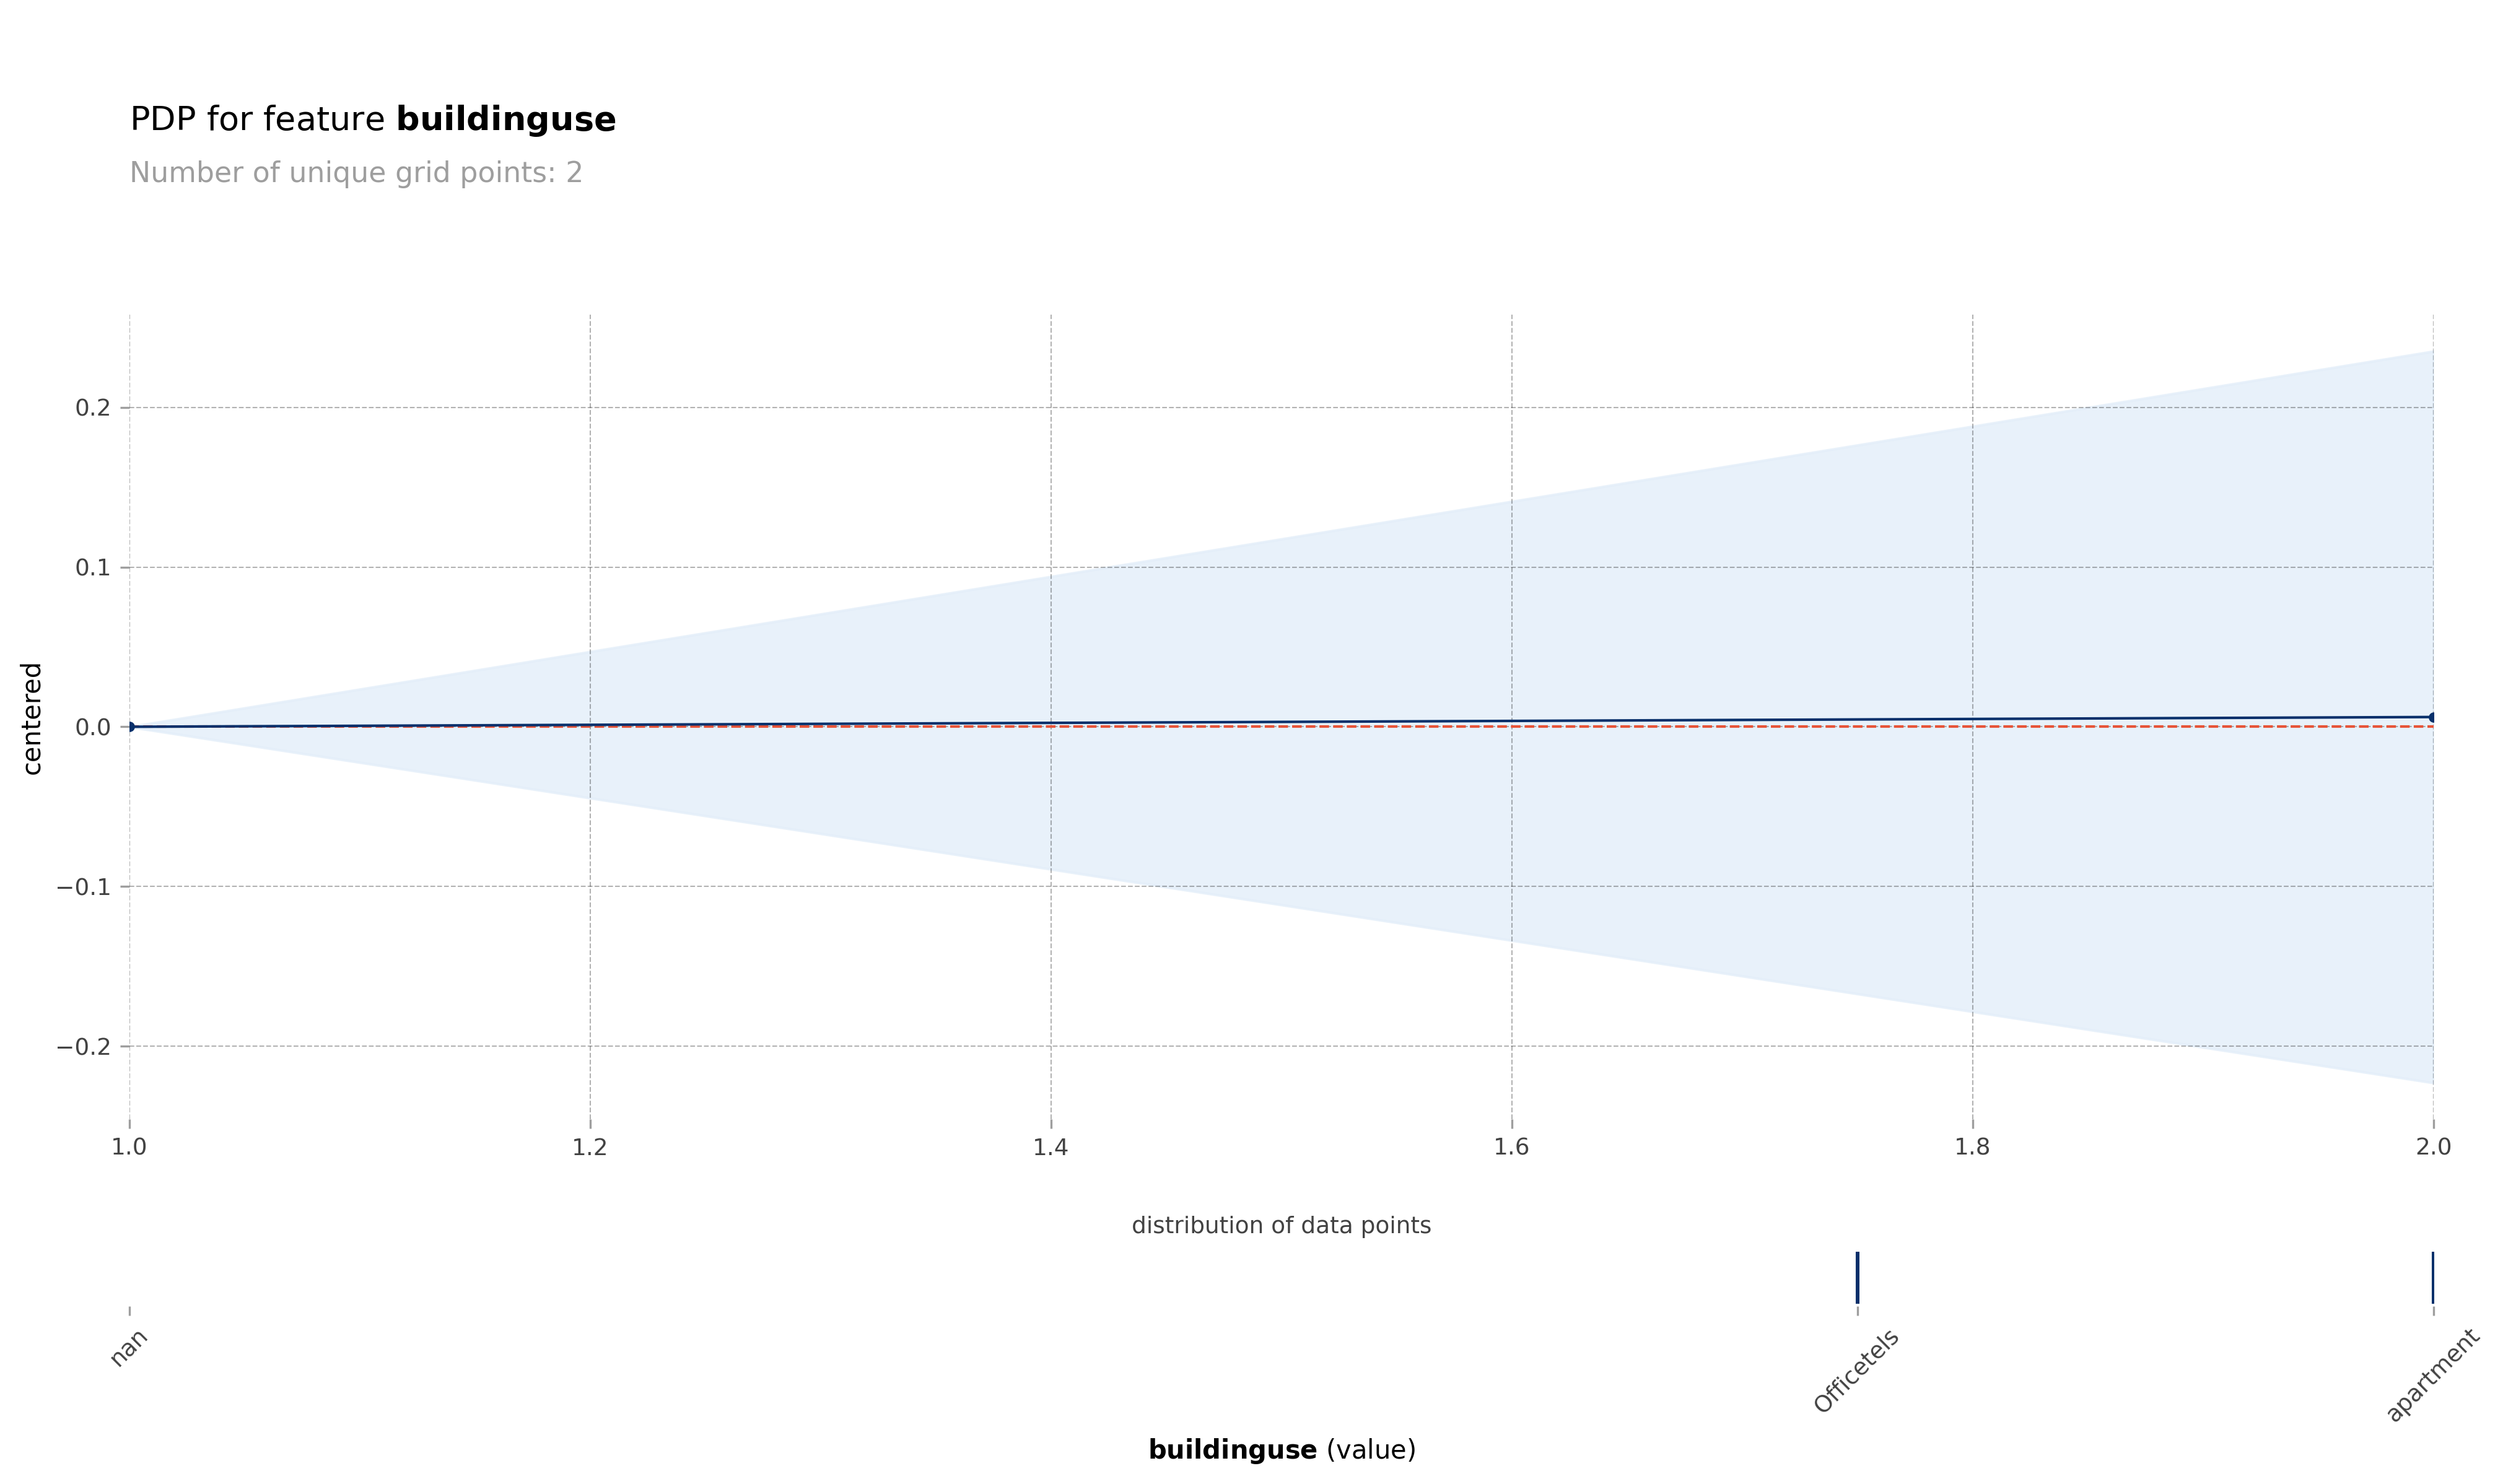

In [67]:
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_isolate55 = PDPIsolate(
    df=X_test_preprocessed_df,
    feature=target_feature5,
    feature_name=target_feature5,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_isolate55.plot(engine='matplotlib', plot_pts_dist=True)
plt.xticks(encoded_features5, original_features5, rotation=45)

obtain pred_func from the provided model.


  0%|          | 0/3 [00:00<?, ?it/s]

([<matplotlib.axis.XTick at 0x7fa3930e2950>,
 [Text(1, 0, '3.0'), Text(2, 0, '2.0'), Text(3, 0, '1.0'), Text(-2, 0, 'nan')])

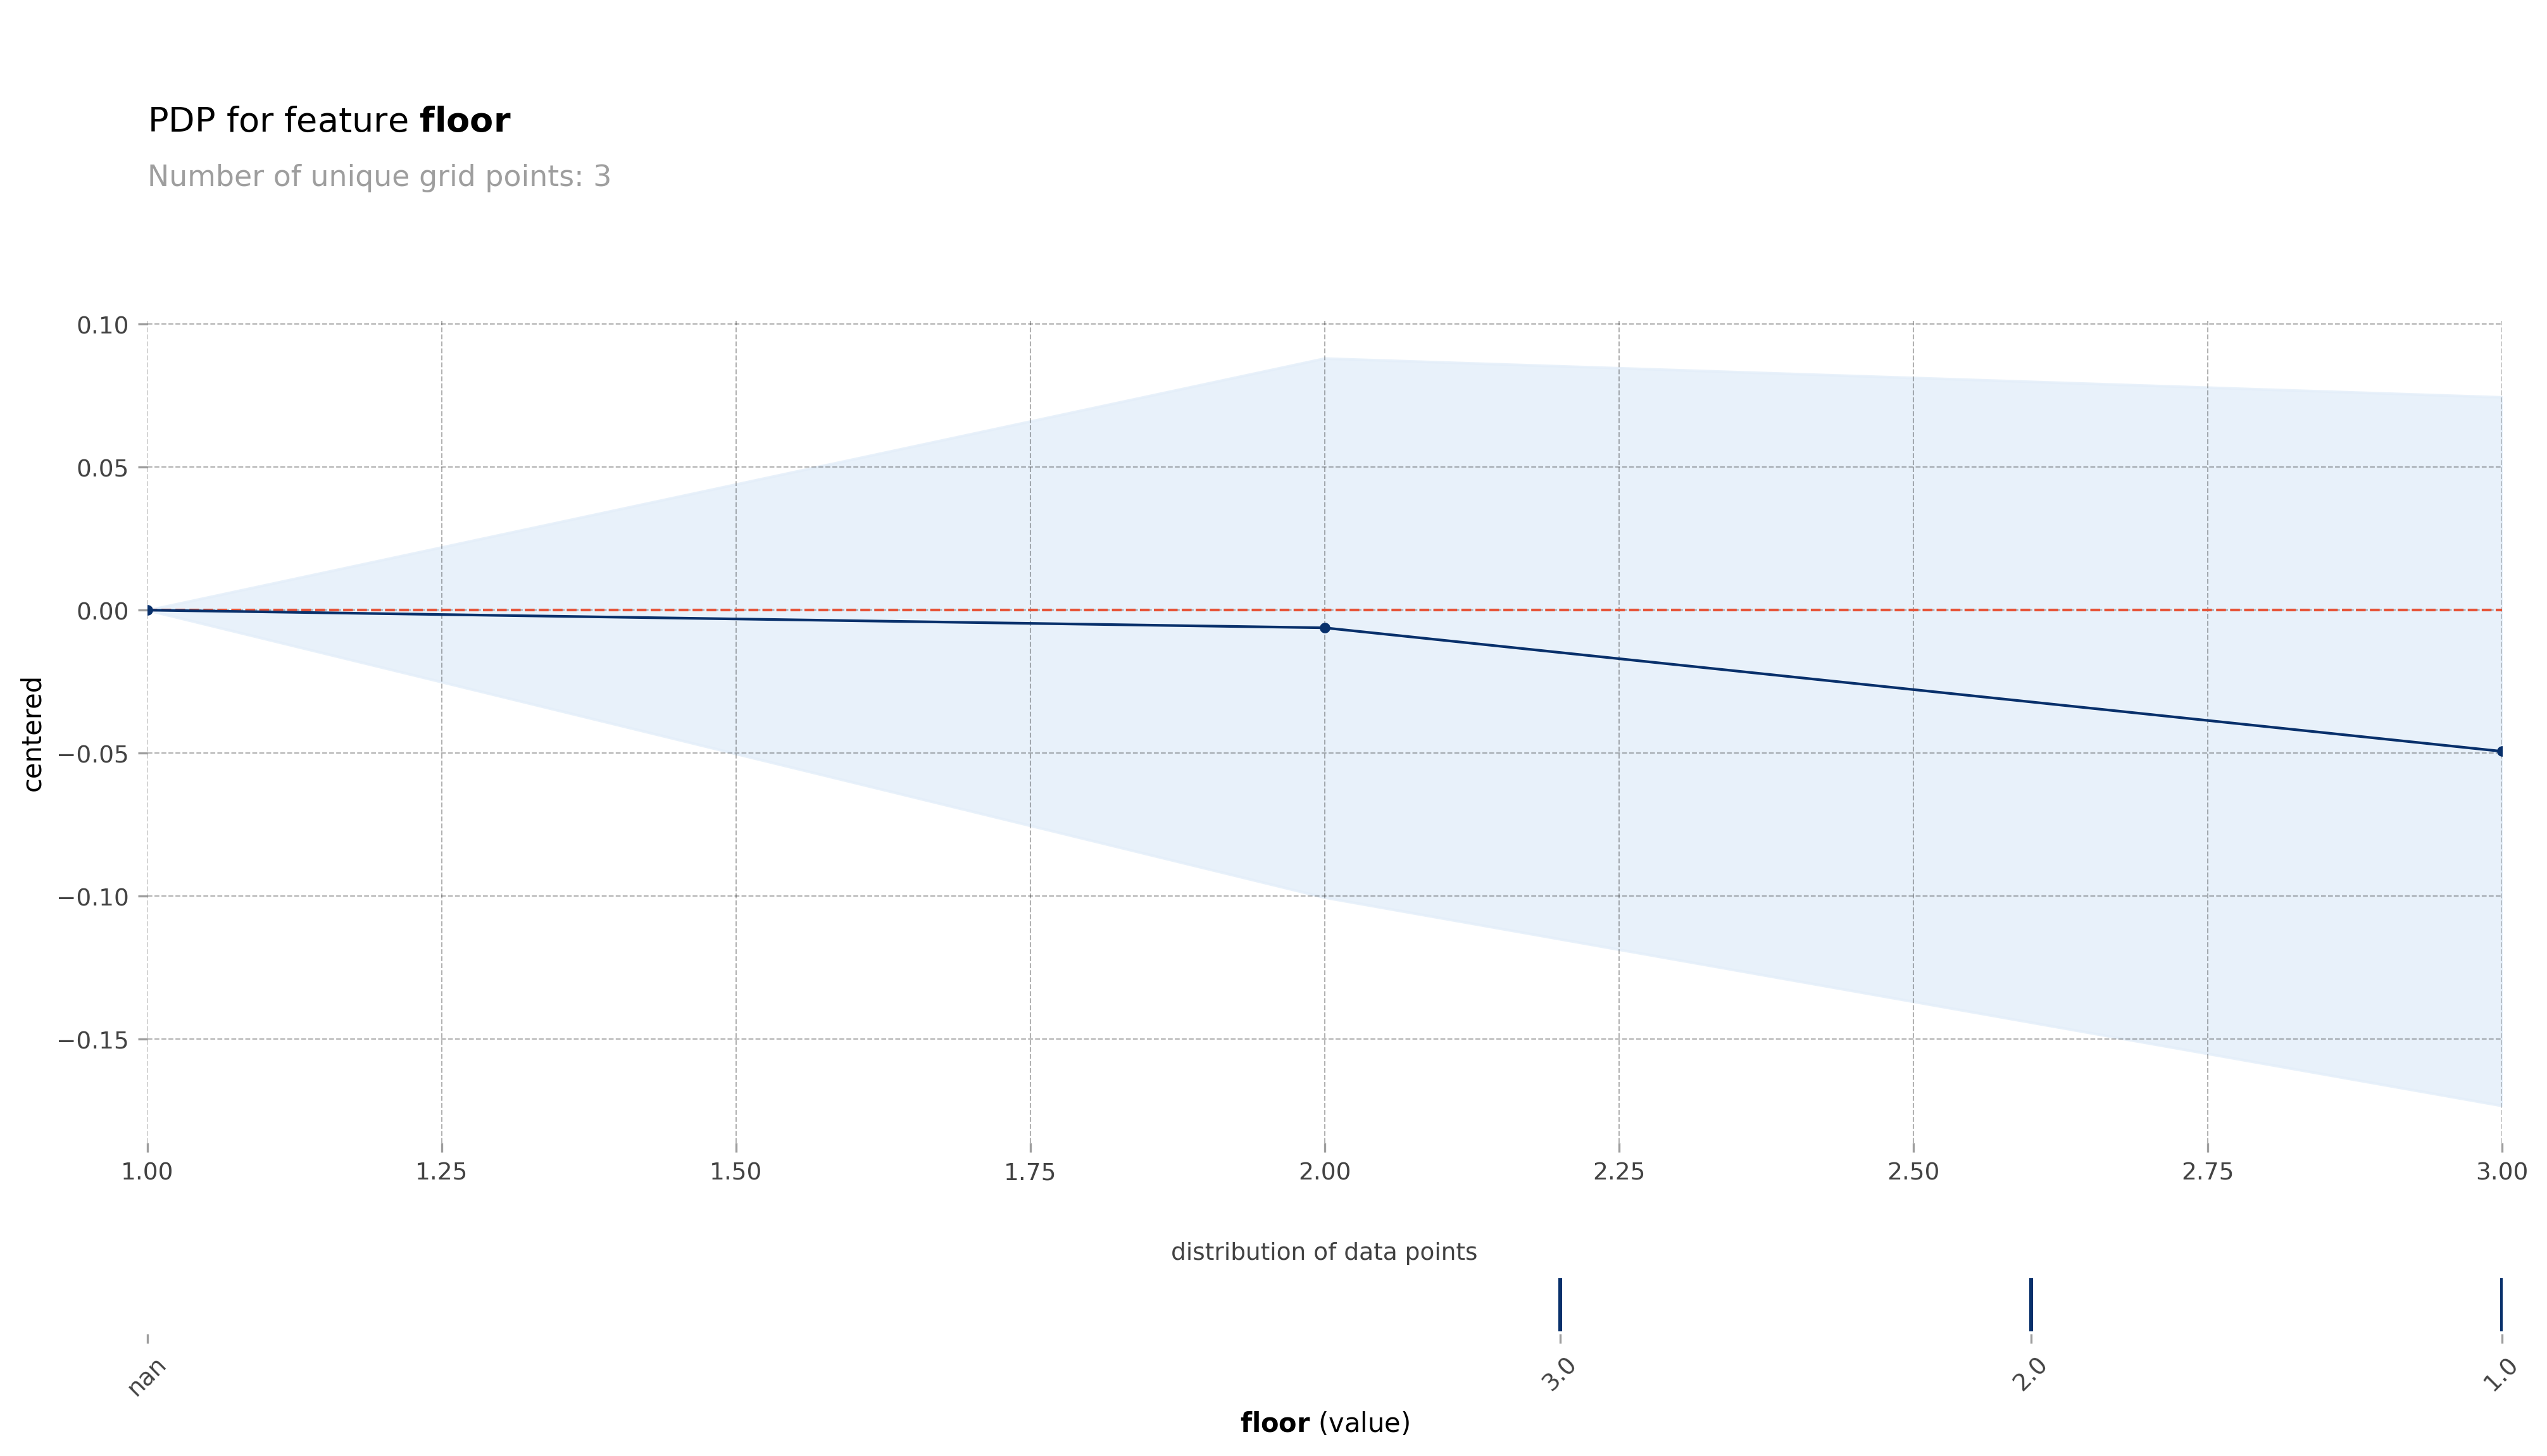

In [68]:
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_isolate66 = PDPIsolate(
    df=X_test_preprocessed_df,
    feature=target_feature6,
    feature_name=target_feature6,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_isolate66.plot(engine='matplotlib', plot_pts_dist=True)
plt.xticks(encoded_features6, original_features6, rotation=45)

##### PDP interactive

In [69]:
from pdpbox.pdp import PDPIsolate, PDPInteract

In [70]:
# 2가지 특성으로 조사
# yearmonth & YOC : 범주가 너무 많음!

#target_features1 = ['rentalarea', 'yearmonth']
#target_features2 = ['rentalarea', 'YOC']
target_features3 = ['rentalarea', 'borough']
target_features4 = ['rentalarea', 'buildinguse']
target_features5 = ['rentalarea', 'floor']
#target_features6 = ['yearmonth', 'YOC']
#target_features7 = ['yearmonth', 'borough']
#target_features8 = ['yearmonth', 'buildinguse']
#target_features9 = ['yearmonth', 'floor']
#target_features10 = ['YOC', 'borough']
#target_features11 = ['YOC', 'buildinguse']
#target_features12 = ['YOC', 'floor']
target_features13 = ['borough', 'buildinguse']
target_features14 = ['borough', 'floor']
target_features15 = ['buildinguse', 'floor']

obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/25 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/200 [00:00<?, ?it/s]

(<Figure size 4800x2700 with 3 Axes>,
 {'title_axes': <Axes: >,
  'interact_axes': [<Axes: xlabel='$\\bf{rentalarea}$ (value)', ylabel='$\\bf{borough}$ (value)'>],
  'isolate_axes': [[None, None]]})

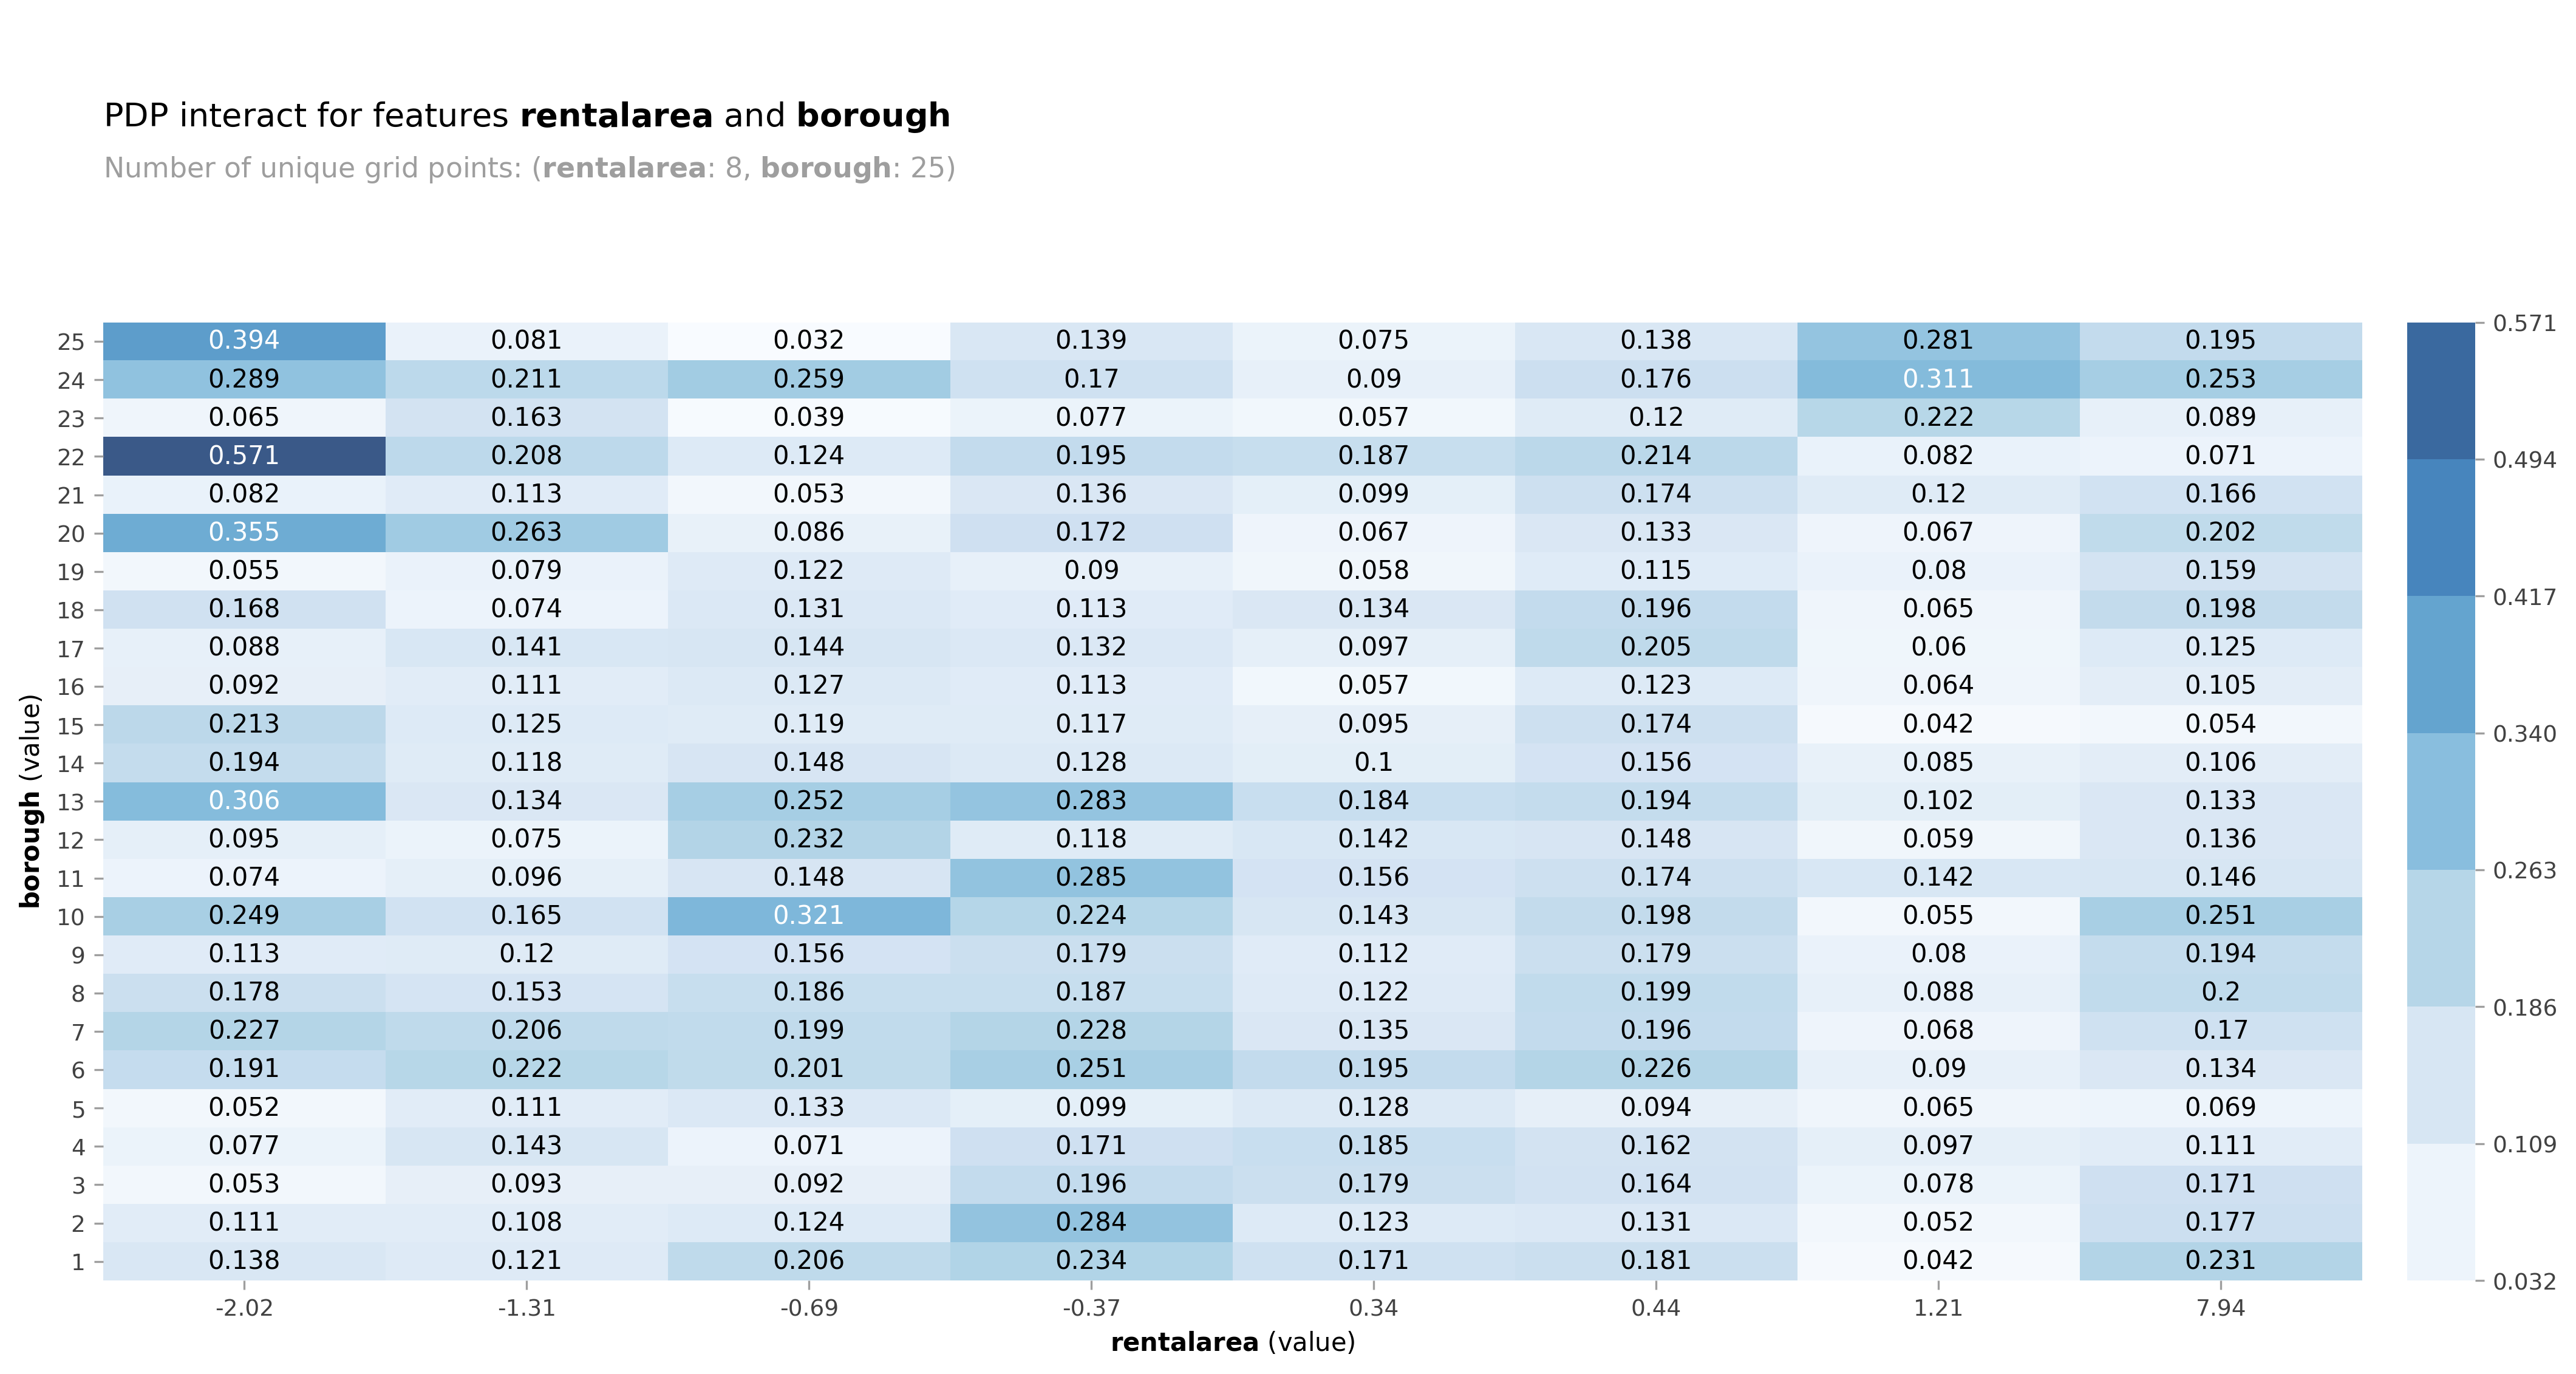

In [71]:
# 임대면적 & 자치구명
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact3 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features3,
    feature_names=target_features3,
    model=model,
    model_features=X_test_preprocessed_df.columns,
    cust_grid_points=[None,[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
    ])
pdp_Interact3.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')

obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/2 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/16 [00:00<?, ?it/s]

(<Figure size 4800x2700 with 3 Axes>,
 {'title_axes': <Axes: >,
  'interact_axes': [<Axes: xlabel='$\\bf{rentalarea}$ (value)', ylabel='$\\bf{buildinguse}$ (value)'>],
  'isolate_axes': [[None, None]]})

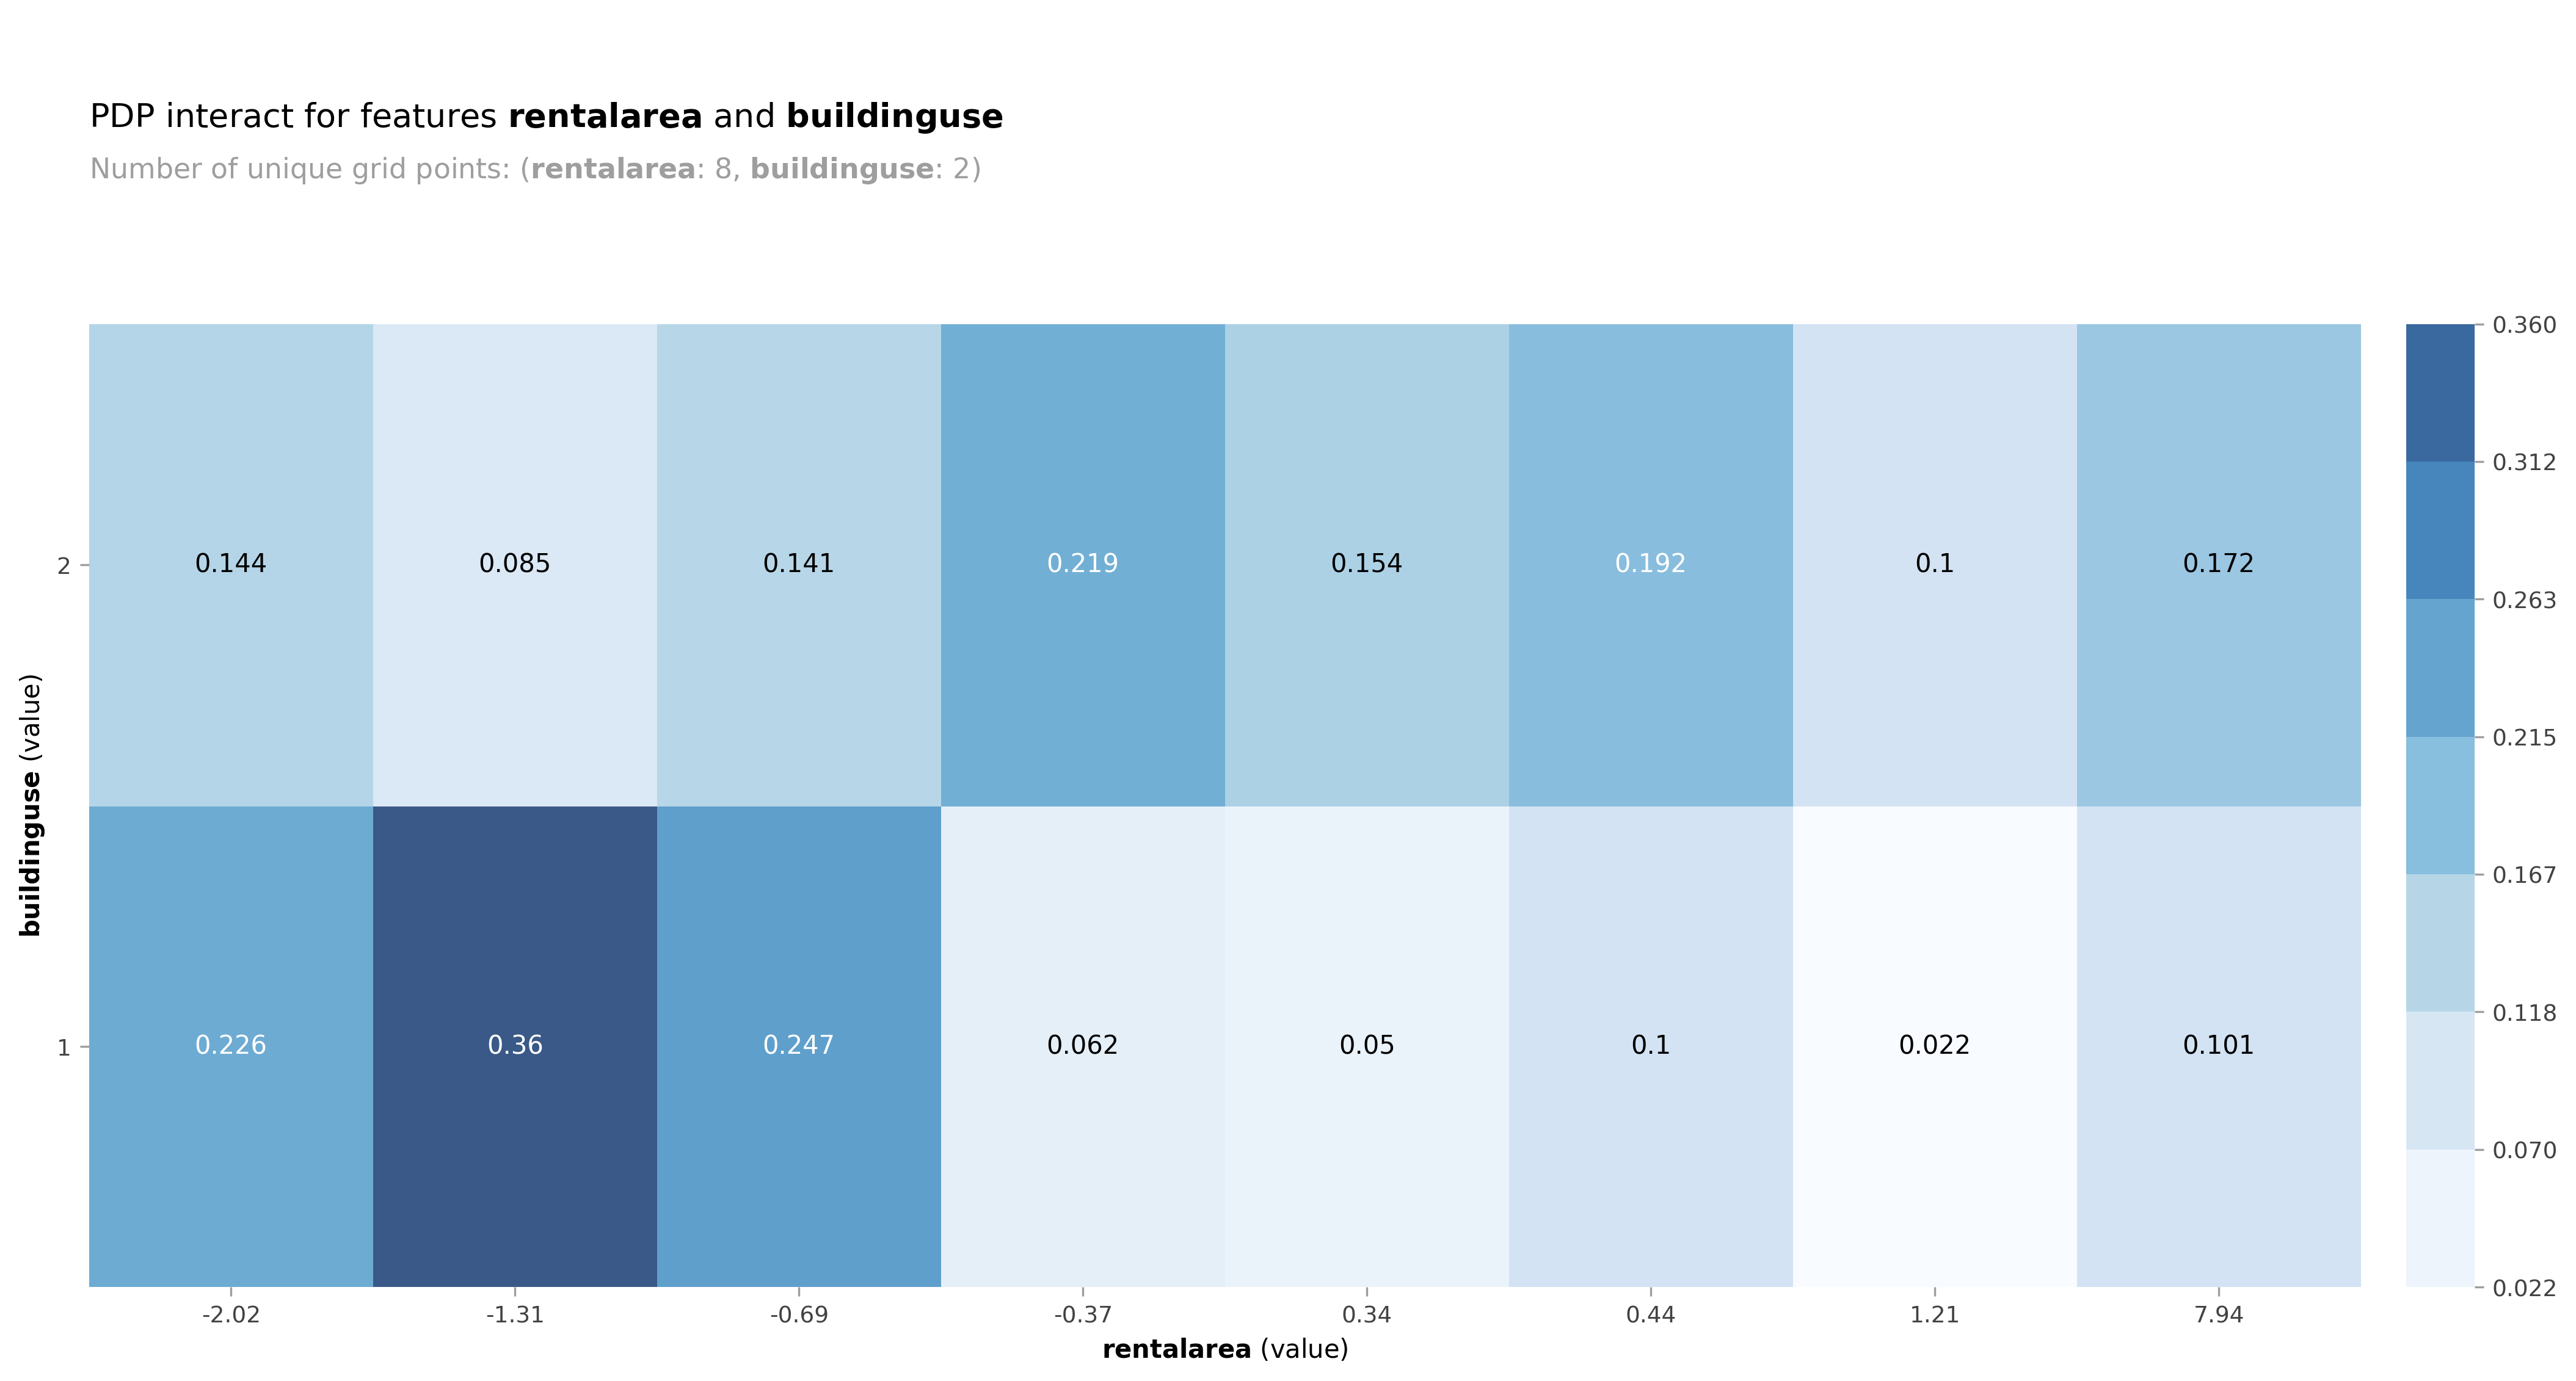

In [72]:
# 임대면적 & 건물용도
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact4 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features4,
    feature_names=target_features4,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_Interact4.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')

obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/3 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/24 [00:00<?, ?it/s]

(<Figure size 4800x2700 with 3 Axes>,
 {'title_axes': <Axes: >,
  'interact_axes': [<Axes: xlabel='$\\bf{rentalarea}$ (value)', ylabel='$\\bf{floor}$ (value)'>],
  'isolate_axes': [[None, None]]})

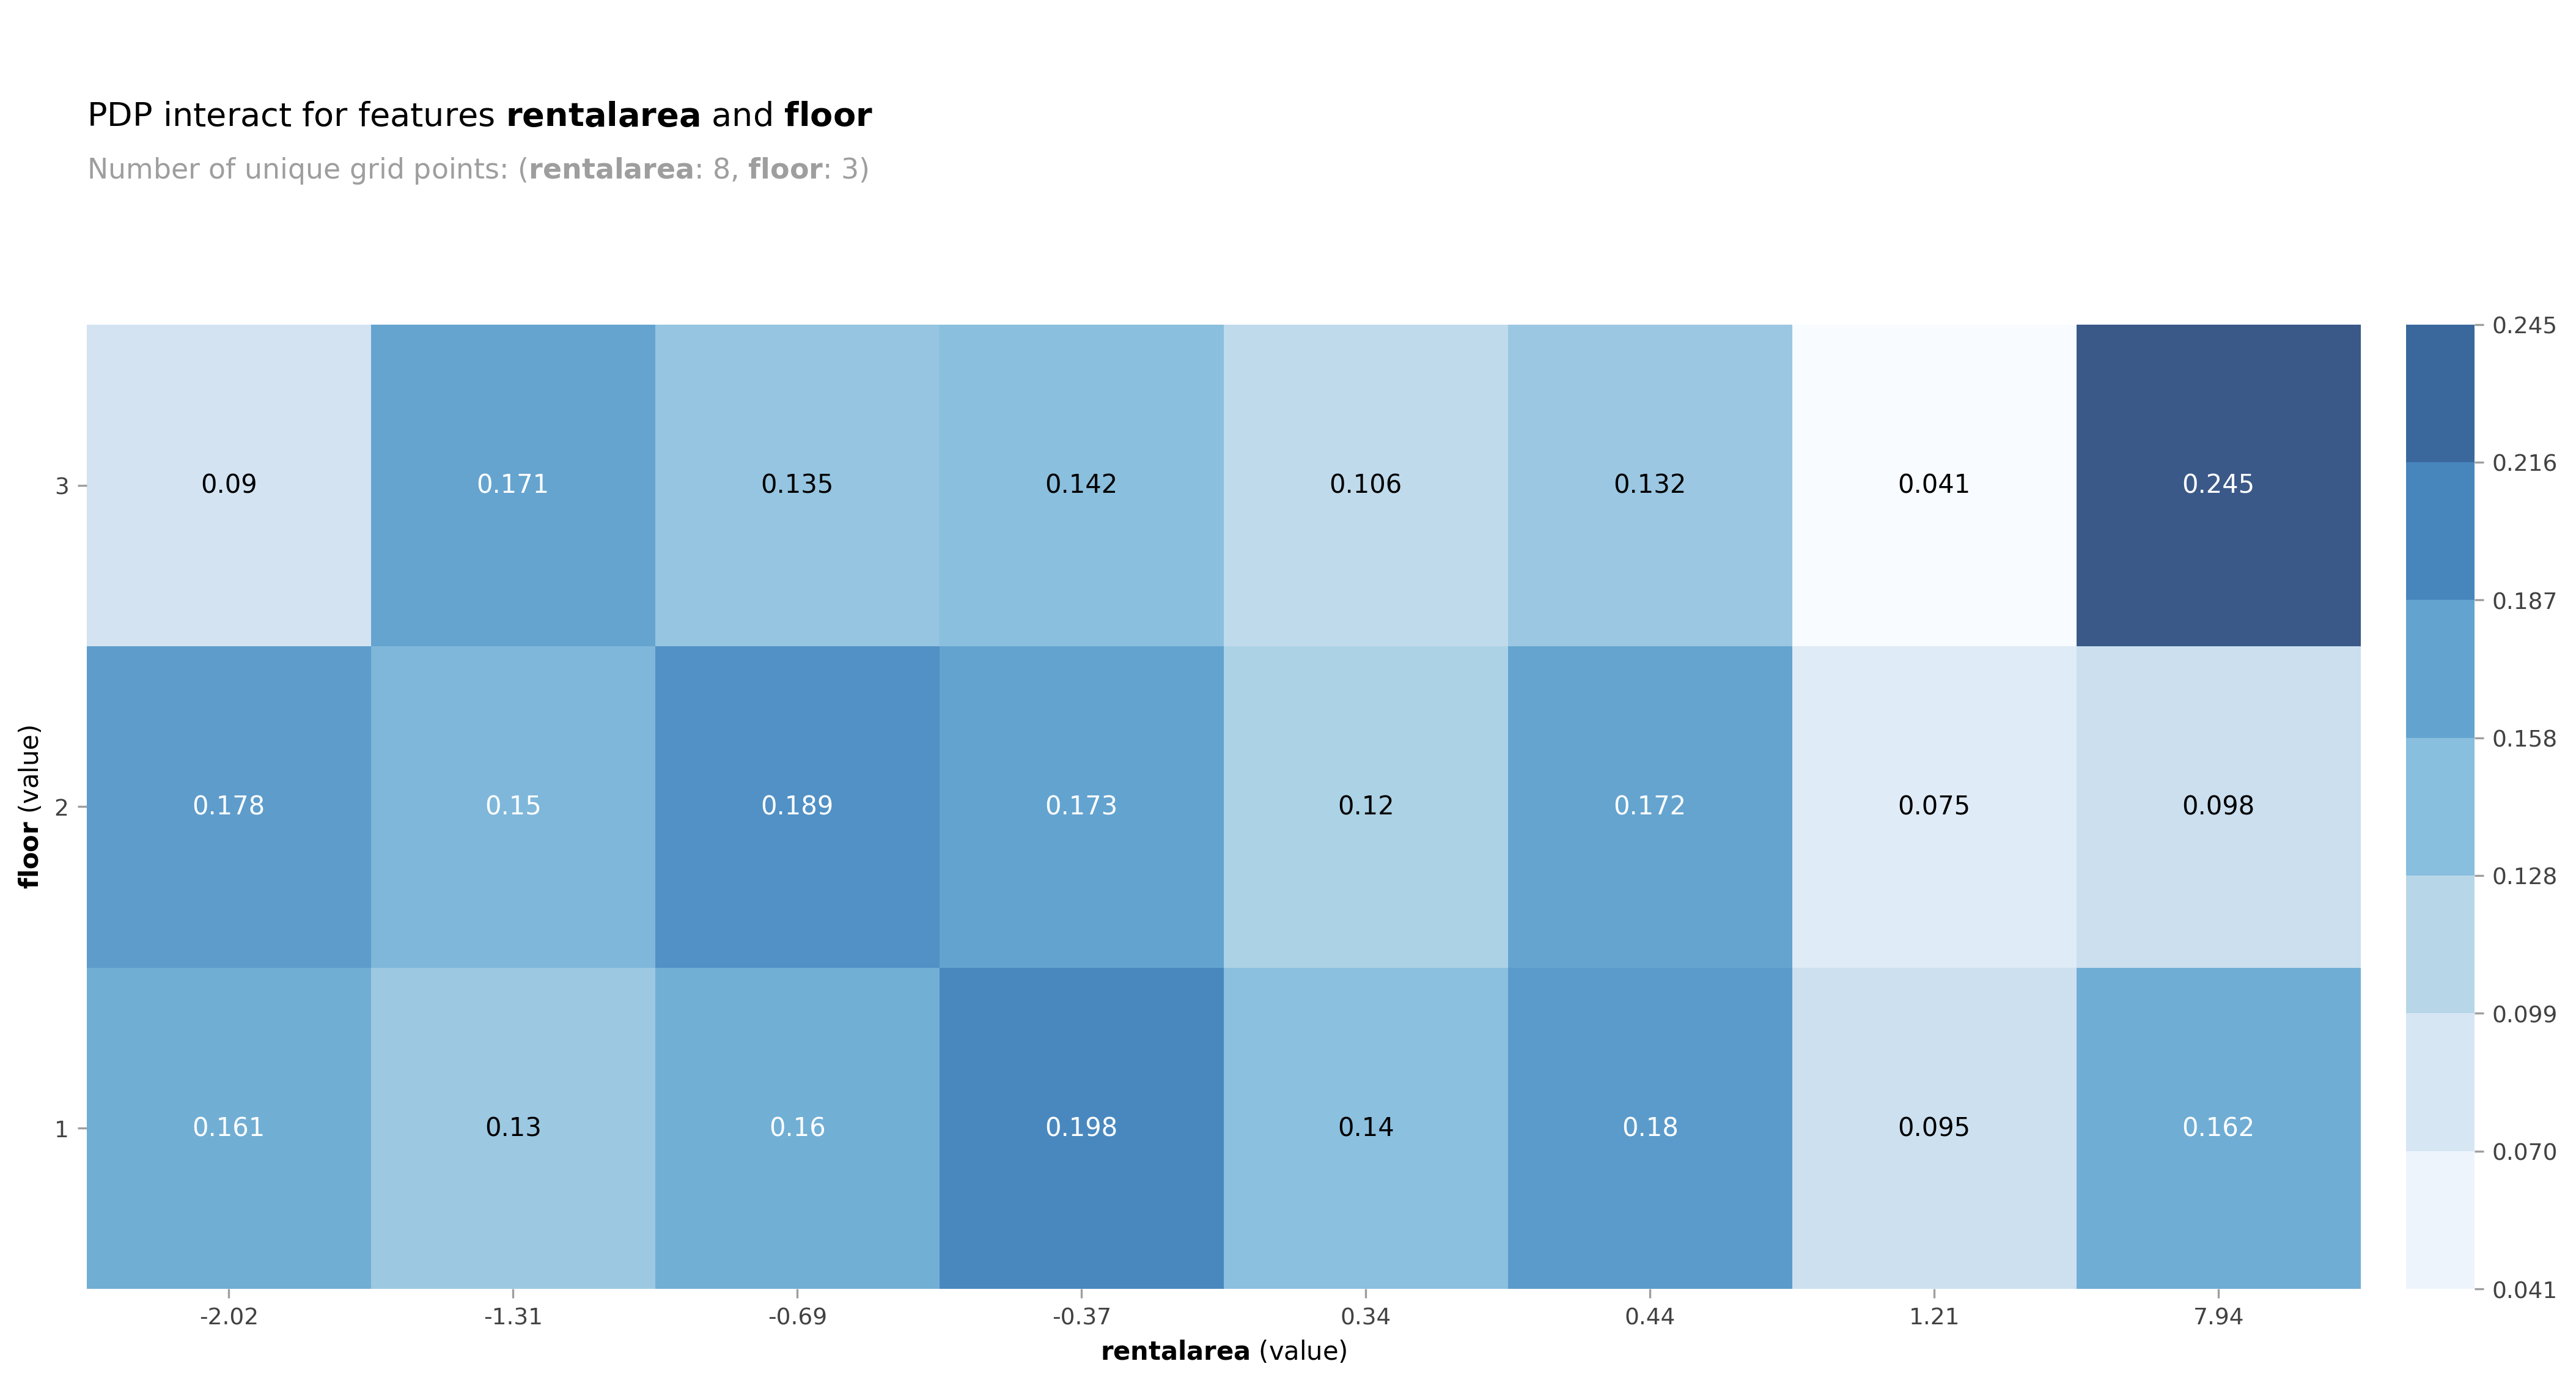

In [73]:
# 임대면적 & 층
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact5 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features5,
    feature_names=target_features5,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_Interact5.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')

obtain pred_func from the provided model.


  0%|          | 0/25 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/2 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/50 [00:00<?, ?it/s]

(<Figure size 4800x2700 with 3 Axes>,
 {'title_axes': <Axes: >,
  'interact_axes': [<Axes: xlabel='$\\bf{borough}$ (value)', ylabel='$\\bf{buildinguse}$ (value)'>],
  'isolate_axes': [[None, None]]})

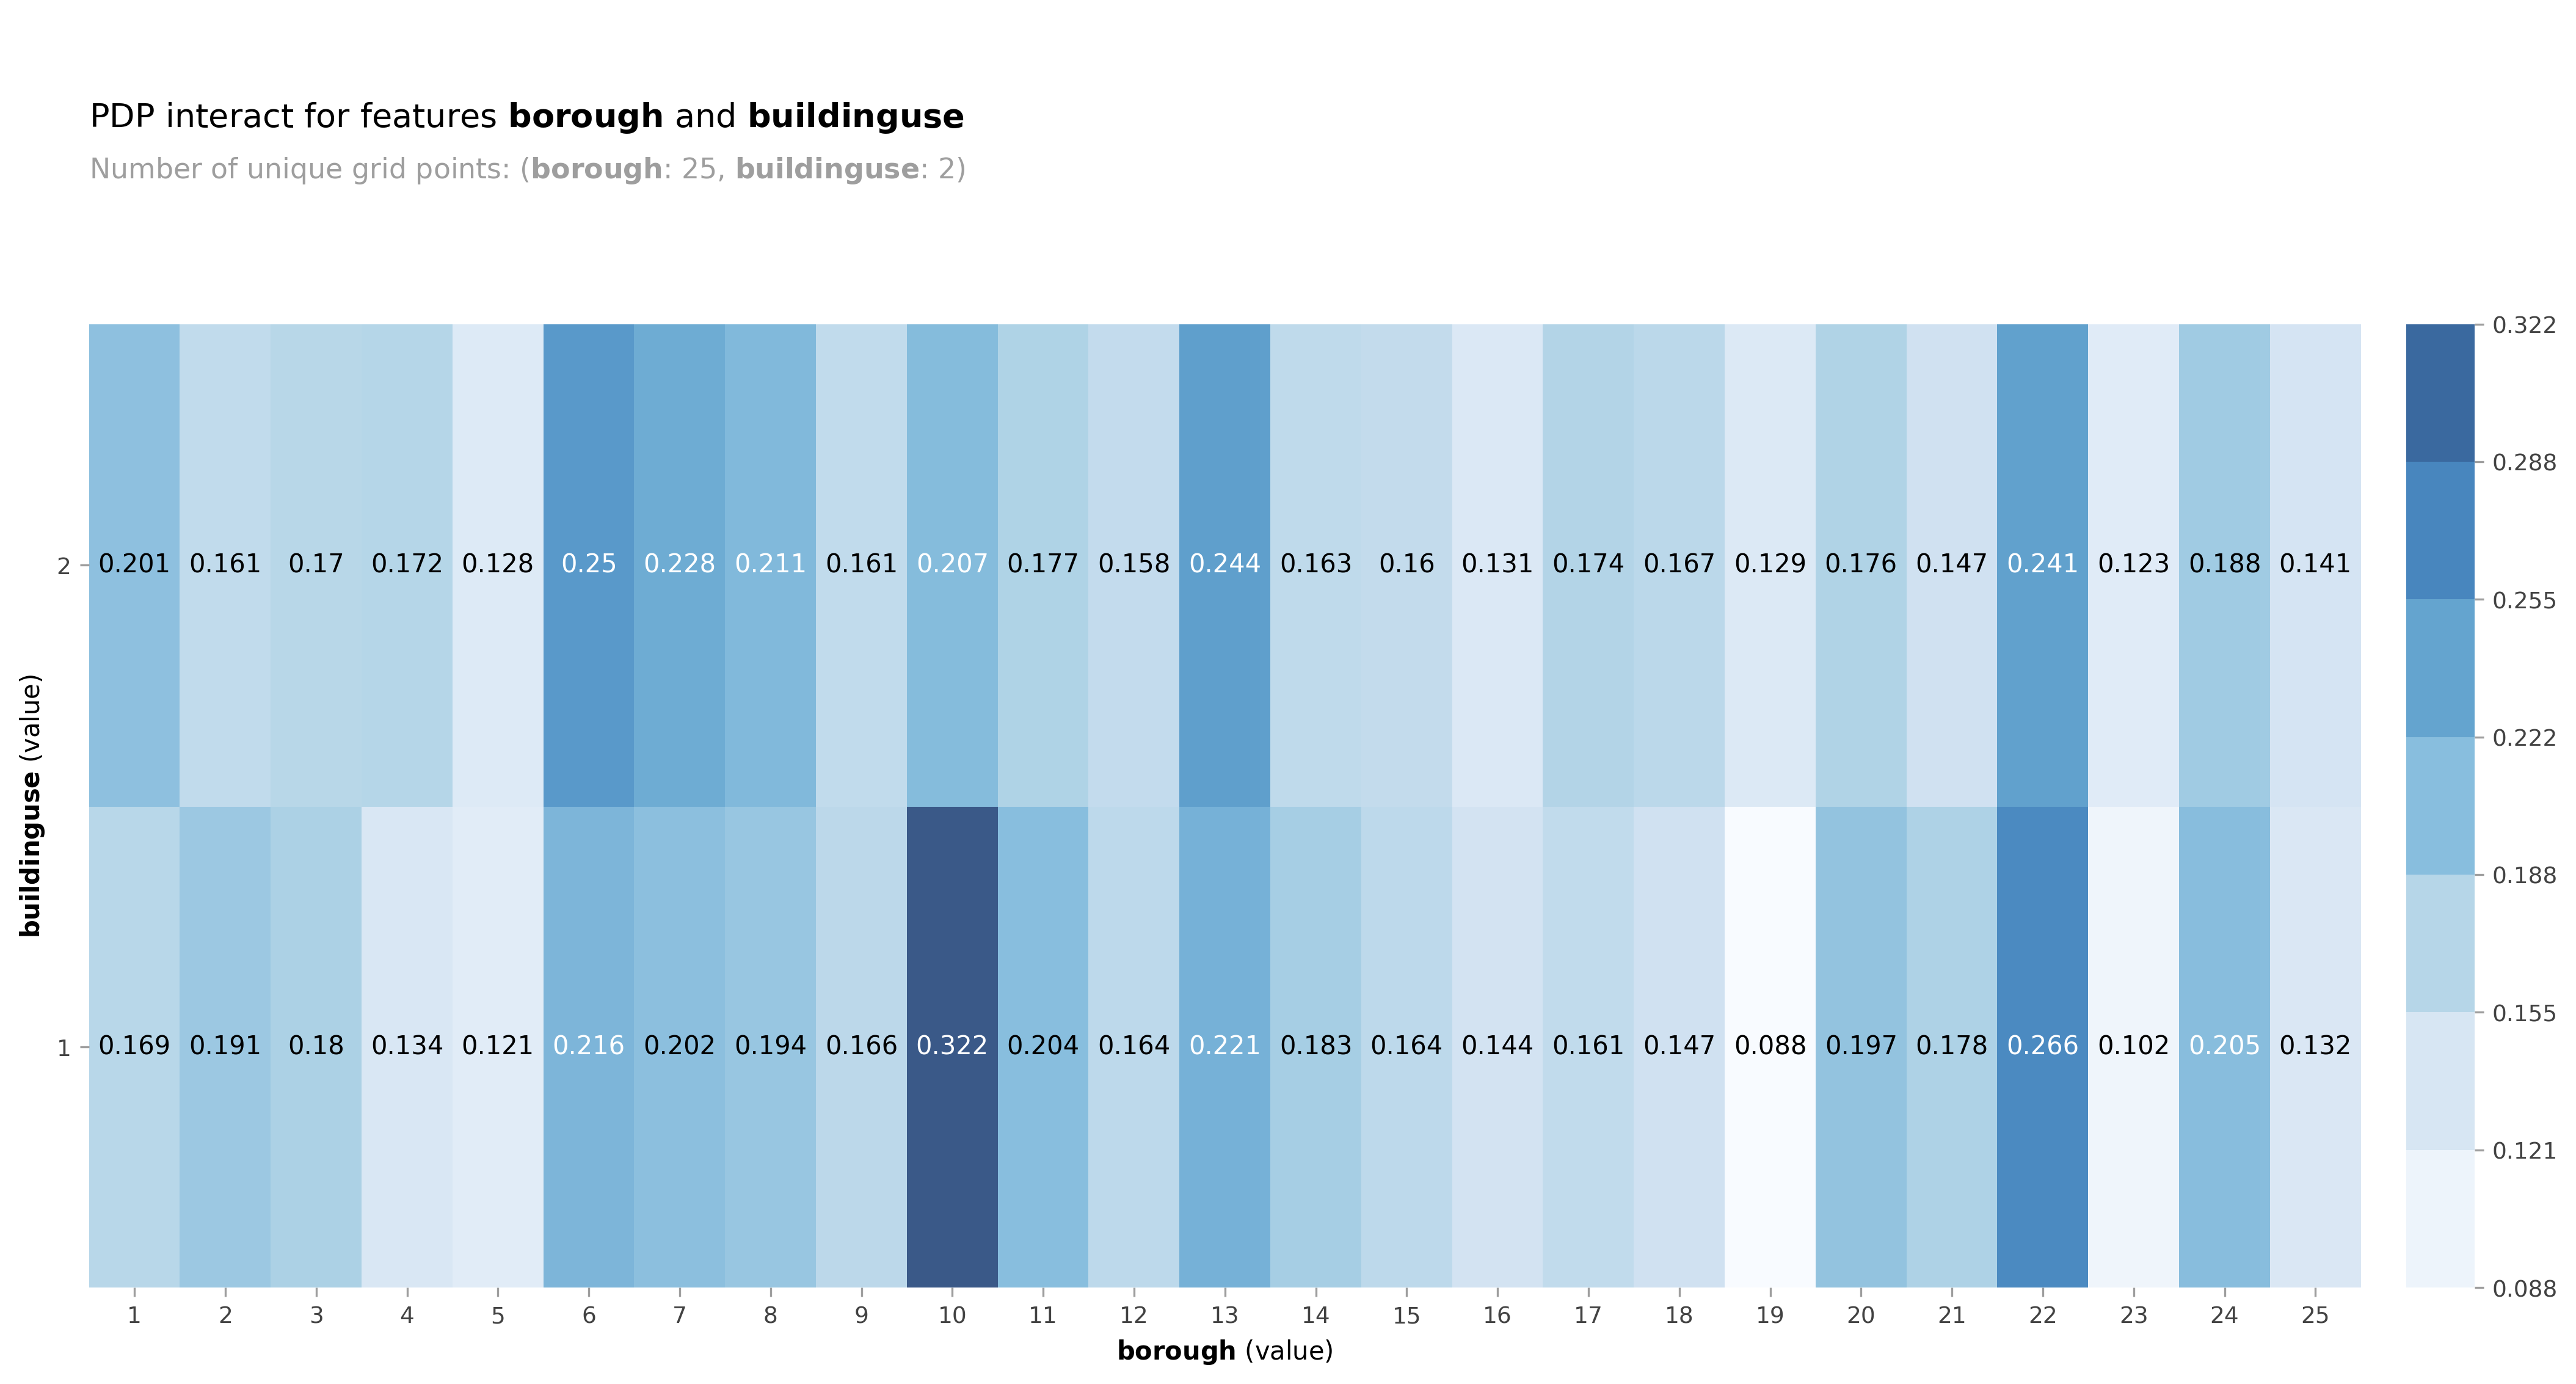

In [74]:
# 자치구명 & 건물용도
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact13 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features13,
    feature_names=target_features13,
    model=model,
    model_features=X_test_preprocessed_df.columns,
    cust_grid_points=[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],None
    ])
pdp_Interact13.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')

obtain pred_func from the provided model.


  0%|          | 0/25 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/3 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/75 [00:00<?, ?it/s]

(<Figure size 4800x2700 with 3 Axes>,
 {'title_axes': <Axes: >,
  'interact_axes': [<Axes: xlabel='$\\bf{borough}$ (value)', ylabel='$\\bf{floor}$ (value)'>],
  'isolate_axes': [[None, None]]})

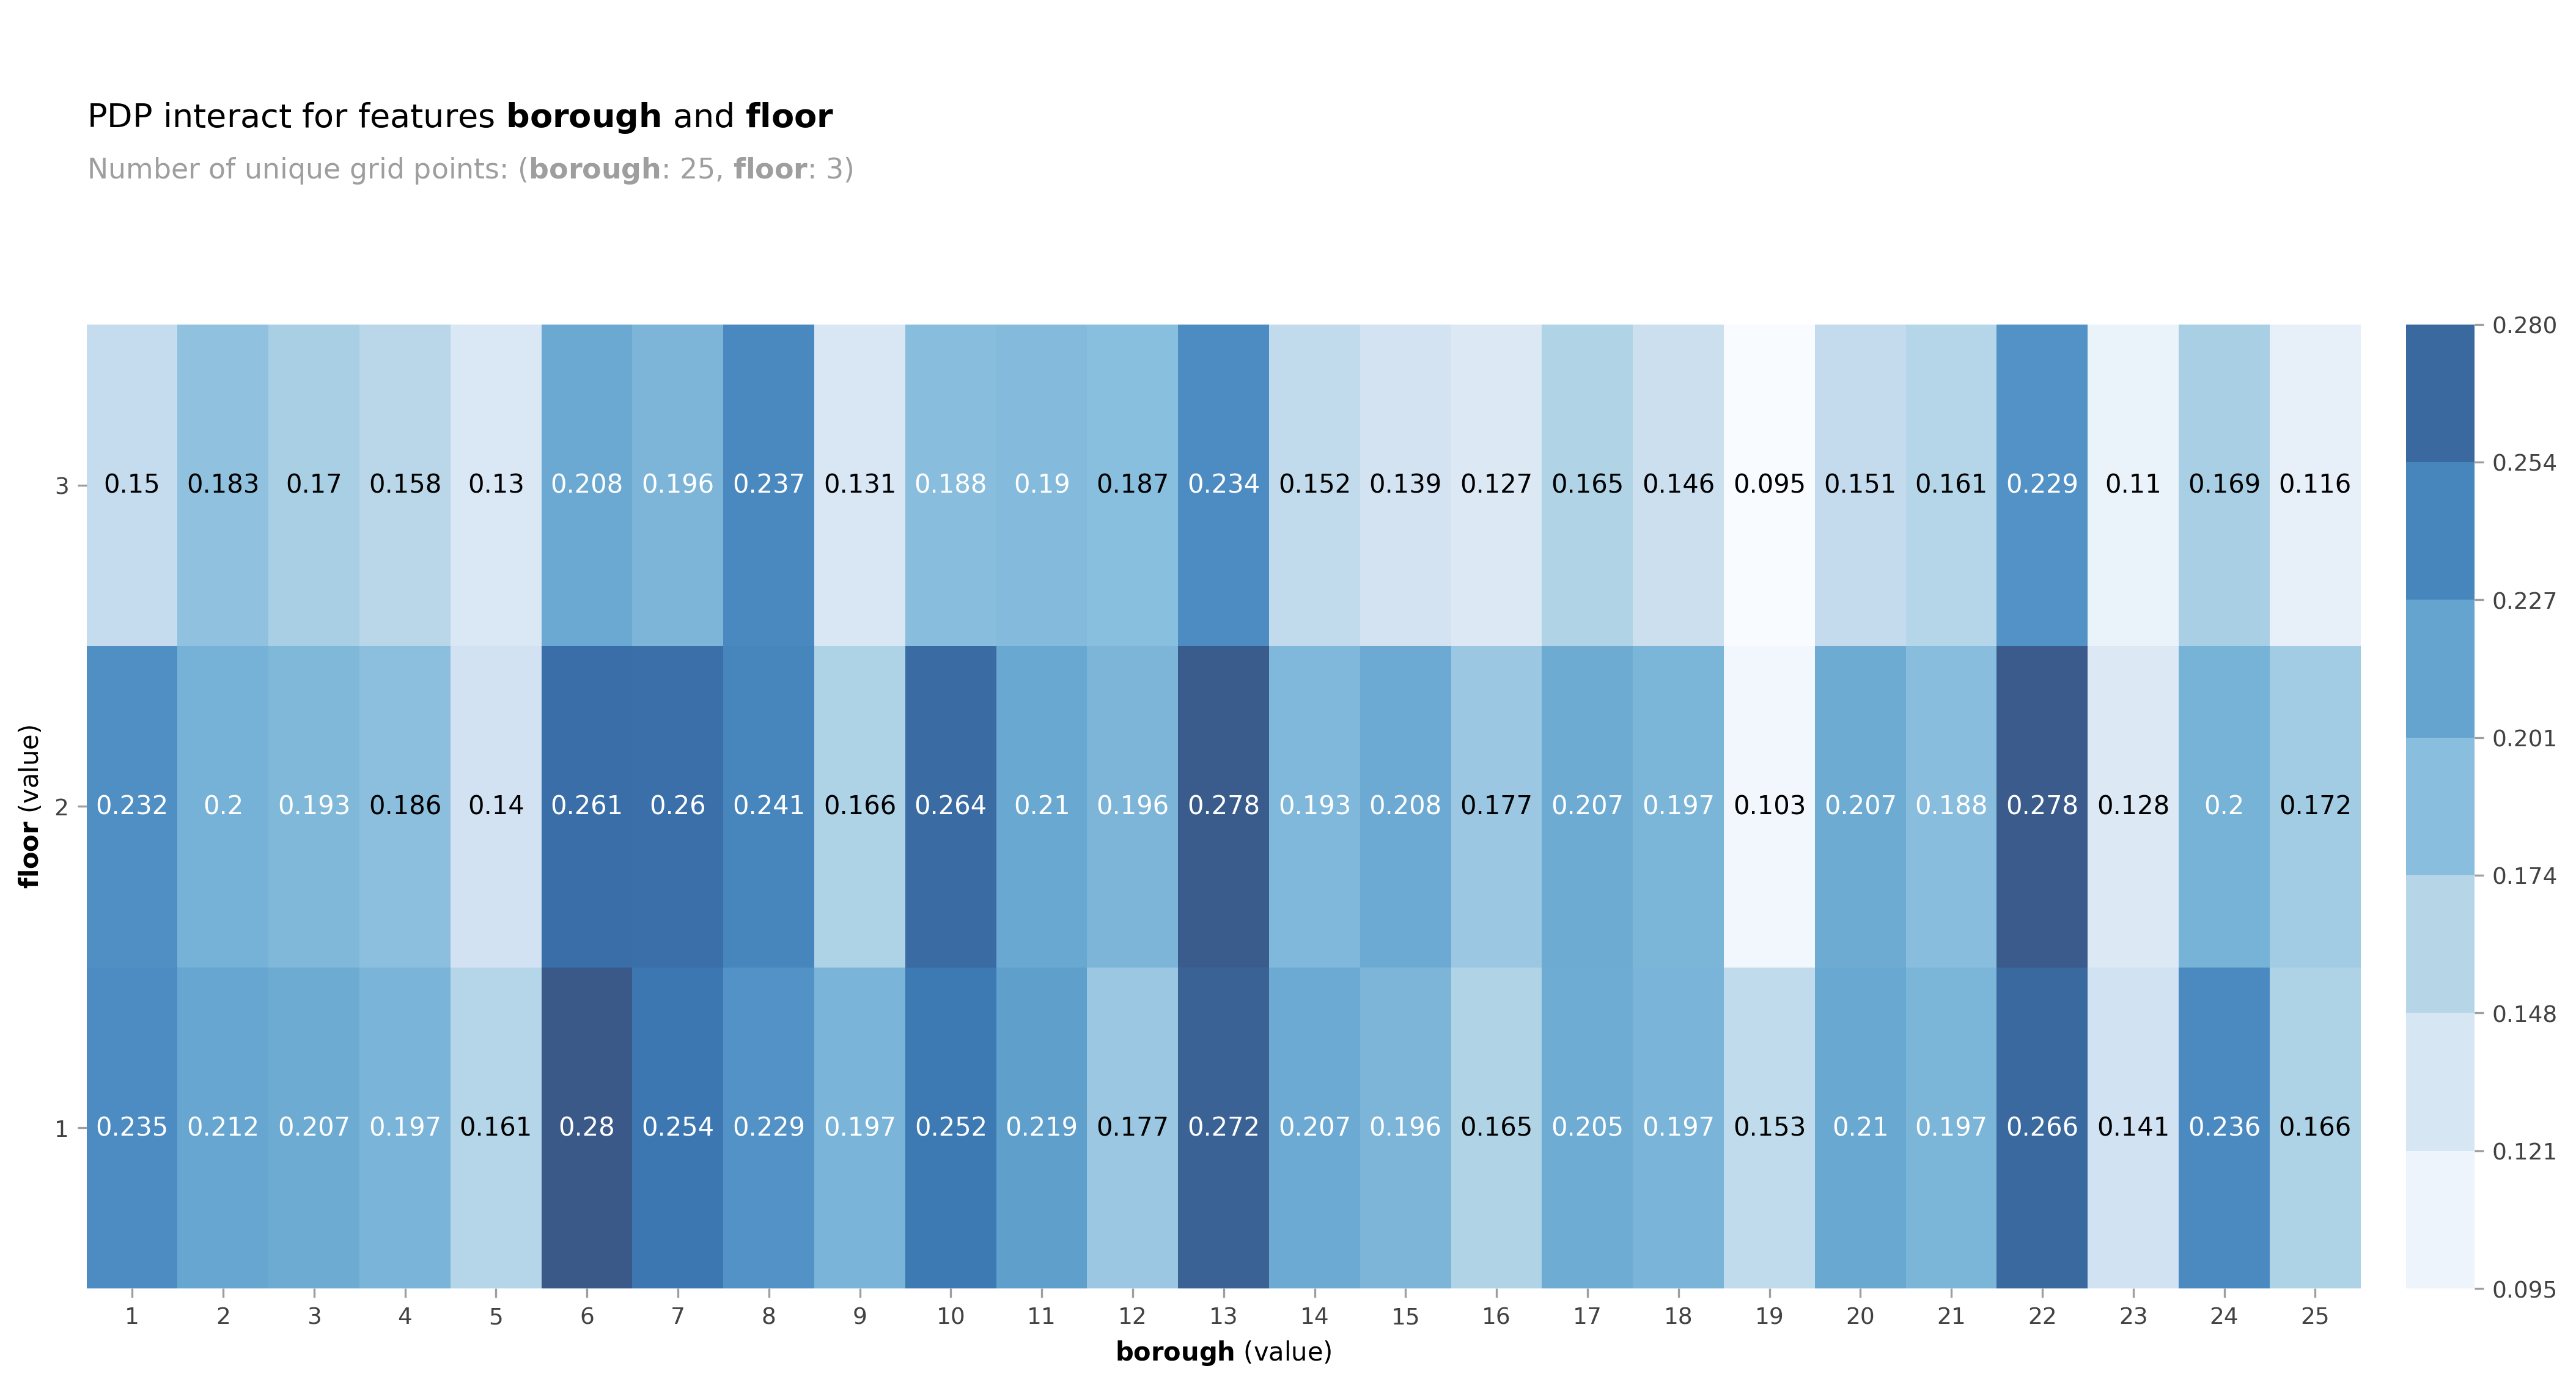

In [75]:
# 자치구명 & 층
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact14 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features14,
    feature_names=target_features14,
    model=model,
    model_features=X_test_preprocessed_df.columns,
    cust_grid_points=[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],None
    ])
pdp_Interact14.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')

obtain pred_func from the provided model.


  0%|          | 0/2 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/3 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/6 [00:00<?, ?it/s]

(<Figure size 4800x2700 with 3 Axes>,
 {'title_axes': <Axes: >,
  'interact_axes': [<Axes: xlabel='$\\bf{buildinguse}$ (value)', ylabel='$\\bf{floor}$ (value)'>],
  'isolate_axes': [[None, None]]})

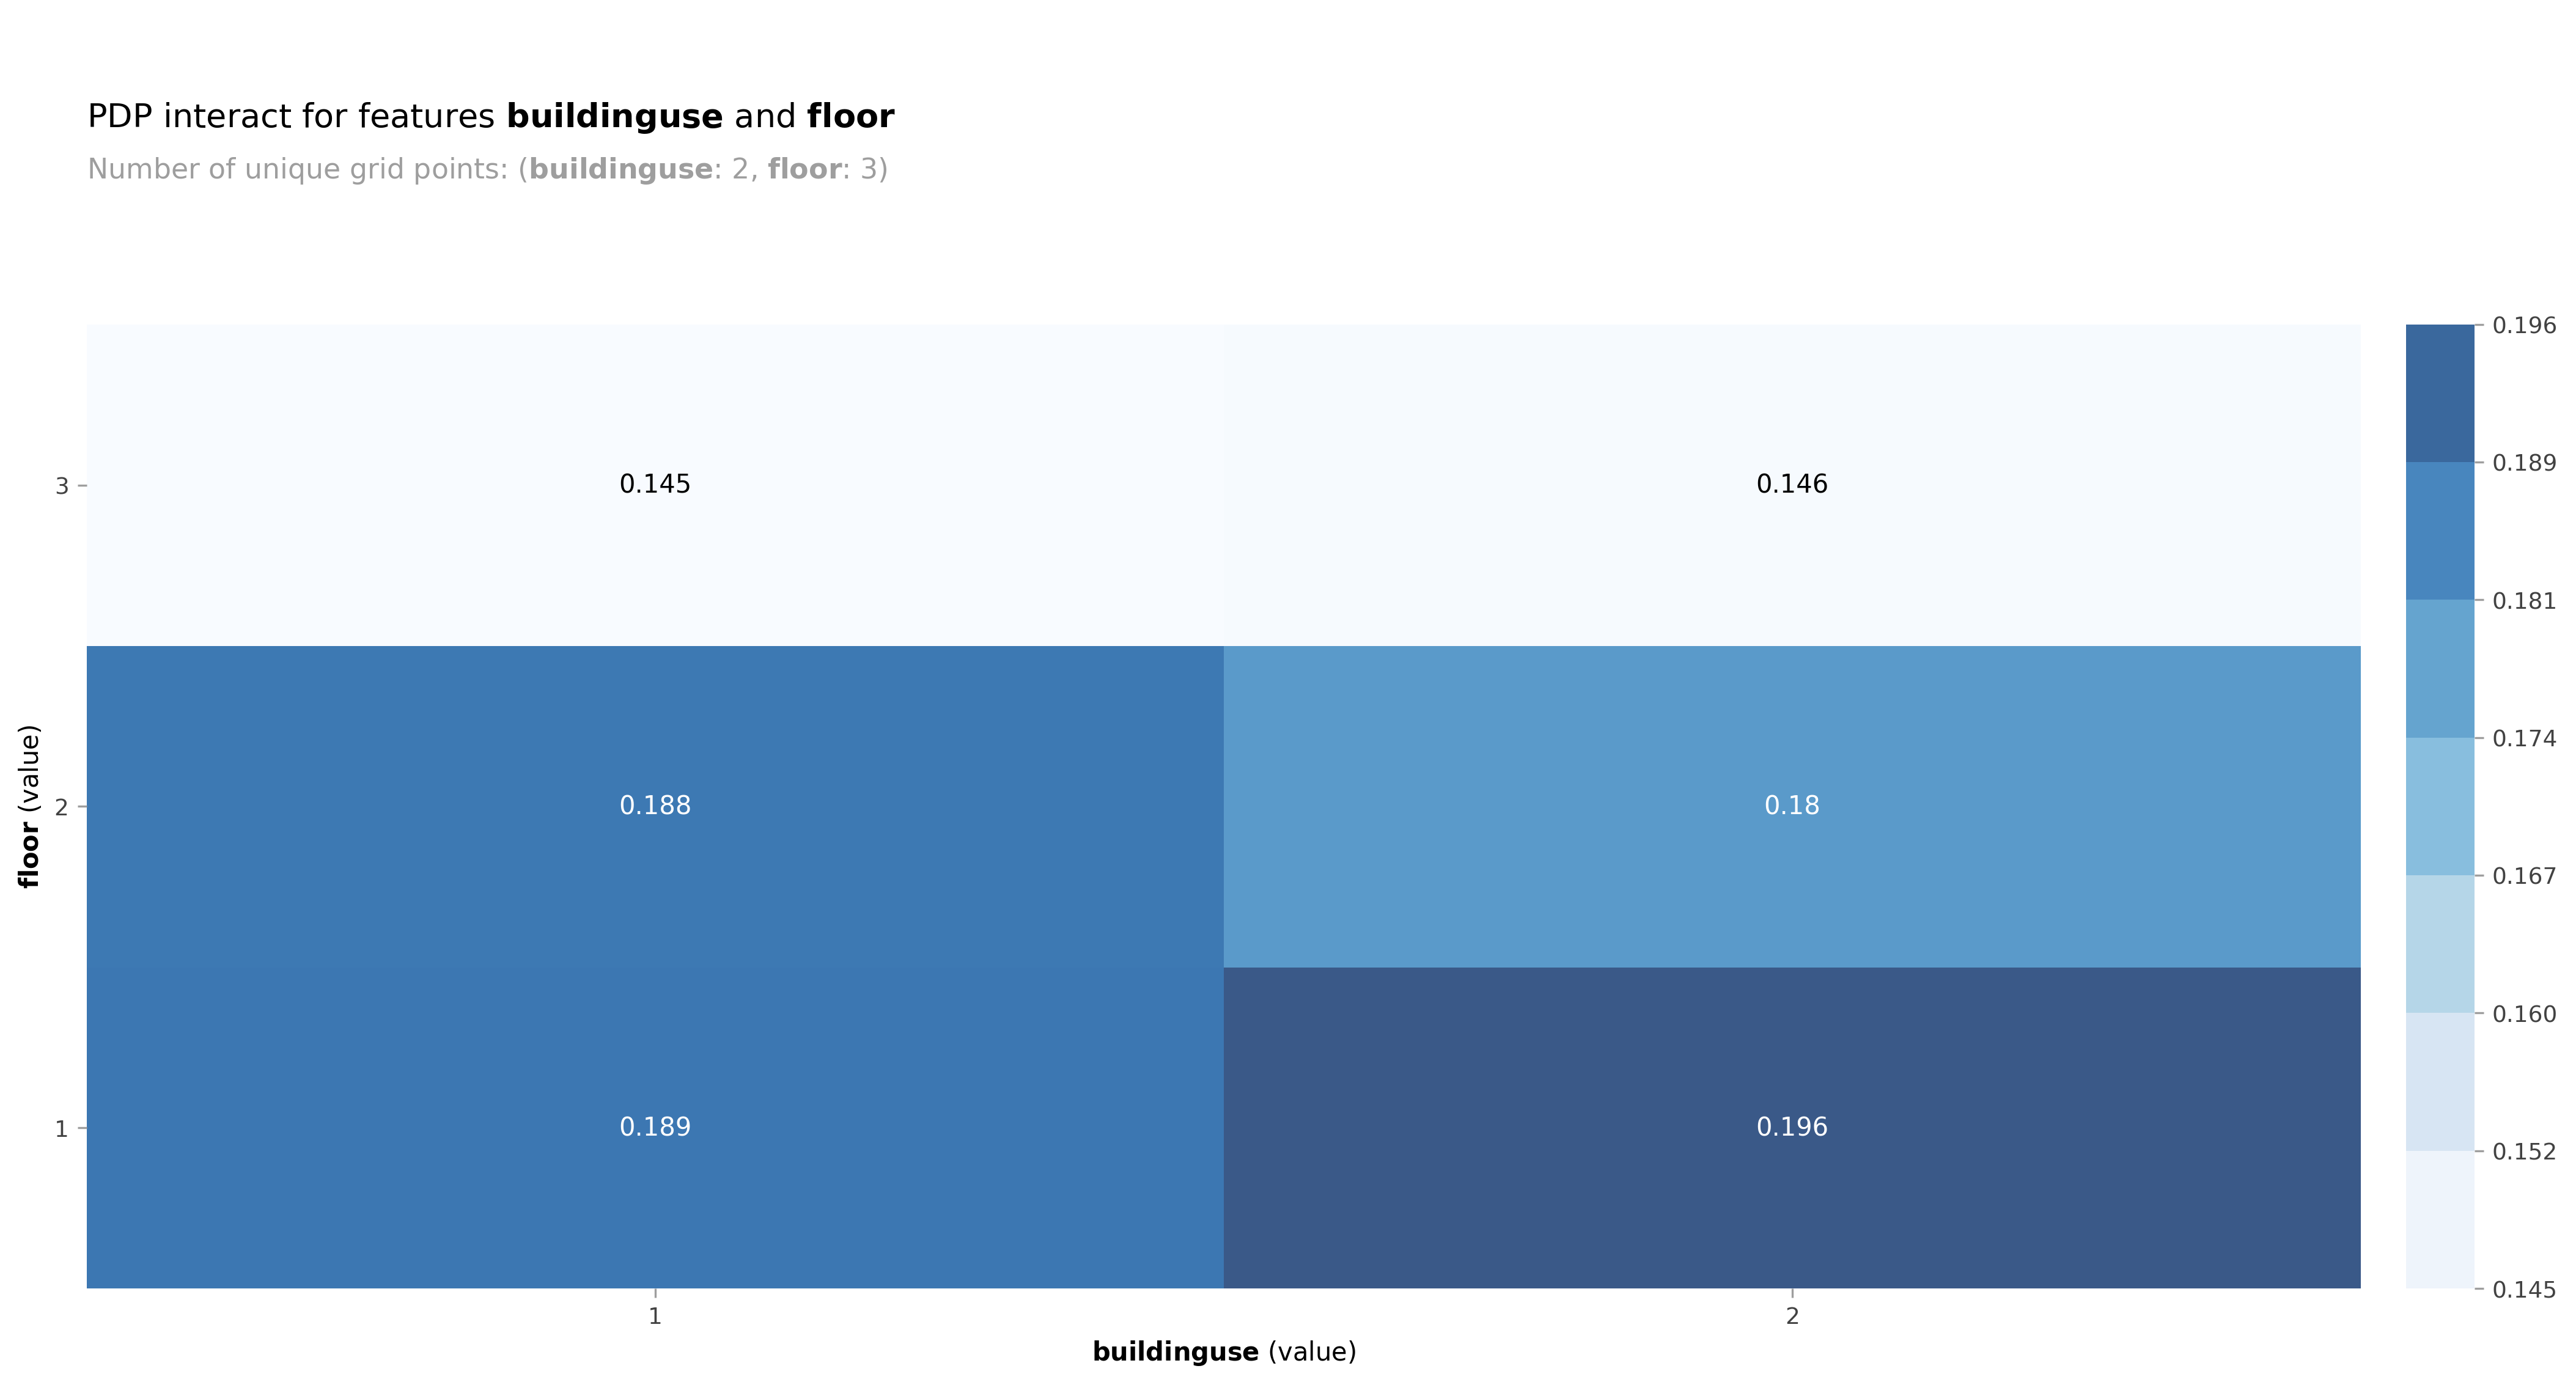

In [76]:
# 건물용도 & 층
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact15 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features15,
    feature_names=target_features15,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_Interact15.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')

In [77]:
'''# 임대면적 & 계약년월
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact1 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features1,
    feature_names=target_features1,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_Interact1.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')'''

"# 임대면적 & 계약년월\nX_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)\npdp_Interact1 = PDPInteract(\n    df=X_test_preprocessed_df,\n    features=target_features1,\n    feature_names=target_features1,\n    model=model,\n    model_features=X_test_preprocessed_df.columns)\npdp_Interact1.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')"

In [78]:
'''# 임대면적 & 건축년도
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact2 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features2,
    feature_names=target_features2,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_Interact2.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')'''

"# 임대면적 & 건축년도\nX_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)\npdp_Interact2 = PDPInteract(\n    df=X_test_preprocessed_df,\n    features=target_features2,\n    feature_names=target_features2,\n    model=model,\n    model_features=X_test_preprocessed_df.columns)\npdp_Interact2.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')"

In [79]:
'''# 계약년월 & 건축년도
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact6 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features6,
    feature_names=target_features6,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_Interact6.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')'''

"# 계약년월 & 건축년도\nX_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)\npdp_Interact6 = PDPInteract(\n    df=X_test_preprocessed_df,\n    features=target_features6,\n    feature_names=target_features6,\n    model=model,\n    model_features=X_test_preprocessed_df.columns)\npdp_Interact6.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')"

In [80]:
'''# 계약년월 & 자치구명
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact7 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features7,
    feature_names=target_features7,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_Interact7.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')'''

"# 계약년월 & 자치구명\nX_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)\npdp_Interact7 = PDPInteract(\n    df=X_test_preprocessed_df,\n    features=target_features7,\n    feature_names=target_features7,\n    model=model,\n    model_features=X_test_preprocessed_df.columns)\npdp_Interact7.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')"

In [81]:
'''# 계약년월 & 건물용도
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact8 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features8,
    feature_names=target_features8,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_Interact8.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')'''

"# 계약년월 & 건물용도\nX_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)\npdp_Interact8 = PDPInteract(\n    df=X_test_preprocessed_df,\n    features=target_features8,\n    feature_names=target_features8,\n    model=model,\n    model_features=X_test_preprocessed_df.columns)\npdp_Interact8.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')"

In [82]:
'''# 계약년월 & 층
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact9 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features9,
    feature_names=target_features9,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_Interact9.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')'''

"# 계약년월 & 층\nX_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)\npdp_Interact9 = PDPInteract(\n    df=X_test_preprocessed_df,\n    features=target_features9,\n    feature_names=target_features9,\n    model=model,\n    model_features=X_test_preprocessed_df.columns)\npdp_Interact9.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')"

In [83]:
'''# 건축년도 & 자치구명
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact10 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features10,
    feature_names=target_features10,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_Interact10.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')'''

"# 건축년도 & 자치구명\nX_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)\npdp_Interact10 = PDPInteract(\n    df=X_test_preprocessed_df,\n    features=target_features10,\n    feature_names=target_features10,\n    model=model,\n    model_features=X_test_preprocessed_df.columns)\npdp_Interact10.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')"

In [84]:
'''# 건축년도 & 건물용도
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact11 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features11,
    feature_names=target_features11,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_Interact11.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')'''

"# 건축년도 & 건물용도\nX_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)\npdp_Interact11 = PDPInteract(\n    df=X_test_preprocessed_df,\n    features=target_features11,\n    feature_names=target_features11,\n    model=model,\n    model_features=X_test_preprocessed_df.columns)\npdp_Interact11.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')"

In [85]:
'''# 건축년도 & 층
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)
pdp_Interact12 = PDPInteract(
    df=X_test_preprocessed_df,
    features=target_features12,
    feature_names=target_features12,
    model=model,
    model_features=X_test_preprocessed_df.columns)
pdp_Interact12.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')'''

"# 건축년도 & 층\nX_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns = X_test_encoded.columns)\npdp_Interact12 = PDPInteract(\n    df=X_test_preprocessed_df,\n    features=target_features12,\n    feature_names=target_features12,\n    model=model,\n    model_features=X_test_preprocessed_df.columns)\npdp_Interact12.plot(engine='matplotlib', plot_type='grid', to_bins = 'True')"

##### PDP isolate 추가

([<matplotlib.axis.XTick at 0x7fa374eabc10>,
 [Text(1, 0, '2020.08'),
  Text(2, 0, '2014.12'),
  Text(3, 0, '2017.08'),
  Text(4, 0, '2014.03'),
  Text(5, 0, '2022.06'),
  Text(6, 0, '2017.02'),
  Text(7, 0, '2015.03'),
  Text(8, 0, '2020.01'),
  Text(9, 0, '2021.12'),
  Text(10, 0, '2020.09'),
  Text(11, 0, '2014.11'),
  Text(12, 0, '2019.04'),
  Text(13, 0, '2021.07'),
  Text(14, 0, '2014.06'),
  Text(15, 0, '2018.08'),
  Text(16, 0, '2020.12'),
  Text(17, 0, '2013.03'),
  Text(18, 0, '2016.04'),
  Text(19, 0, '2013.01'),
  Text(20, 0, '2016.10'),
  Text(21, 0, '2019.01'),
  Text(22, 0, '2022.05'),
  Text(23, 0, '2022.02'),
  Text(24, 0, '2019.07'),
  Text(25, 0, '2018.01'),
  Text(26, 0, '2021.03'),
  Text(27, 0, '2013.06'),
  Text(28, 0, '2022.07'),
  Text(29, 0, '2014.04'),
  Text(30, 0, '2019.12'),
  Text(31, 0, '2015.12'),
  Text(32, 0, '2021.01'),
  Text(33, 0, '2021.05'),
  Text(34, 0, '2018.02'),
  Text(35, 0, '2014.07'),
  Text(36, 0, '2017.01'),
  Text(37, 0, '2016.02'),
  

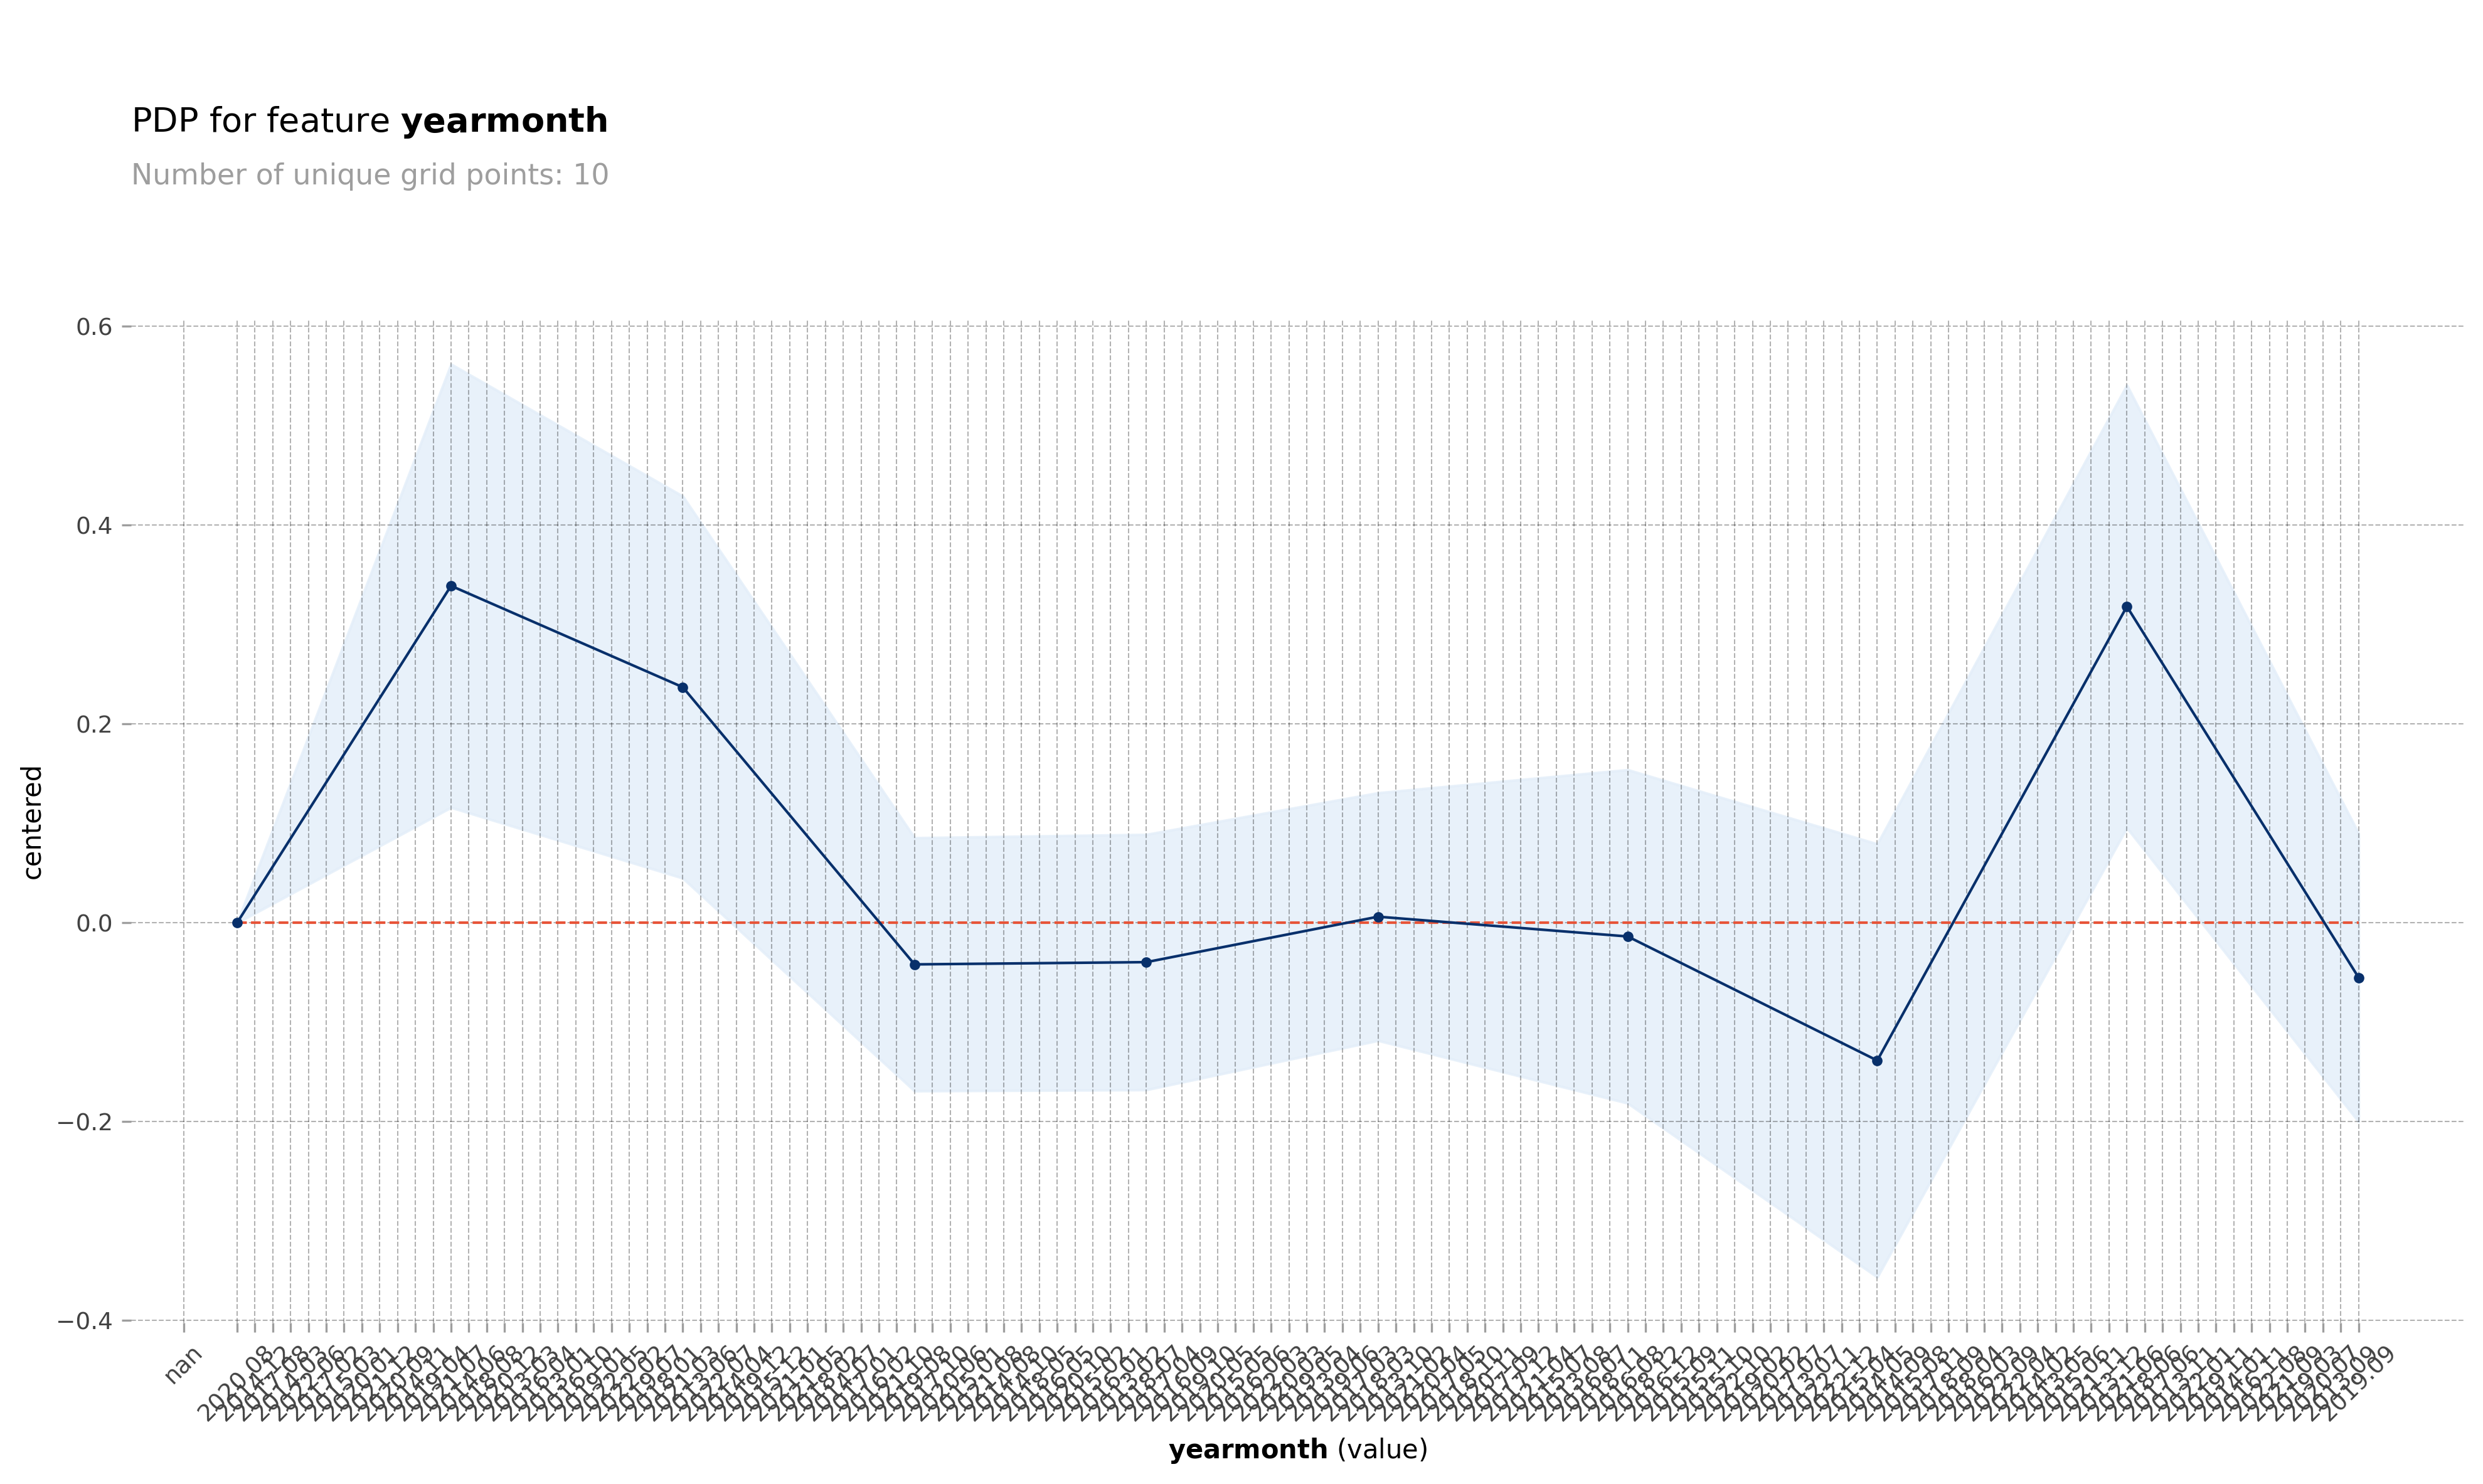

In [86]:
pdp_isolate22.plot(engine='matplotlib')
plt.xticks(encoded_features2, original_features2, rotation=45)

([<matplotlib.axis.XTick at 0x7fa38d623340>,
 [Text(1, 0, 'gangseo'),
  Text(2, 0, 'seocho'),
  Text(3, 0, 'yangcheon'),
  Text(4, 0, 'dobong'),
  Text(5, 0, 'songpa'),
  Text(6, 0, 'guro'),
  Text(7, 0, 'eunpyeong'),
  Text(8, 0, 'dongdaemungu'),
  Text(9, 0, 'gangnam'),
  Text(10, 0, 'seongbuk'),
  Text(11, 0, 'gangdong'),
  Text(12, 0, 'jung'),
  Text(13, 0, 'jungrang'),
  Text(14, 0, 'yeongdengpo'),
  Text(15, 0, 'mapo'),
  Text(16, 0, 'yongsan'),
  Text(17, 0, 'gwangjin'),
  Text(18, 0, 'nowon'),
  Text(19, 0, 'seongdong'),
  Text(20, 0, 'geumcheon'),
  Text(21, 0, 'dongjak'),
  Text(22, 0, 'gwanak'),
  Text(23, 0, 'jongro'),
  Text(24, 0, 'seodaemun'),
  Text(25, 0, 'gangbuk'),
  Text(-2, 0, 'nan')])

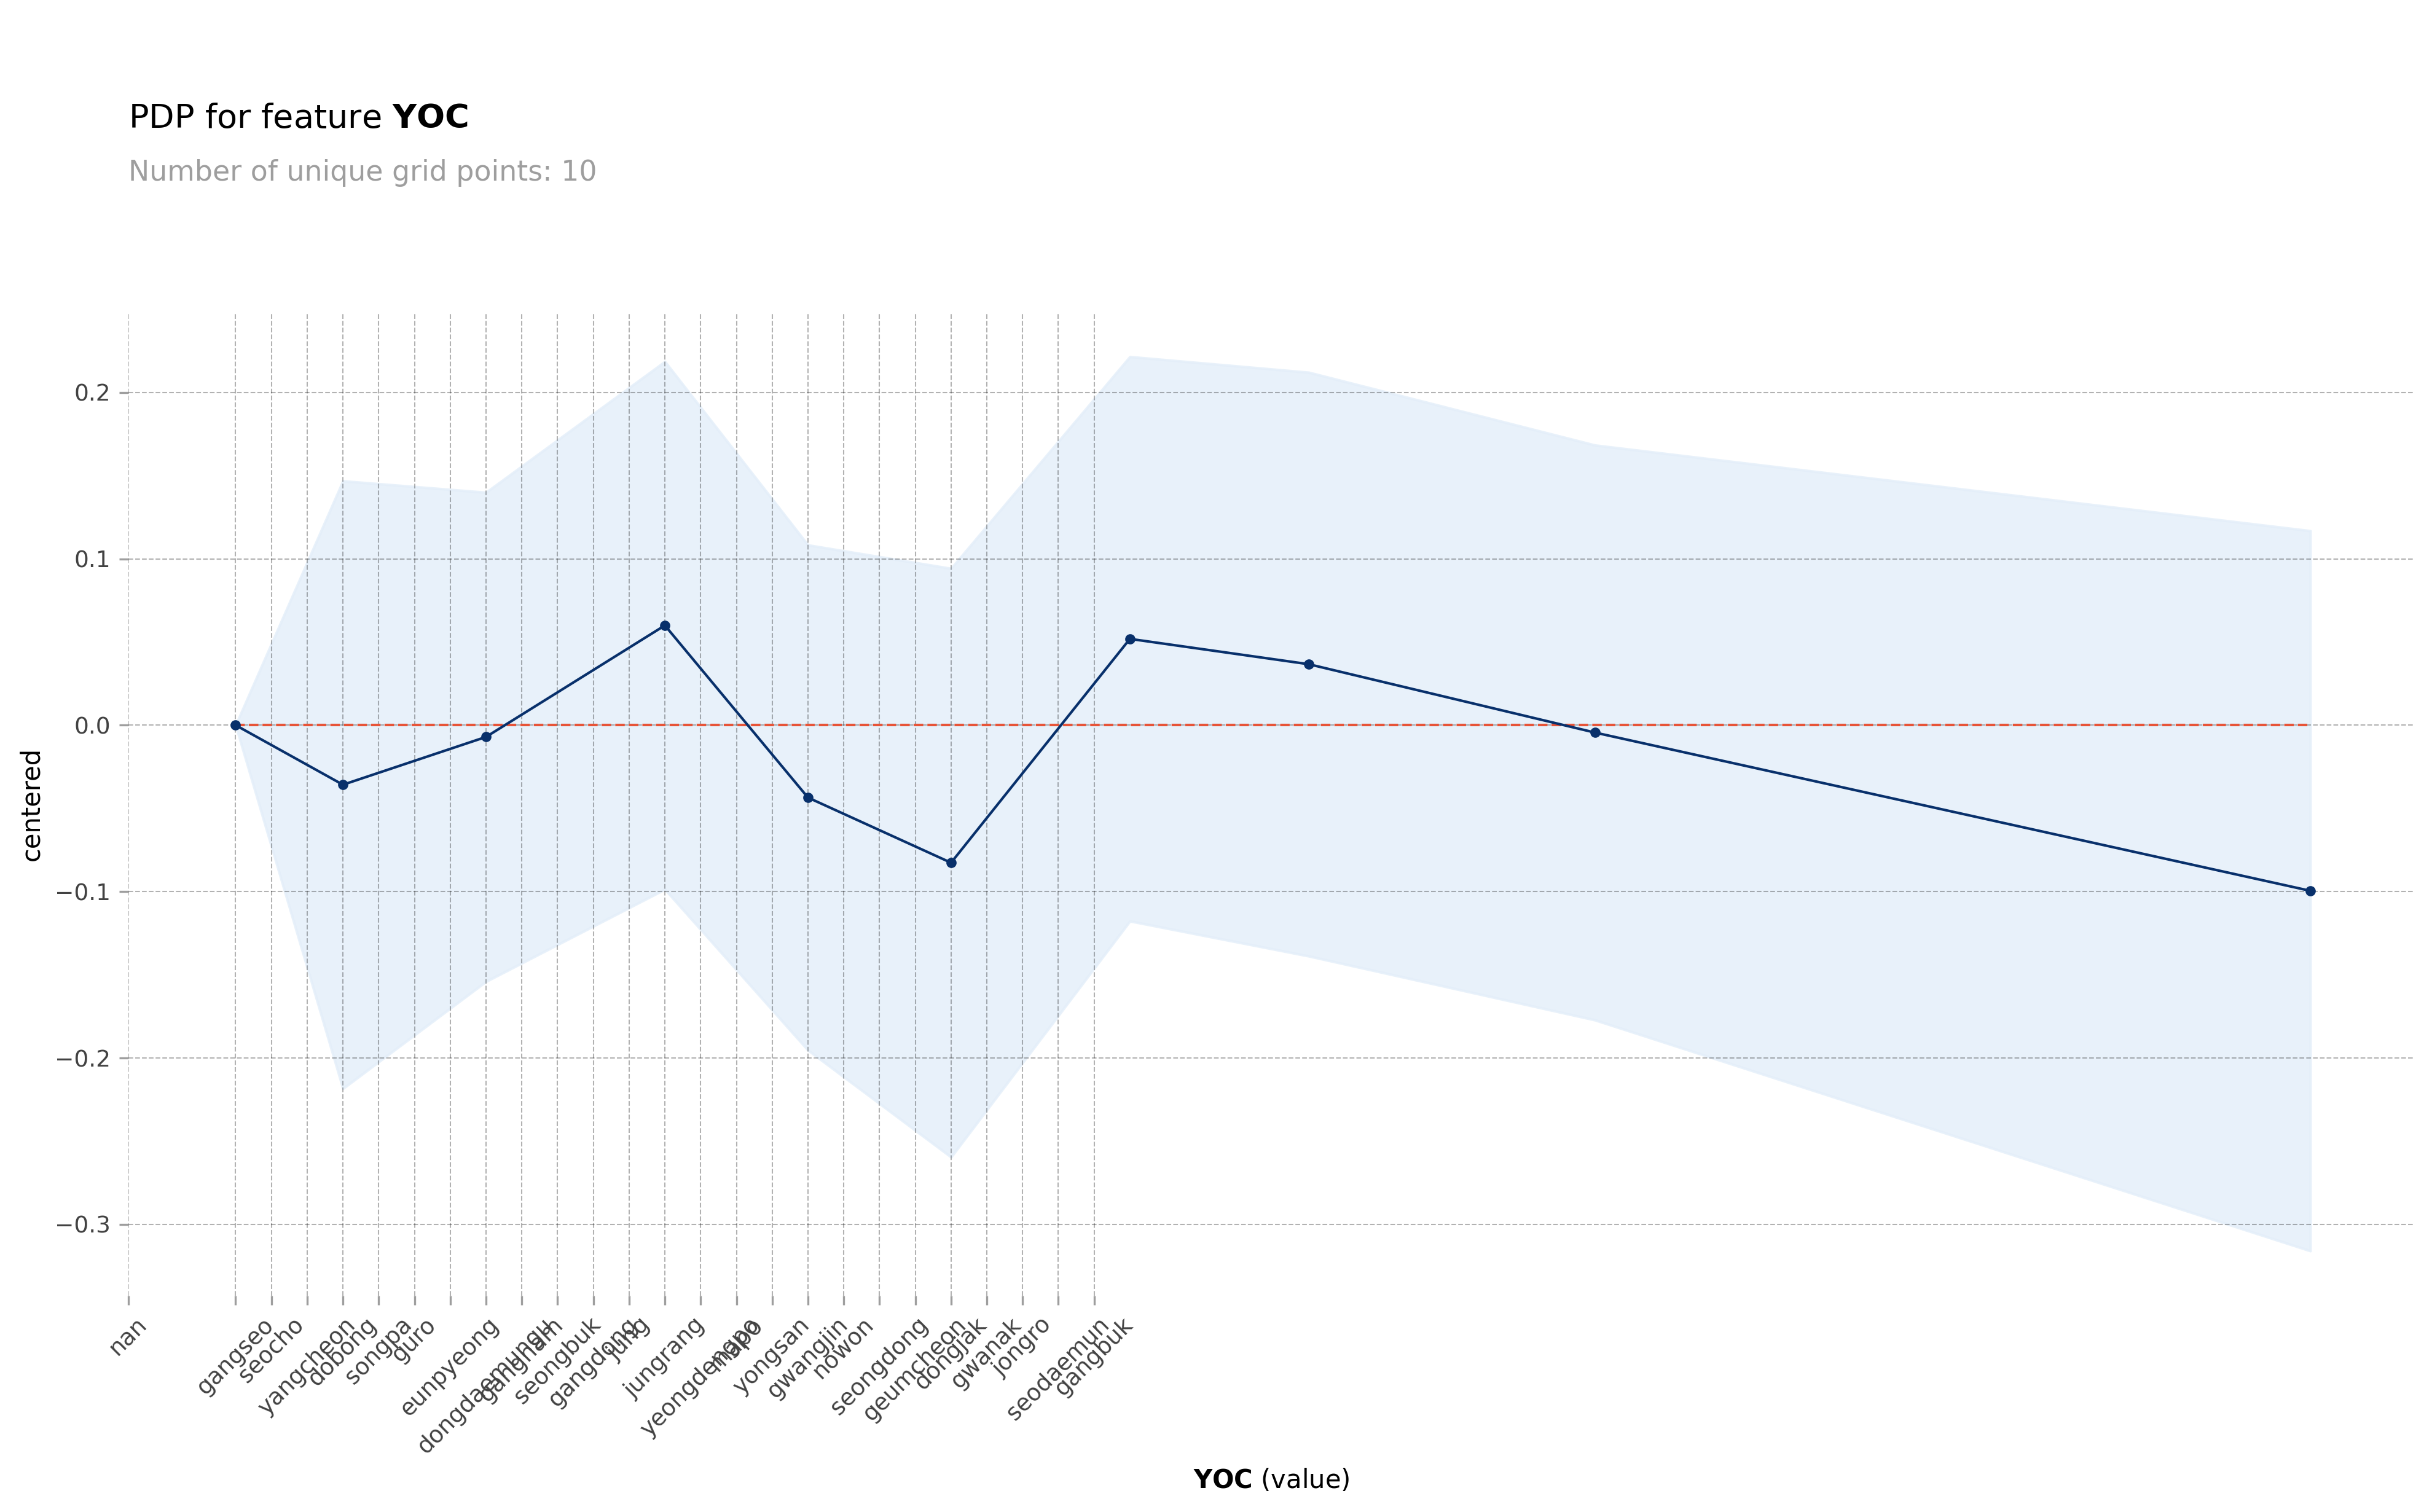

In [87]:
pdp_isolate33.plot(engine='matplotlib')
plt.xticks(encoded_features3, original_features3, rotation=45)

([<matplotlib.axis.XTick at 0x7fa37cde61a0>,
 [Text(1, 0, '2015.0'),
  Text(2, 0, '1988.0'),
  Text(3, 0, '2002.0'),
  Text(4, 0, '1992.0'),
  Text(5, 0, '2016.0'),
  Text(6, 0, '1999.0'),
  Text(7, 0, '2010.0'),
  Text(8, 0, '2013.0'),
  Text(9, 0, '1997.0'),
  Text(10, 0, '1984.0'),
  Text(11, 0, '1994.0'),
  Text(12, 0, '2003.0'),
  Text(13, 0, '2020.0'),
  Text(14, 0, '2004.0'),
  Text(15, 0, '1993.0'),
  Text(16, 0, '2018.0'),
  Text(17, 0, '1995.0'),
  Text(18, 0, '2001.0'),
  Text(19, 0, '1996.0'),
  Text(20, 0, '1987.0'),
  Text(21, 0, '1986.0'),
  Text(22, 0, '1990.0'),
  Text(23, 0, '1998.0'),
  Text(24, 0, '2000.0'),
  Text(25, 0, '2008.0'),
  Text(26, 0, '2019.0'),
  Text(27, 0, '1982.0'),
  Text(28, 0, '1989.0'),
  Text(29, 0, '2014.0'),
  Text(30, 0, '2011.0'),
  Text(31, 0, '2017.0'),
  Text(32, 0, '1977.0'),
  Text(33, 0, '2009.0'),
  Text(34, 0, '1983.0'),
  Text(35, 0, '1985.0'),
  Text(36, 0, '2005.0'),
  Text(37, 0, '1976.0'),
  Text(38, 0, '1991.0'),
  Text(39, 0, 

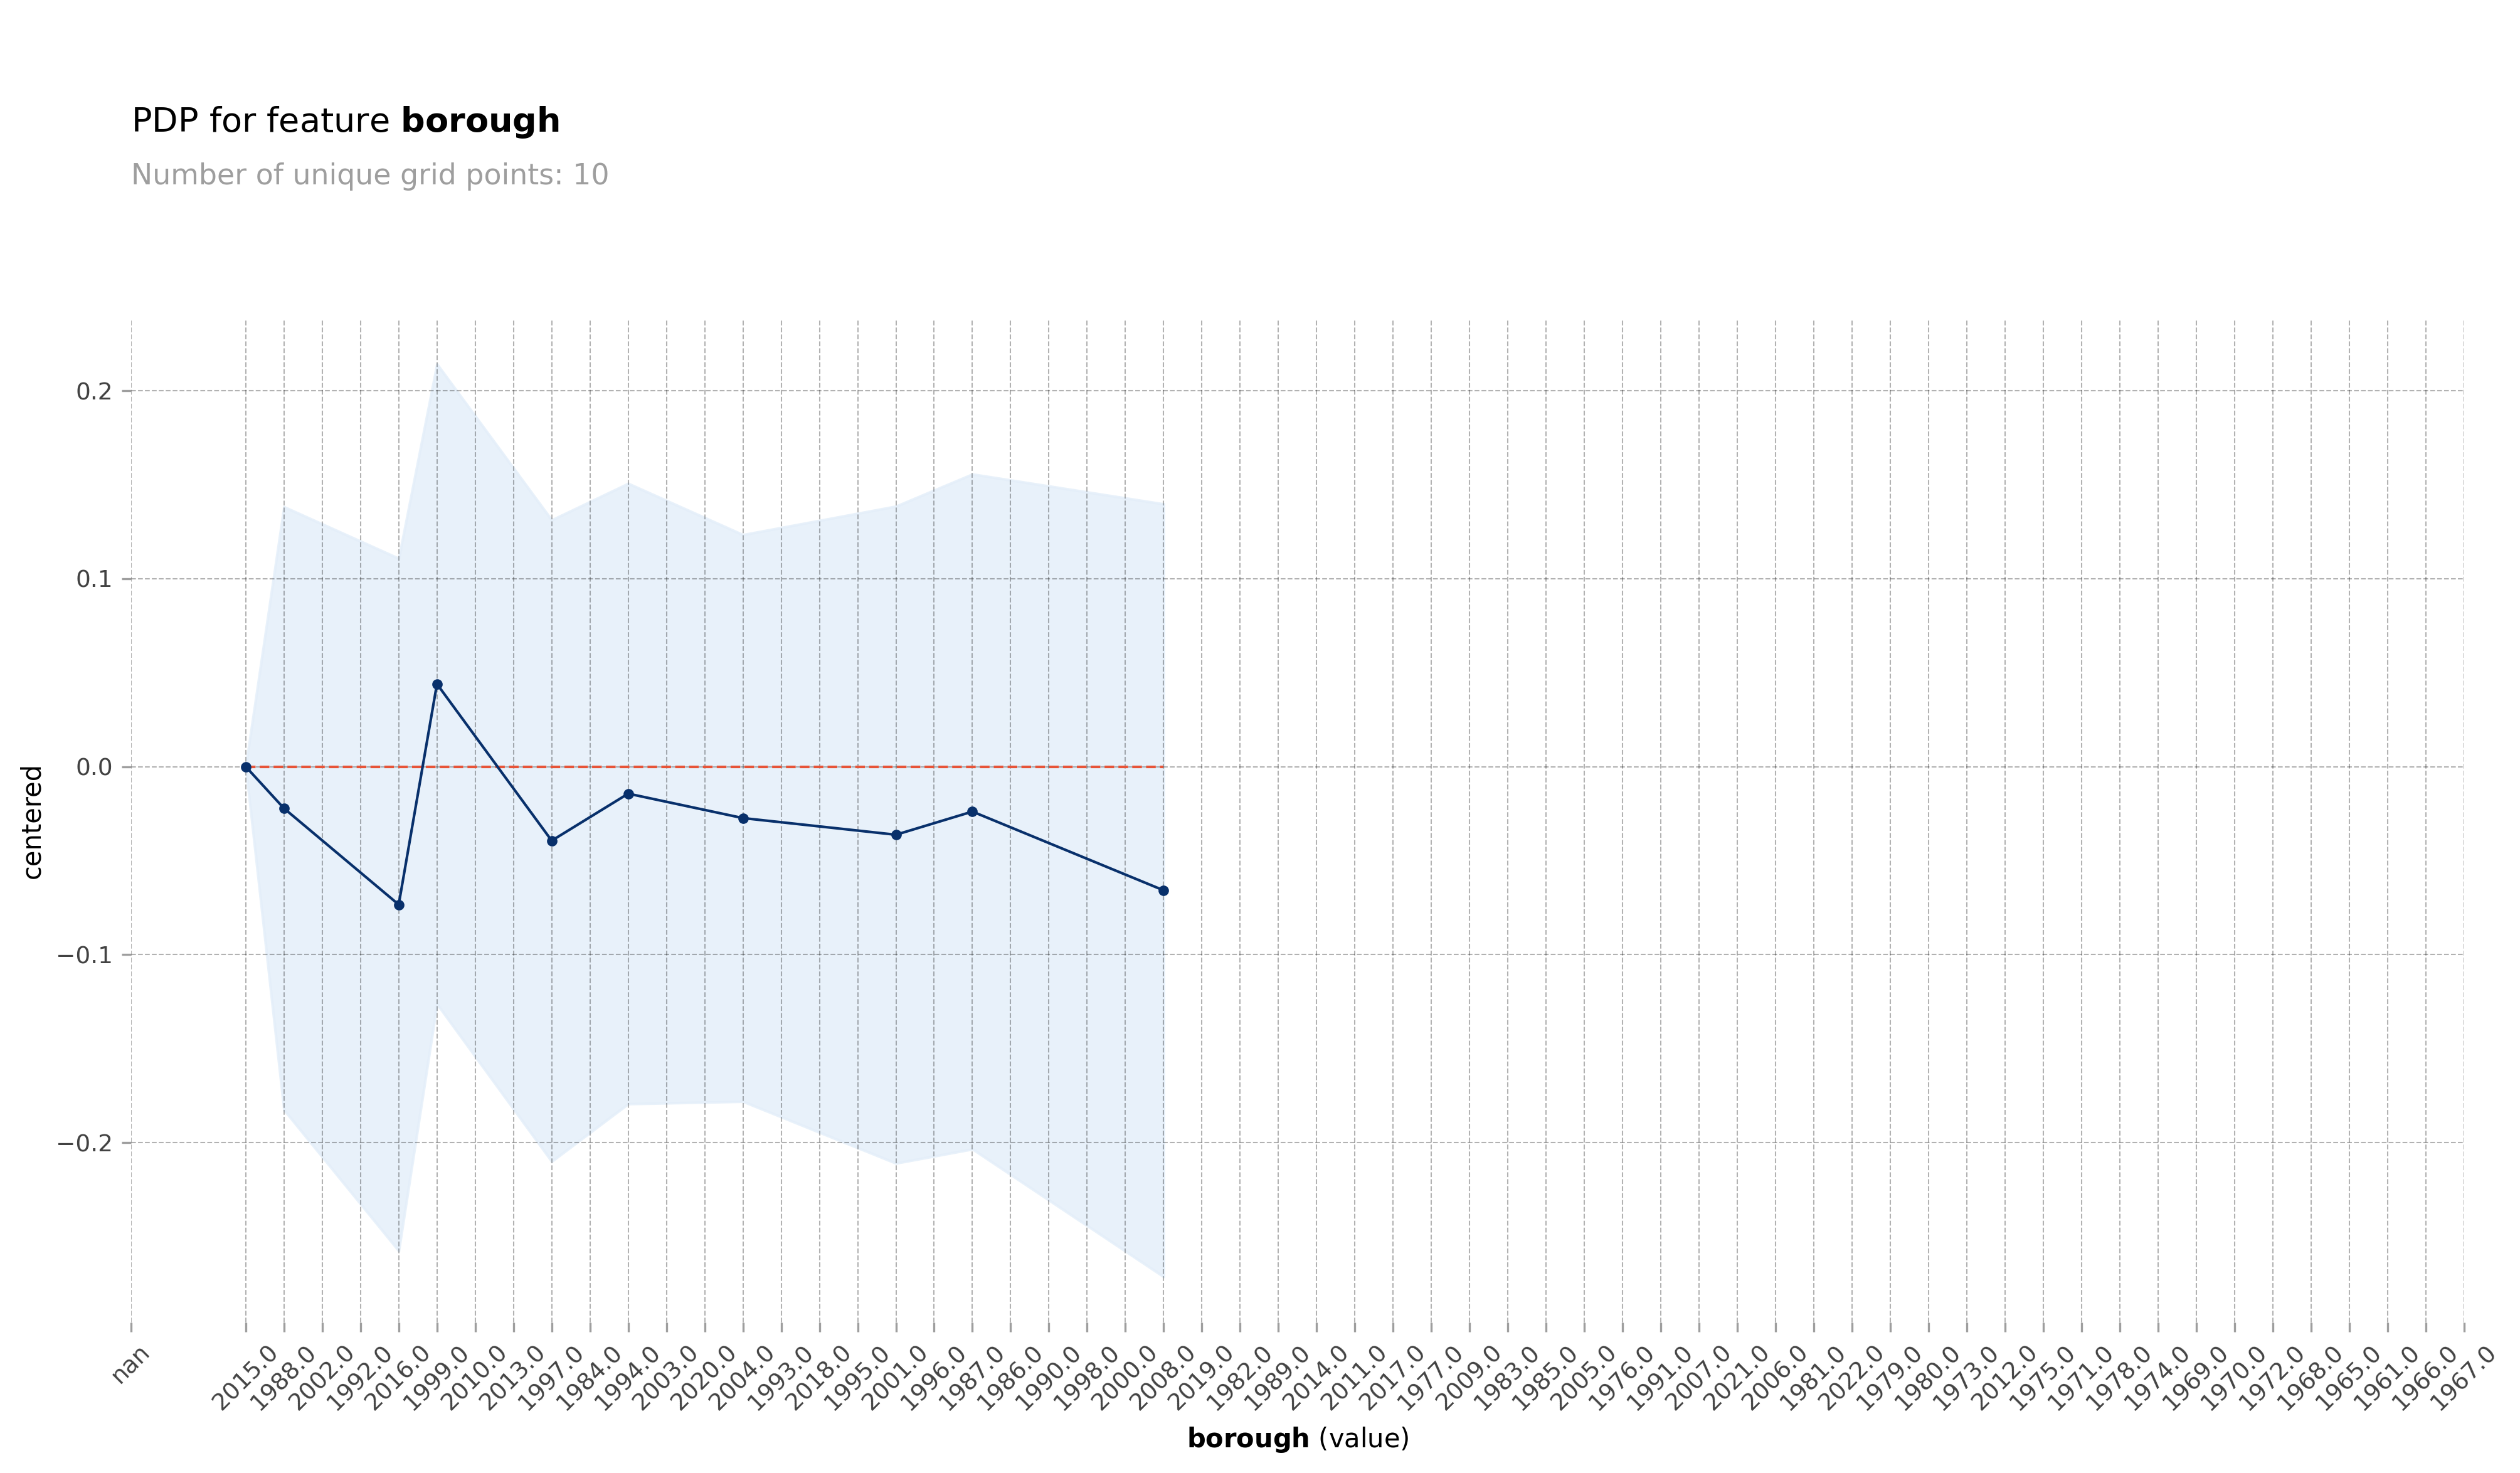

In [88]:
pdp_isolate44.plot(engine='matplotlib')
plt.xticks(encoded_features4, original_features4, rotation=45)

([<matplotlib.axis.XTick at 0x7fa397867b80>,
 [Text(1, 0, 'Officetels'), Text(2, 0, 'apartment'), Text(-2, 0, 'nan')])

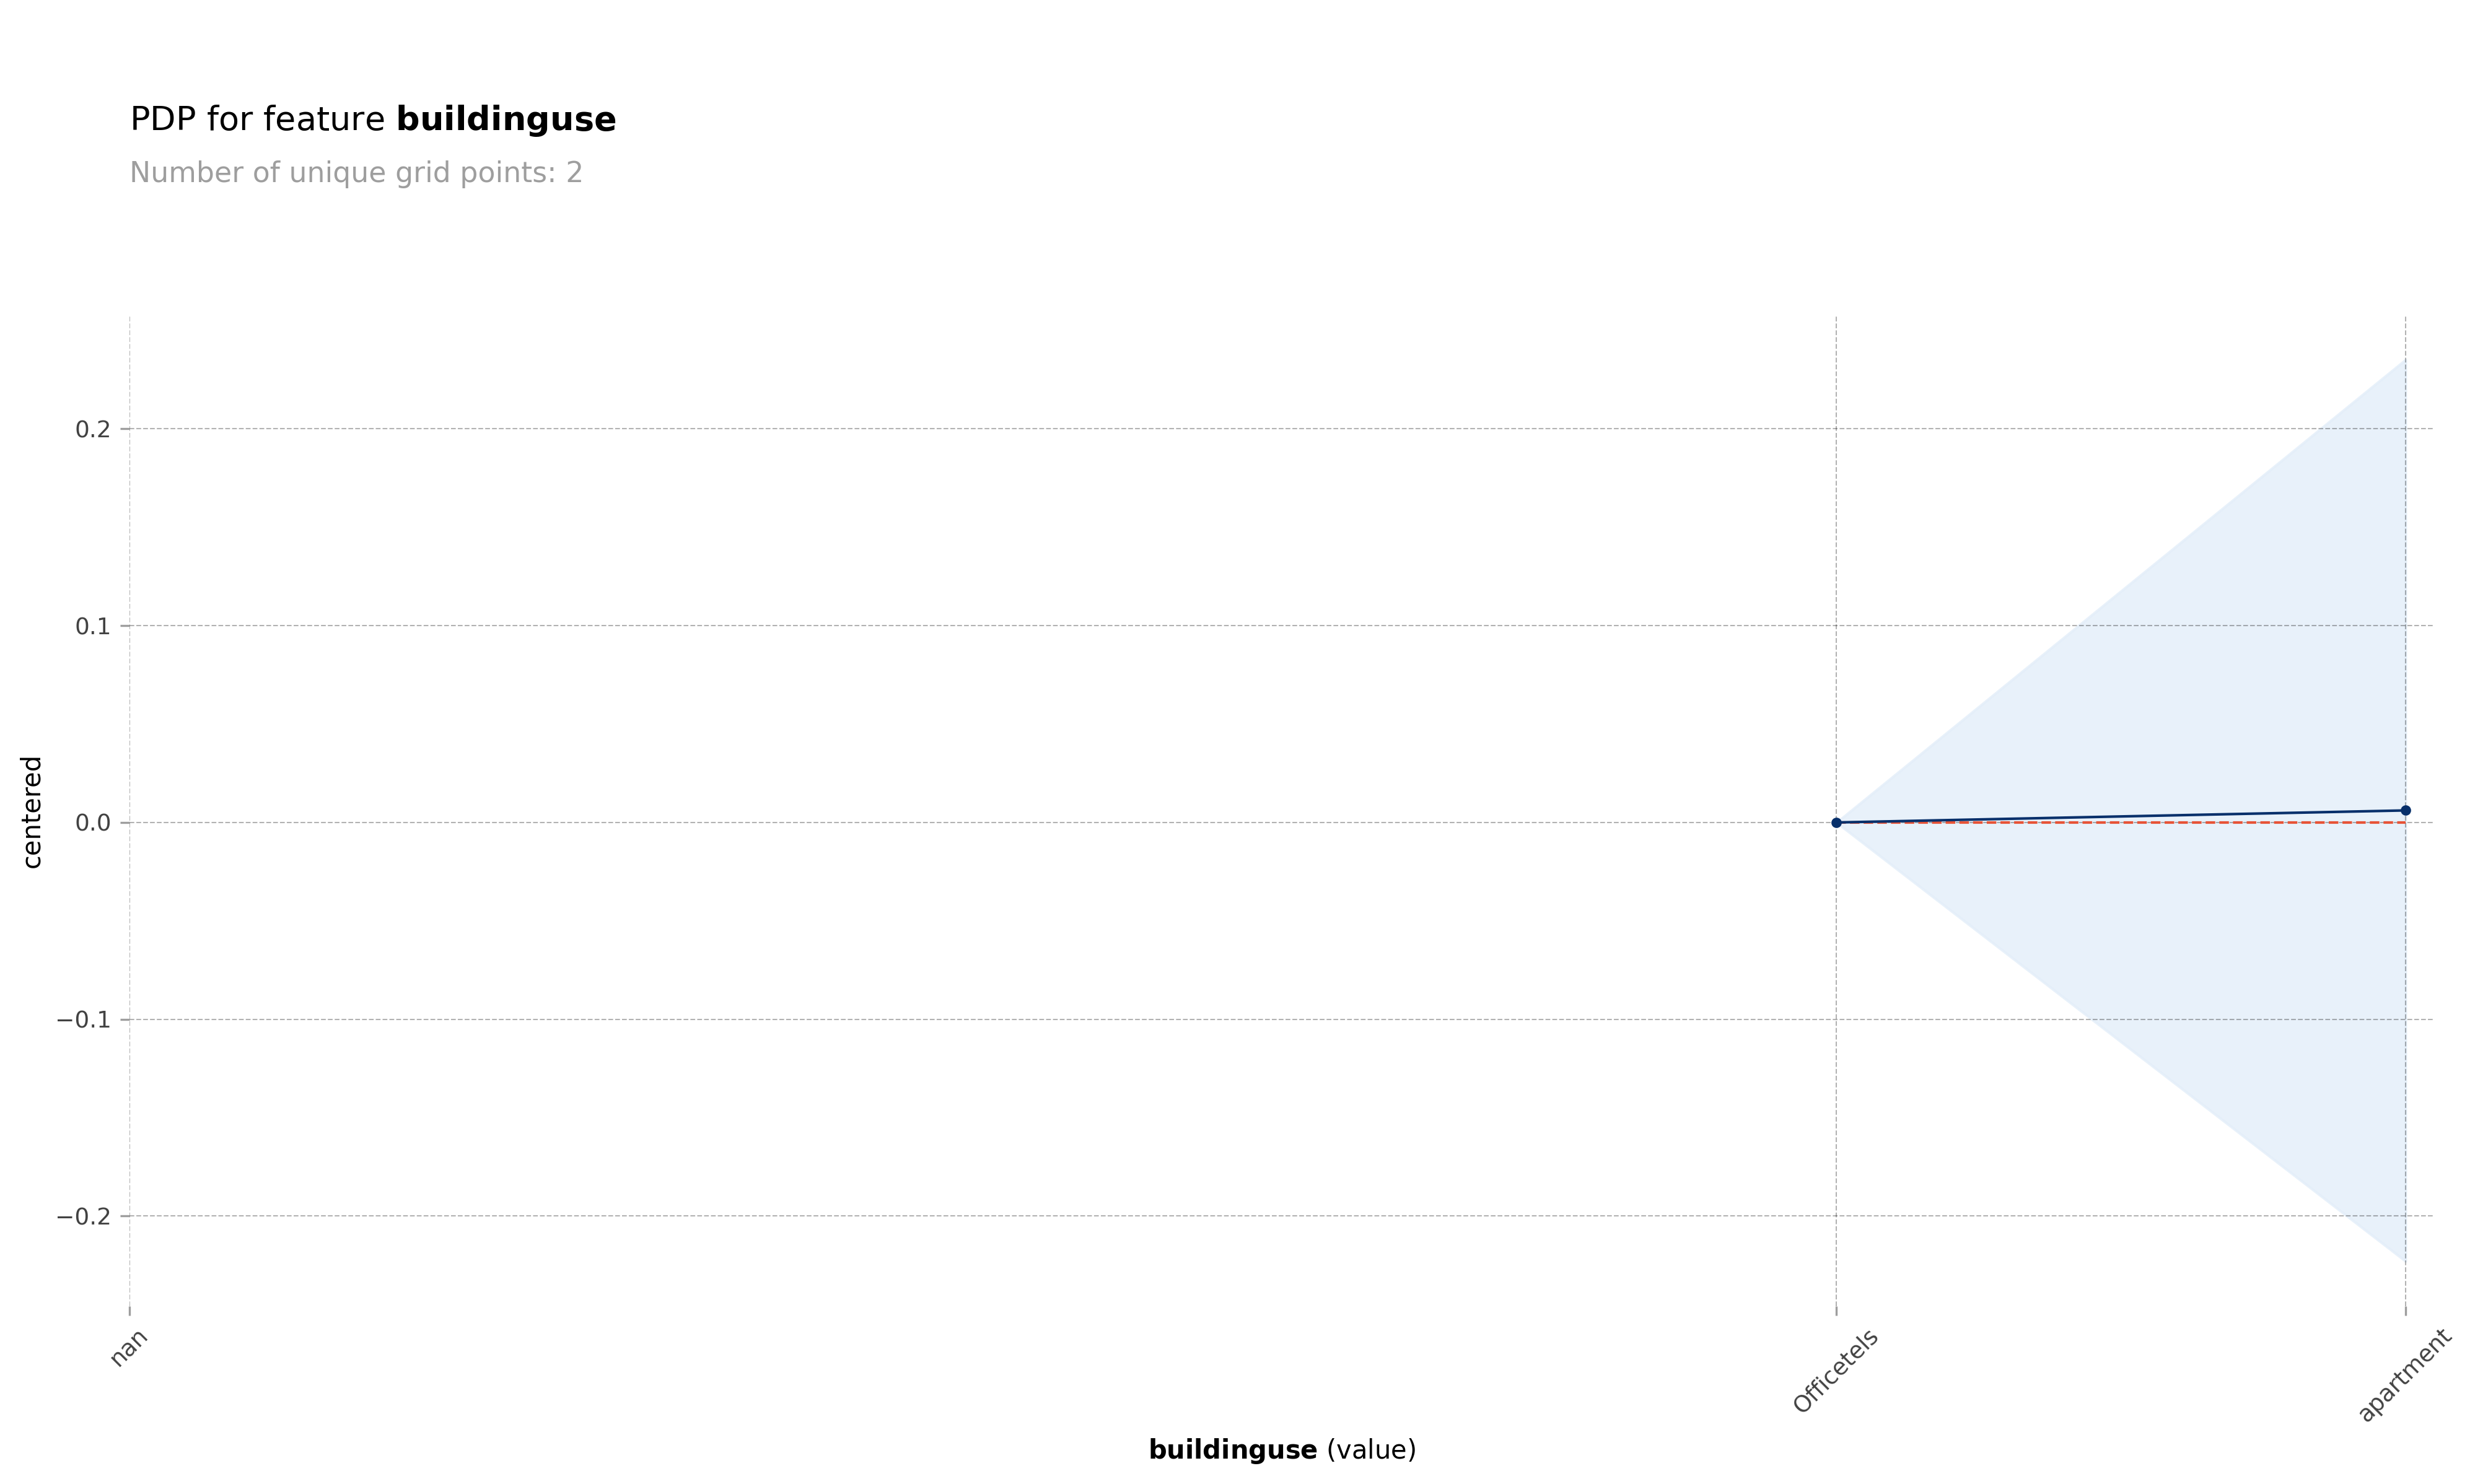

In [89]:
pdp_isolate55.plot(engine='matplotlib')
plt.xticks(encoded_features5, original_features5, rotation=45)

([<matplotlib.axis.XTick at 0x7fa36f4ad150>,
 [Text(1, 0, '3.0'), Text(2, 0, '2.0'), Text(3, 0, '1.0'), Text(-2, 0, 'nan')])

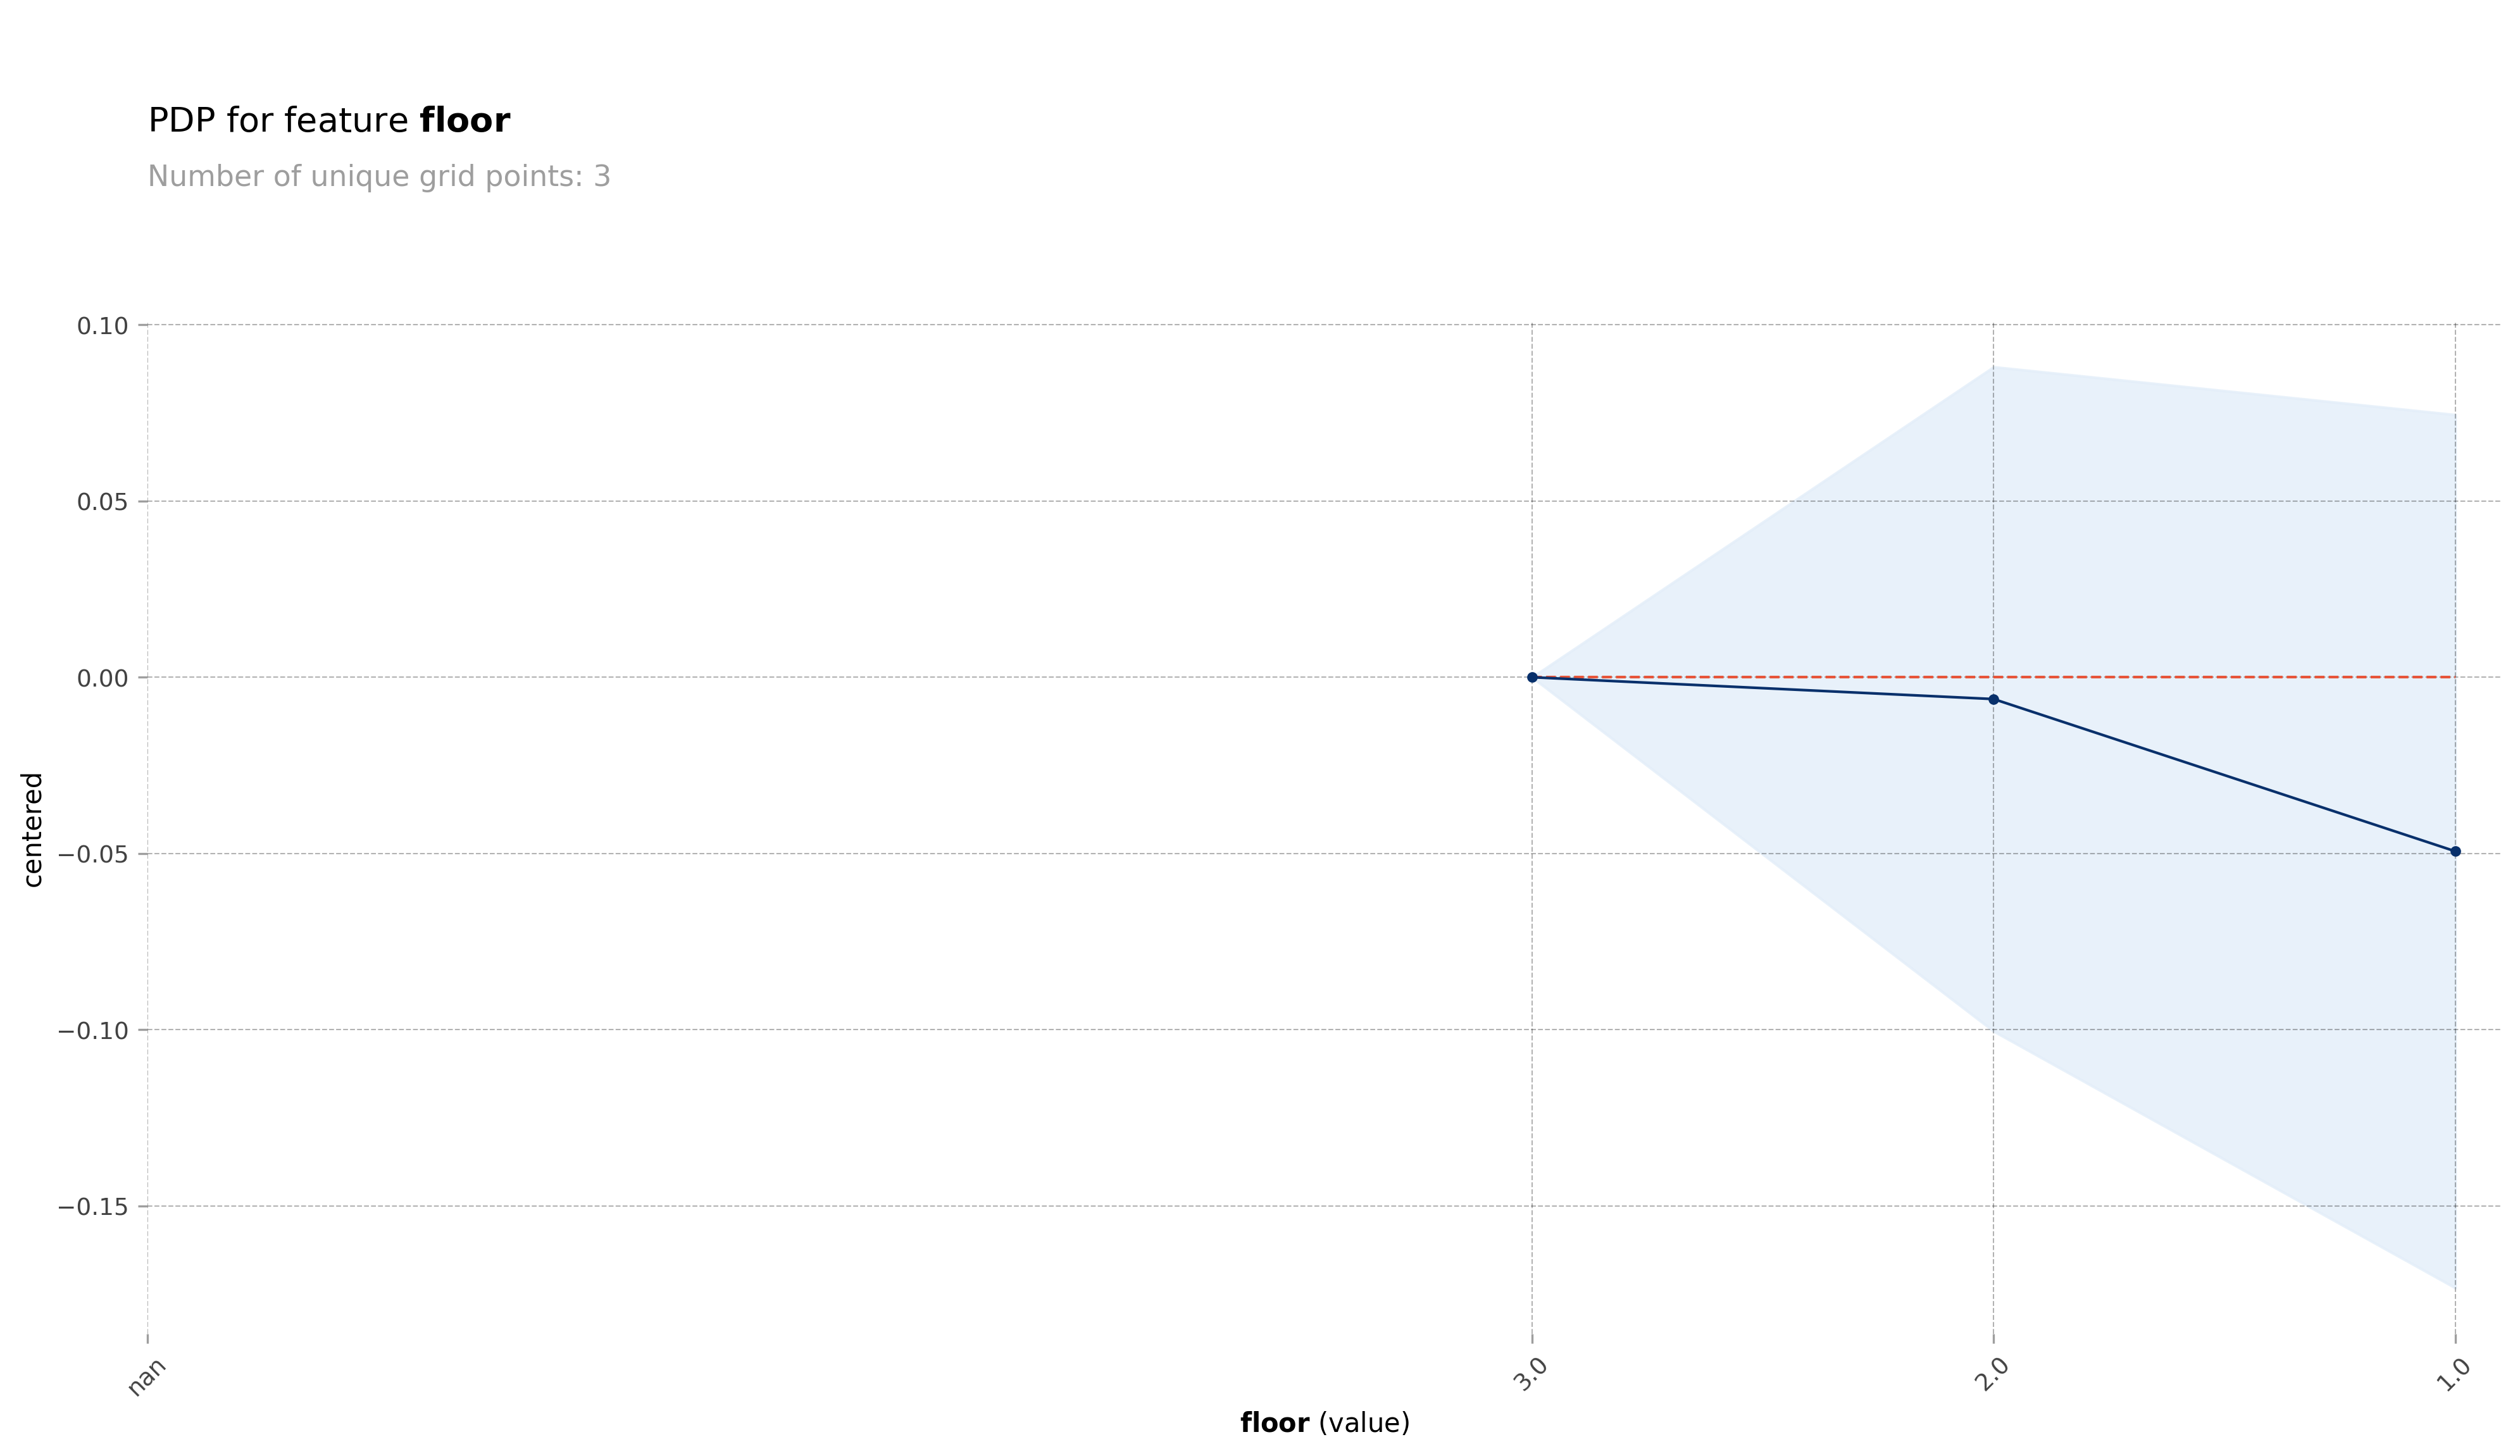

In [90]:
pdp_isolate66.plot(engine='matplotlib')
plt.xticks(encoded_features6, original_features6, rotation=45)